Enunciado: https://github.com/orga-de-datos/practicas/blob/master/tps/2021-2c-tp/2021-2c-tp-parte1.md

**Alumnos:**
*   Carlos Martín Stefanelli D'Elias 100488
*   Tomás Martin 100835










**Corrector:**
*   Jorge Collinet

**2C 2021**

### Importación de librerías y archivos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt

%matplotlib inline

#filtrado de warnings
warnings.filterwarnings('ignore')

# haciendo los graficos un poco mas bonitos en matplotlib
plt.style.use('default') 
#plt.rcParams['figure.figsize'] = (20, 10)

plt.rcParams['figure.dpi'] = 150

# seteando tipo de grid en seaborn
sns.set_theme(style='ticks', palette=None, font_scale=.9) 

# suprimimos la notacion cientifica en los outputs en pandas
pd.options.display.float_format = '{:20,.2f}'.format

In [45]:
VALUES_URL = 'https://docs.google.com/spreadsheets/d/1wduqo5WyYmCpaGnE81sLNGU0VSodIekMfpmEwU0fGqs'
TARGET_URL = 'https://docs.google.com/spreadsheets/d/1gvZ03uAL6THwd04Y98GtIj6SeAHiKyQY5UisuuyFSUs'

def csv_to_df(url):
    url += '/export?format=csv'
    return pd.read_csv(url)

hamburguesas_values = csv_to_df(VALUES_URL)
hamburguesas_target = csv_to_df(TARGET_URL)

### Análisis previo de los datos 

In [ ]:
print(f'El dataset de values tiene {len(hamburguesas_values)} filas')
print(f'El dataset de values tiene {len(hamburguesas_target)} filas')

El dataset de values tiene 116368 filas
El dataset de values tiene 116368 filas


In [ ]:
hamburguesas_values.head(10)

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano
0,Retiro,2016-10-11,Este,Nornoreste,10.70,59.00,56.00,86942,no,16.00,0.00,3.00,1.00,1009.9,"1,010.20",Estesureste,33.00,29.20,16.80,24.10,25.30,19.00,4.00
1,Vélez Sársfield,2016-03-28,Sur,suroeste,0.00,49.00,83.00,102098,no,2.60,0.00,8.00,7.00,1020.4,"1,021.40",Sur,31.00,16.90,10.60,16.40,12.30,13.00,7.00
2,Palermo,2017-05-11,Sursureste,Norte,4.30,59.00,83.00,67154,no,2.40,0.00,7.00,7.00,1024.8,"1,026.50",Norte,26.00,16.60,4.40,15.70,9.40,9.00,13.00
3,Mataderos,2012-05-07,suroeste,Sur,nan,67.00,93.00,50245,no,nan,0.00,nan,nan,1017.0,"1,020.00",Oestesuroeste,13.00,11.40,0.80,11.10,4.00,6.00,6.00
4,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.80,94.00,97.00,82904,no,0.80,0.00,nan,nan,1016.1,"1,021.90",Nornoreste,33.00,11.60,6.70,11.20,8.80,11.00,15.00
5,Barracas,2017-03-12,Noreste,suroeste,nan,65.00,66.00,11961,no,nan,0.00,nan,nan,1010.5,"1,012.00",Nornoreste,31.00,26.00,15.00,25.90,21.40,17.00,9.00
6,Belgrano,2016-06-08,Norte,NaN,nan,48.00,81.00,14693,no,3.00,0.00,nan,nan,1014.3,"1,017.90",Oeste,20.00,20.00,5.40,19.40,11.50,9.00,0.00
7,Monte Castro,2011-12-28,Sursuroeste,Sursuroeste,nan,nan,81.00,53154,si,nan,11.80,nan,nan,NaN,nan,Este,31.00,15.10,6.60,nan,12.40,9.00,6.00
8,San Telmo,2012-09-23,Oestesuroeste,Oeste,nan,46.00,55.00,97835,no,nan,0.00,nan,nan,1015.1,"1,014.90",Oestesuroeste,56.00,17.10,12.00,16.30,14.40,24.00,24.00
9,Parque Patricios,2016-04-03,Sursureste,Oeste,nan,54.00,71.00,77540,no,nan,0.00,8.00,8.00,1026.1,"1,028.10",Sur,24.00,17.50,6.70,16.70,14.30,11.00,6.00


In [ ]:
hamburguesas_target.head(10)

,id,llovieron_hamburguesas_al_dia_siguiente
0,86942,no
1,102098,no
2,67154,no
3,50245,no
4,82904,no
5,11961,no
6,14693,no
7,53154,si
8,97835,no
9,77540,no


Hacemos un merge de los data sets:

In [46]:
hamburguesas_values = hamburguesas_values.merge(hamburguesas_target, left_on='id', right_on='id')

hamburguesas_values.head(10)

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano,llovieron_hamburguesas_al_dia_siguiente
0,Retiro,2016-10-11,Este,Nornoreste,10.70,59.00,56.00,86942,no,16.00,0.00,3.00,1.00,1009.9,"1,010.20",Estesureste,33.00,29.20,16.80,24.10,25.30,19.00,4.00,no
1,Vélez Sársfield,2016-03-28,Sur,suroeste,0.00,49.00,83.00,102098,no,2.60,0.00,8.00,7.00,1020.4,"1,021.40",Sur,31.00,16.90,10.60,16.40,12.30,13.00,7.00,no
2,Palermo,2017-05-11,Sursureste,Norte,4.30,59.00,83.00,67154,no,2.40,0.00,7.00,7.00,1024.8,"1,026.50",Norte,26.00,16.60,4.40,15.70,9.40,9.00,13.00,no
3,Mataderos,2012-05-07,suroeste,Sur,nan,67.00,93.00,50245,no,nan,0.00,nan,nan,1017.0,"1,020.00",Oestesuroeste,13.00,11.40,0.80,11.10,4.00,6.00,6.00,no
4,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.80,94.00,97.00,82904,no,0.80,0.00,nan,nan,1016.1,"1,021.90",Nornoreste,33.00,11.60,6.70,11.20,8.80,11.00,15.00,no
5,Barracas,2017-03-12,Noreste,suroeste,nan,65.00,66.00,11961,no,nan,0.00,nan,nan,1010.5,"1,012.00",Nornoreste,31.00,26.00,15.00,25.90,21.40,17.00,9.00,no
6,Belgrano,2016-06-08,Norte,NaN,nan,48.00,81.00,14693,no,3.00,0.00,nan,nan,1014.3,"1,017.90",Oeste,20.00,20.00,5.40,19.40,11.50,9.00,0.00,no
7,Monte Castro,2011-12-28,Sursuroeste,Sursuroeste,nan,nan,81.00,53154,si,nan,11.80,nan,nan,NaN,nan,Este,31.00,15.10,6.60,nan,12.40,9.00,6.00,si
8,San Telmo,2012-09-23,Oestesuroeste,Oeste,nan,46.00,55.00,97835,no,nan,0.00,nan,nan,1015.1,"1,014.90",Oestesuroeste,56.00,17.10,12.00,16.30,14.40,24.00,24.00,no
9,Parque Patricios,2016-04-03,Sursureste,Oeste,nan,54.00,71.00,77540,no,nan,0.00,8.00,8.00,1026.1,"1,028.10",Sur,24.00,17.50,6.70,16.70,14.30,11.00,6.00,no


Vemos los tipos de datos de cada feature y cuántos datos no nulos contienen:

In [ ]:
hamburguesas_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116368 entries, 0 to 116367
Data columns (total 24 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   barrio                                   116368 non-null  object 
 1   dia                                      116368 non-null  object 
 2   direccion_viento_tarde                   112995 non-null  object 
 3   direccion_viento_temprano                107965 non-null  object 
 4   horas_de_sol                             60512 non-null   float64
 5   humedad_tarde                            112773 non-null  float64
 6   humedad_temprano                         114251 non-null  float64
 7   id                                       116368 non-null  int64  
 8   llovieron_hamburguesas_hoy               113753 non-null  object 
 9   mm_evaporados_agua                       66157 non-null   float64
 10  mm_lluvia_dia                   

A partir de esta información, vemos que hay dos features categoricos que no deberían serlo. Estos son **dia** y **presion_atmosferica_tarde**.

A continuación, convertimos dichos features categóricos en un tipo de feature adecuado para lo que representa cada dato de dicho feature:

In [47]:
hamburguesas_values['dia'] = pd.to_datetime(hamburguesas_values['dia'])

In [ ]:
hamburguesas_values['presion_atmosferica_tarde'].isnull().sum()

12000

In [ ]:
pd.to_numeric(hamburguesas_values['presion_atmosferica_tarde'], errors='coerce').isnull().sum()

12002

Vemos que hay dos valores que no se pudieron convertir correctamente, por lo que aumentaron la cantidad de nulos.

In [48]:
hamburguesas_values['presion_atmosferica_tarde'] = pd.to_numeric(hamburguesas_values['presion_atmosferica_tarde'], errors='coerce')

Vimos que algunos features categóricos tienen datos con el formato _Dato_ y otros con el formato _dato_, por lo que vamos a llevar a estos últimos al formato _Dato_ para todos los datos de los features categóricos:

In [49]:
features_categoricos = []
for columna in hamburguesas_values.columns:
  if hamburguesas_values[columna].dtype == np.object: features_categoricos.append(columna)

features_categoricos

['barrio',
 'direccion_viento_tarde',
 'direccion_viento_temprano',
 'llovieron_hamburguesas_hoy',
 'rafaga_viento_max_direccion',
 'llovieron_hamburguesas_al_dia_siguiente']

In [50]:
for columna in features_categoricos:
  hamburguesas_values[columna] = hamburguesas_values[columna].str.capitalize()

In [ ]:
hamburguesas_values.head(10)

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano,llovieron_hamburguesas_al_dia_siguiente
0,Retiro,2016-10-11,Este,Nornoreste,10.70,59.00,56.00,86942,No,16.00,0.00,3.00,1.00,"1,009.90","1,010.20",Estesureste,33.00,29.20,16.80,24.10,25.30,19.00,4.00,No
1,Vélez sársfield,2016-03-28,Sur,Suroeste,0.00,49.00,83.00,102098,No,2.60,0.00,8.00,7.00,"1,020.40","1,021.40",Sur,31.00,16.90,10.60,16.40,12.30,13.00,7.00,No
2,Palermo,2017-05-11,Sursureste,Norte,4.30,59.00,83.00,67154,No,2.40,0.00,7.00,7.00,"1,024.80","1,026.50",Norte,26.00,16.60,4.40,15.70,9.40,9.00,13.00,No
3,Mataderos,2012-05-07,Suroeste,Sur,nan,67.00,93.00,50245,No,nan,0.00,nan,nan,"1,017.00","1,020.00",Oestesuroeste,13.00,11.40,0.80,11.10,4.00,6.00,6.00,No
4,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.80,94.00,97.00,82904,No,0.80,0.00,nan,nan,"1,016.10","1,021.90",Nornoreste,33.00,11.60,6.70,11.20,8.80,11.00,15.00,No
5,Barracas,2017-03-12,Noreste,Suroeste,nan,65.00,66.00,11961,No,nan,0.00,nan,nan,"1,010.50","1,012.00",Nornoreste,31.00,26.00,15.00,25.90,21.40,17.00,9.00,No
6,Belgrano,2016-06-08,Norte,NaN,nan,48.00,81.00,14693,No,3.00,0.00,nan,nan,"1,014.30","1,017.90",Oeste,20.00,20.00,5.40,19.40,11.50,9.00,0.00,No
7,Monte castro,2011-12-28,Sursuroeste,Sursuroeste,nan,nan,81.00,53154,Si,nan,11.80,nan,nan,nan,nan,Este,31.00,15.10,6.60,nan,12.40,9.00,6.00,Si
8,San telmo,2012-09-23,Oestesuroeste,Oeste,nan,46.00,55.00,97835,No,nan,0.00,nan,nan,"1,015.10","1,014.90",Oestesuroeste,56.00,17.10,12.00,16.30,14.40,24.00,24.00,No
9,Parque patricios,2016-04-03,Sursureste,Oeste,nan,54.00,71.00,77540,No,nan,0.00,8.00,8.00,"1,026.10","1,028.10",Sur,24.00,17.50,6.70,16.70,14.30,11.00,6.00,No


Vemos la cantidad de nulos: 

In [ ]:
casos_totales = len(hamburguesas_values)
df_nulos = hamburguesas_values.isnull().sum().to_frame('Cantidad de nulos')
df_nulos['Cantidad de nulos'] = (df_nulos['Cantidad de nulos']/casos_totales) * 100
df_nulos.rename(columns={'Cantidad de nulos':'Porcentaje de nulos'}, inplace=True)
df_nulos.sort_values(by='Porcentaje de nulos', ascending=False)

,Porcentaje de nulos
horas_de_sol,48.00
mm_evaporados_agua,43.15
nubosidad_tarde,40.78
nubosidad_temprano,38.37
presion_atmosferica_temprano,10.33
presion_atmosferica_tarde,10.31
direccion_viento_temprano,7.22
rafaga_viento_max_direccion,7.11
rafaga_viento_max_velocidad,7.06
humedad_tarde,3.09


Casi todos los features contienen nulos. En particular, el feature de la varibale target (**llovieron_hamburguesas_al_dia_siguiente**) tiene nulos, por lo que, a continuación, eliminaremos esas filas del data set ya que no son relevantes para predecir si van a llover o no hamburguesas al día siguiente.

In [51]:
nulos_variable_target_df = hamburguesas_values[hamburguesas_values['llovieron_hamburguesas_al_dia_siguiente'].isnull()]

In [53]:
hamburguesas_values.dropna(subset=['llovieron_hamburguesas_al_dia_siguiente'], inplace=True)

cant_target_isnull = len(hamburguesas_values[hamburguesas_values['llovieron_hamburguesas_al_dia_siguiente'].isnull()])
print(f"Hay {cant_target_isnull} filas con target nulos")

Hay 0 filas con target nulos


Vemos si hay filas duplicadas en nuestro dataset:

In [9]:
cant_filas_duplicadas = len(hamburguesas_values[hamburguesas_values.duplicated()])
print(f'Hay {cant_filas_duplicadas} filas duplicadas')

Hay 0 filas duplicadas


##### Análisis preliminar de los nulos de la variable target

¿Que porcentaje de filas en nuestro dataset tienen variable target null?

In [54]:
filas_totales = len(hamburguesas_values)
filas_totales_null = len(nulos_variable_target_df)

print(f'De {filas_totales} filas {filas_totales_null} tienen target null')
print(f'Eso equivale al {(filas_totales_null / filas_totales) * 100}% de filas que tienen target null')

De 113729 filas 2639 tienen target null
Eso equivale al 2.320428386779098% de filas que tienen target null


Vemos el porcentaje de nulos

In [55]:
casos_totales = len(nulos_variable_target_df)
df_nulos = nulos_variable_target_df.isnull().sum().to_frame('Cantidad de nulos')
df_nulos = df_nulos[df_nulos.index != 'llovieron_hamburguesas_al_dia_siguiente']
df_nulos['Cantidad de nulos'] = (df_nulos['Cantidad de nulos']/casos_totales) * 100
df_nulos.rename(columns={'Cantidad de nulos':'Porcentaje de nulos'}, inplace=True)
df_nulos.sort_values(by='Porcentaje de nulos', ascending=False)

,Porcentaje de nulos
nubosidad_tarde,68.93
nubosidad_temprano,68.06
horas_de_sol,62.14
mm_evaporados_agua,59.80
llovieron_hamburguesas_hoy,56.46
mm_lluvia_dia,56.46
presion_atmosferica_temprano,31.94
presion_atmosferica_tarde,31.91
rafaga_viento_max_direccion,30.66
rafaga_viento_max_velocidad,30.54


Vemos que la mayoría de los features tienen varios datos faltantes.

El tener un Nan en la variable target nos indica que ese día no se pudo medir correctamente ese feature. ¿Hay una relación entre los features con mas missings y los missings en la variable target? Es decir, el hecho de que no se haya podido medir X feature termino afectando a la medición de la variable target. 

¿Cuáles son los 5 features con mas missings?

In [ ]:
df_nulos.sort_values('Porcentaje de nulos', ascending=False).head(5)

,Porcentaje de nulos
nubosidad_tarde,68.93
nubosidad_temprano,68.06
horas_de_sol,62.14
mm_evaporados_agua,59.80
llovieron_hamburguesas_hoy,56.46


Los porcentajes de missings para estos features son altos, los dos primeros estan cerca del 70% y también miden el mismo feature pero en distintos períodos del día.

¿La medición de la nubosidad durante el día es un factor importante para poder medir la variable target?

In [ ]:
casos_sin_medicion_de_nubosidad = len(nulos_variable_target_df[nulos_variable_target_df.nubosidad_temprano.isnull() & nulos_variable_target_df.nubosidad_tarde.isnull()])

print(f'De un total de {casos_totales} sin variable target, {casos_sin_medicion_de_nubosidad} no tienen medicion de la nubosidad')
print(f'Eso equivale a un porcentaje de un total del {(casos_sin_medicion_de_nubosidad / casos_totales) * 100} %')

De un total de 2639 sin variable target, 1659 no tienen medicion de la nubosidad
Eso equivale a un porcentaje de un total del 62.864721485411145 %


Podemos concluir que si es un feature importante, ya que en el 62.86% de las veces en las que no se midio la **nubosidad** no se midio la variable target.

También lo es las horas de sol, porque en el 62.14 % de las veces en las que no se midió el feature **horas_de_sol** no se midio la variable target.



El análisis que haremos a continuación, se basa en ver si sirven o no las filas que eliminamos por tener NaN la variable target en dichas filas para el baseline.

Este último análisis lo haremos luego de la sección de **Relaciones entre features** en la sección **Análisis final de los nulos de la variable target** ya que no llegamos todavía a lo que es relevante para hallar el baseline.

# Análisis de los datos



### Barrio

¿Cuántos registros tienen los barrios?

In [ ]:
df_barrios = hamburguesas_values['barrio'].value_counts(sort=True).to_frame('Cantidad registros')

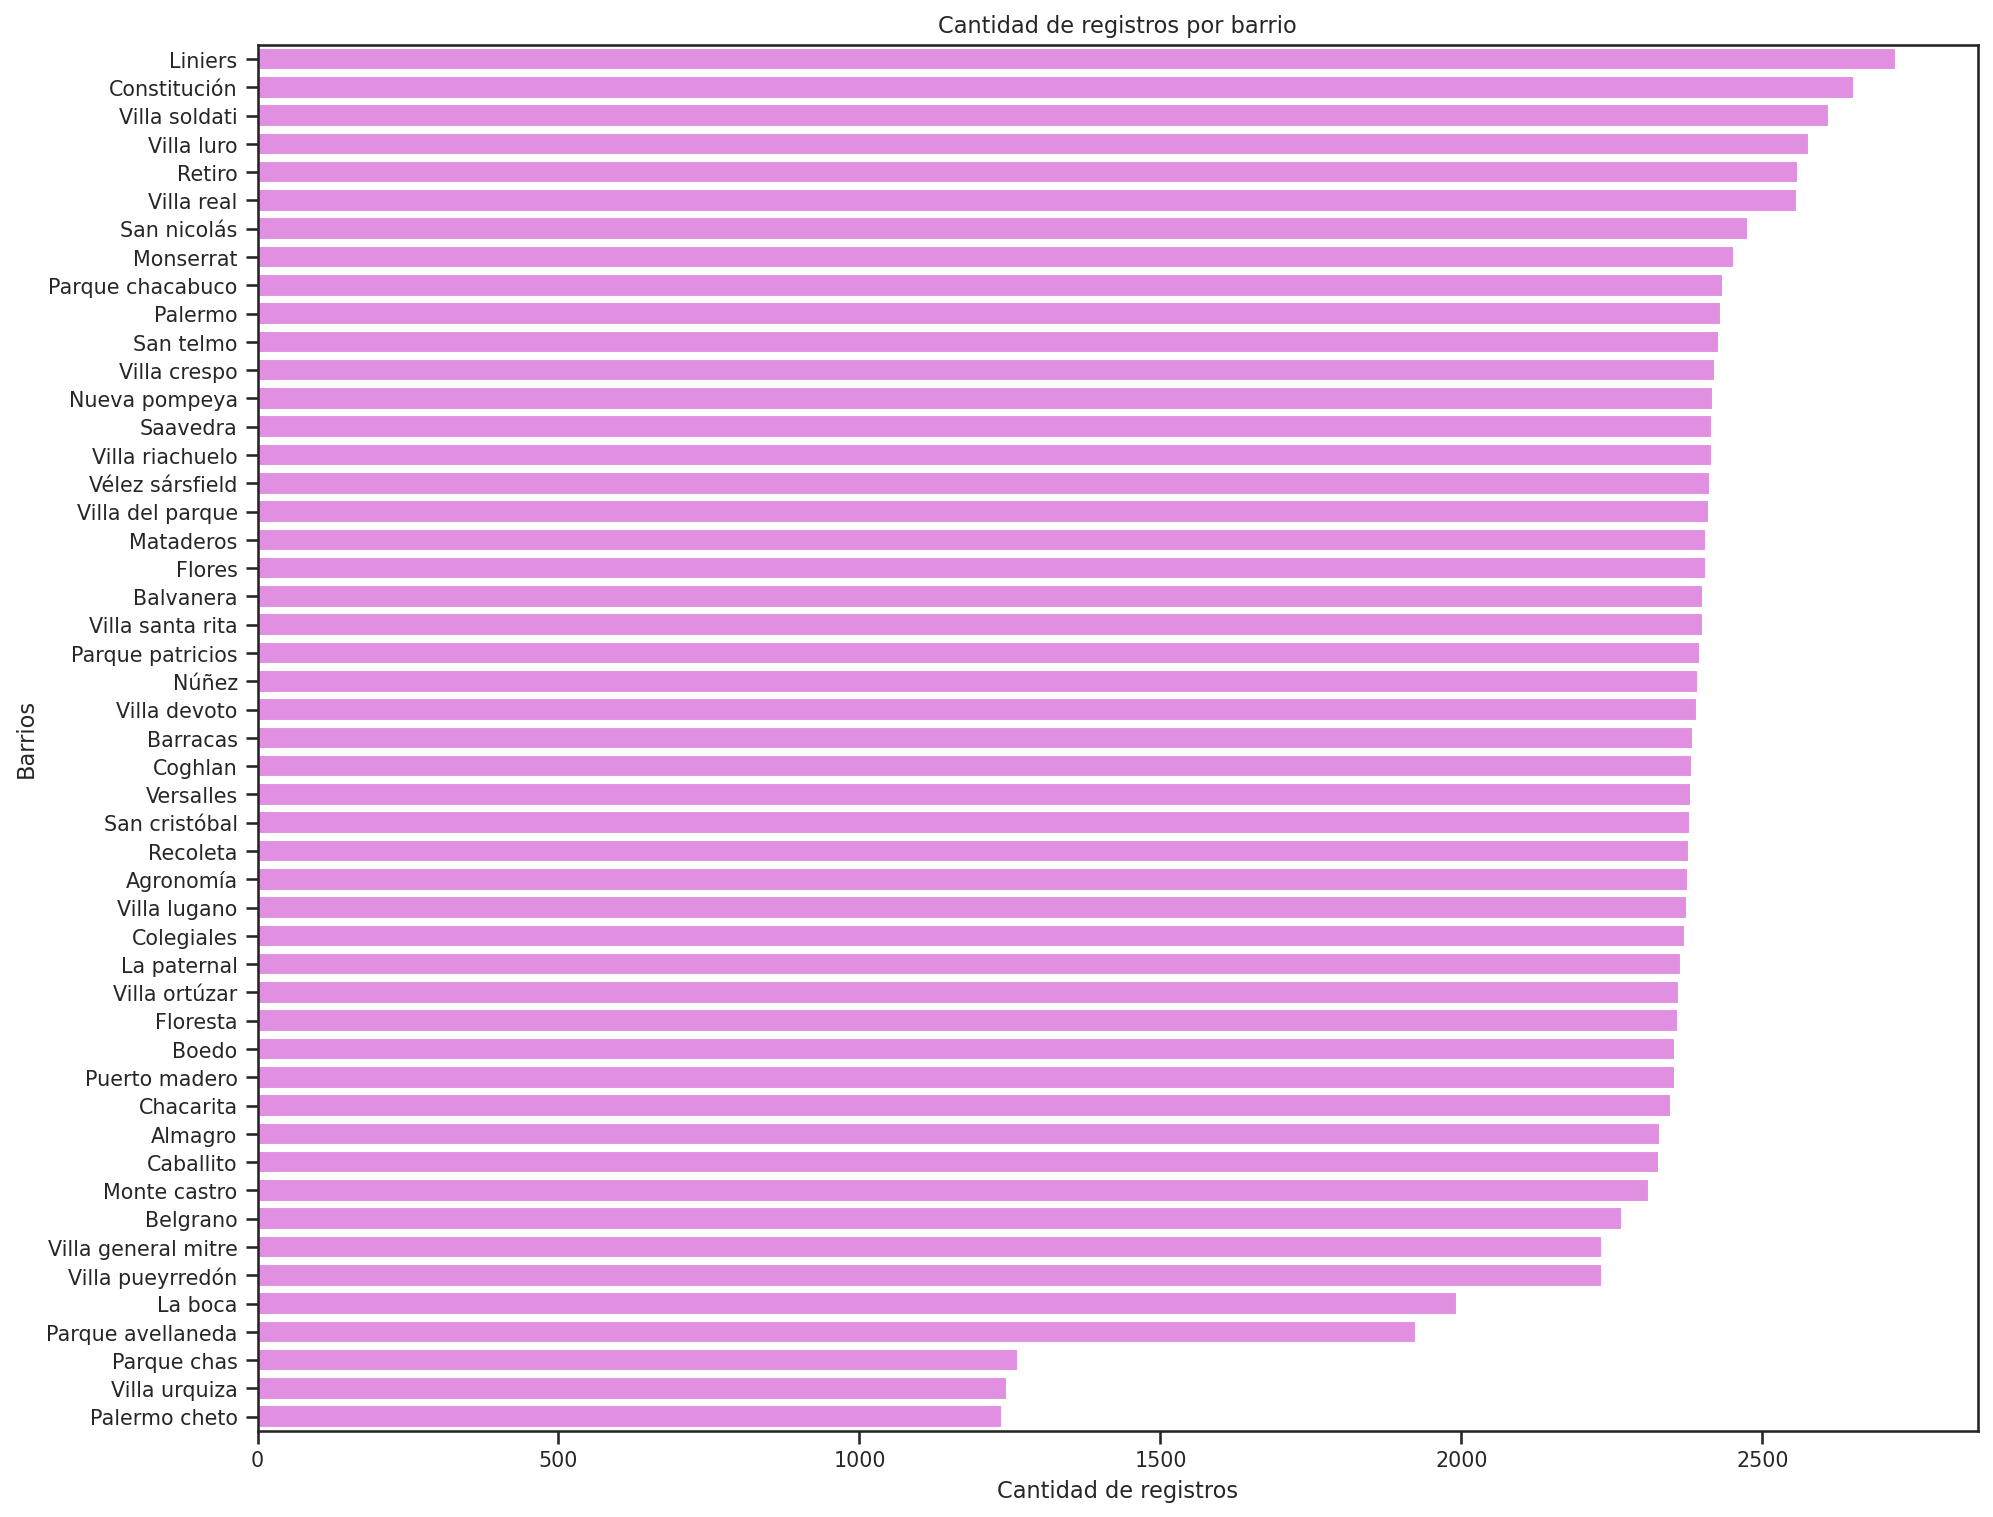

In [ ]:
labels_barrios = df_barrios.index.tolist()

fig, ax = plt.subplots(figsize=[7.4 * 2, 12])

ax = sns.barplot(x='Cantidad registros', y=labels_barrios, data=df_barrios, color='violet')
ax.set_title('Cantidad de registros por barrio')
ax.set_xlabel('Cantidad de registros')
sin_texto = ax.set_ylabel('Barrios')

Los barrios registrados son de Capital Federal y la cantidad de registros de cada barrio es bastante alta.

Los barrios, en su mayoría, tienen entre más de 2000 y menos de 2500 registros. Hay 6 que tienen más y 4 que tienen menos.

Los gráficos nos muestran que la cantidad de registros para cada barrio es pareja salvo para los 10 casos especiales mencionados.

### Temperatura

In [ ]:
lista_aux = []
for i in range(1, 11):
  lista_aux.append(i)

df_aux = pd.DataFrame({'Cantidad':lista_aux})

##### Temperatura máxima

¿Cuáles son las 10 temperaturas máximas registradas dentro de las temperaturas máximas?

In [ ]:
top_10 = hamburguesas_values['temp_max'].nlargest(10)
top_10_df = top_10.to_frame('10 temperaturas más altas')
top_10_df = top_10_df.reset_index()
top_10_df.rename(columns={'index':'Ranking'}, inplace=True)
top_10_df['Ranking'] = df_aux['Cantidad']

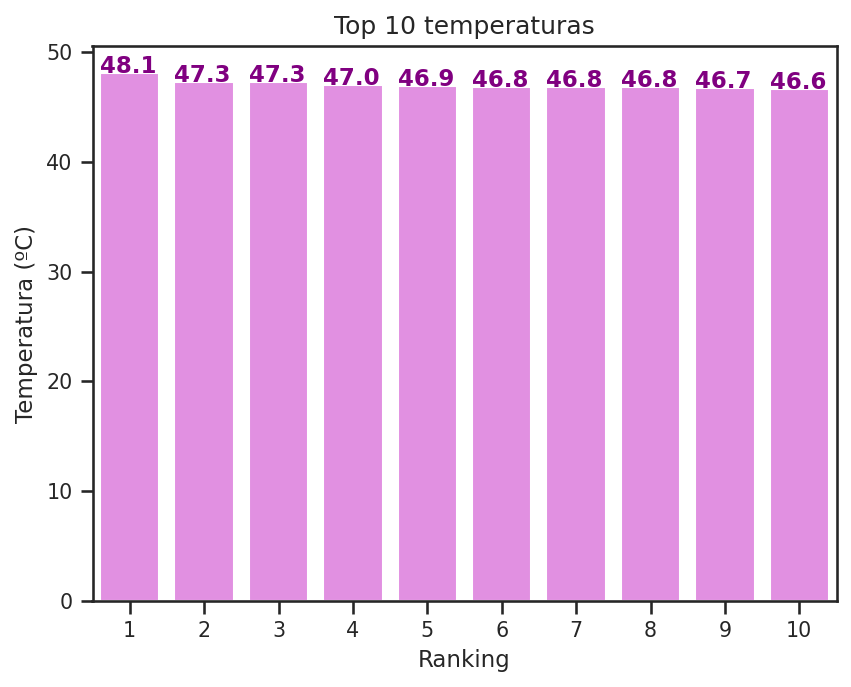

In [ ]:
labels = top_10_df['10 temperaturas más altas'].tolist()
ax = sns.barplot(x="Ranking", y="10 temperaturas más altas", data=top_10_df, color='violet')
for i, v in enumerate(labels):
    ax.text(i-.4, v, str(v), color='purple', fontweight='bold', fontsize=11)

ax.set_xlabel("Ranking", fontsize = 11)
ax.set_ylabel("Temperatura (ºC)", fontsize = 11)
no_texto = ax.set_title('Top 10 temperaturas', fontsize=12)

Las diez temperaturas más altas son bastante parejas.



Las diez temperaturas más altas son 48.1, 47.3, 47, 46.9, 46.8, 46.7 y 46.6 grados.

Un análisis del gráfico exhibido arriba es que las 10 temperaturas máximas son muy elevadas, lo cual quiere decir que es posible que estén mal mensuradas dado que la temperatura máxima registrada en CABA es 43.3.

Ver: https://es.wikipedia.org/wiki/Clima_de_la_ciudad_de_Buenos_Aires



---



¿En qué fechas se alcanzaron dichas temperaturas?

In [ ]:
hamburguesas_values_dia_temp_max = hamburguesas_values[['temp_max', 'dia']]
top_10_fechas = hamburguesas_values_dia_temp_max.nlargest(10, columns='temp_max')
top_10_fechas.rename(columns={'temp_max':'10 temperaturas más altas', 'dia':'Fecha'}, inplace=True)
top_10_fechas['Fecha'] = top_10_fechas.Fecha.dt.date

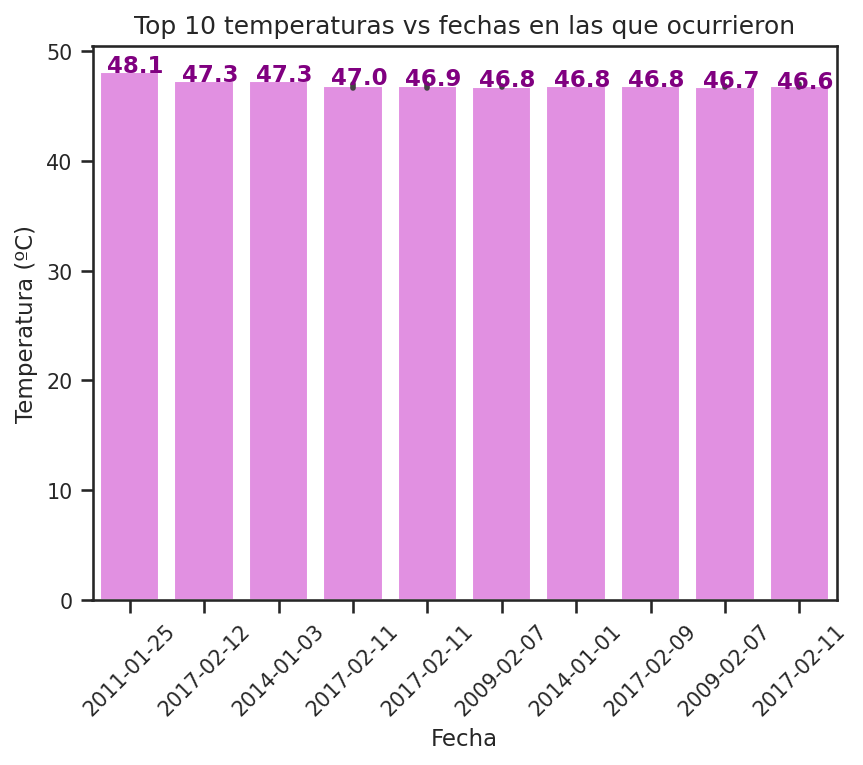

In [ ]:
labels = top_10_fechas['10 temperaturas más altas'].tolist()
labels1 = top_10_fechas['Fecha'].to_list()
ax = sns.barplot(x="Fecha", y="10 temperaturas más altas", data=top_10_fechas, color='violet', order=labels1)

for i, v in enumerate(labels):
    ax.text(i-.3, v, str(v), color='purple', fontweight='bold', fontsize=11)

ax.set_xlabel("Fecha", fontsize = 11)
ax.set_xticklabels(labels=labels1, rotation=45)
ax.set_ylabel("Temperatura (ºC)", fontsize = 11)
no_texto = ax.set_title('Top 10 temperaturas vs fechas en las que ocurrieron', fontsize=12)

Las diez temperaturas más altas se registraron en los meses de enero y febrero.

Las diez temperaturas más altas se registraron el 2011-01-25, 2017-02-12, 2014-01-03, 2017-02-11, 2009-02-07, 2014-01-01 y 2017-02-09. 

Hay fechas que se repiten y tienen distinto valor. Eso quiere decir que se pudieron haber medido en momentos del día diferentes.

Por otro lado, las diez temperaturas máximas se registraron en el verano, cosa que esperábamos.



---



¿Cuáles son las 10 temperaturas mínimas registradas dentro de las temperaturas máximas?

In [ ]:
less_10 = hamburguesas_values['temp_max'].nsmallest(10)
less_10_df = less_10.to_frame('10 temperaturas más bajas')
less_10_df = less_10_df.reset_index()
less_10_df.rename(columns={'index':'Ranking'}, inplace=True)
less_10_df['Ranking'] = df_aux['Cantidad']

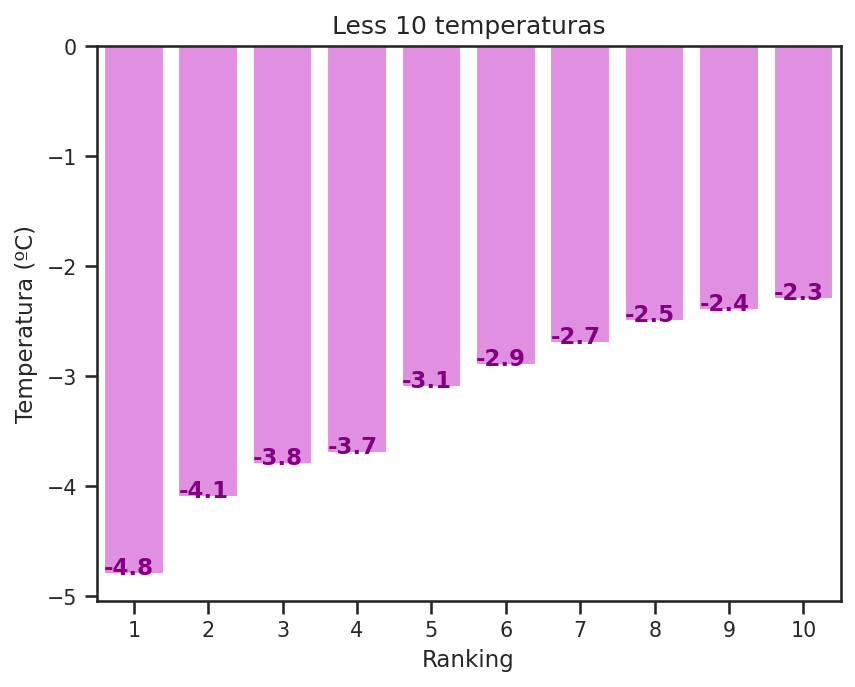

In [ ]:
labels = less_10_df['10 temperaturas más bajas'].tolist()
ax = sns.barplot(x="Ranking", y="10 temperaturas más bajas", data=less_10_df, color='violet')
for i, v in enumerate(labels):
    ax.text(i-.4, v, str(v), color='purple', fontweight='bold', fontsize=11)

ax.set_xlabel("Ranking", fontsize = 11)
ax.set_ylabel("Temperatura (ºC)", fontsize = 11)
no_texto = ax.set_title('Less 10 temperaturas', fontsize=12)

Vemos que las temperaturas mínimas dentro de las máximas son bastante bajas.

Las diez temperaturas más bajas son -4.8, -4.1, -3.8, -3.7, -3.1, -2.9, -2.7, -2.5, -2.4 y -2.3 grados..

Un análisis rápido del gráfico mostrado arriba es que esas temperaturas son demasiado bajas por encontrarse dentro de las temperaturas máximas observadas. Sospechamos que hay algún error de medición o de carga.



---



¿En qué fechas se alcanzaron dichas temperaturas?

In [ ]:
hamburguesas_values_dia_temp_max = hamburguesas_values[['temp_max', 'dia']]
less_10_fechas = hamburguesas_values_dia_temp_max.nsmallest(10, columns='temp_max')
less_10_fechas.rename(columns={'temp_max':'10 temperaturas más bajas', 'dia':'Fecha'}, inplace=True)
less_10_fechas['Fecha'] = less_10_fechas.Fecha.dt.date

**Esto puede ser alguna colcusión importante si la mínima en esos días es más baja.**

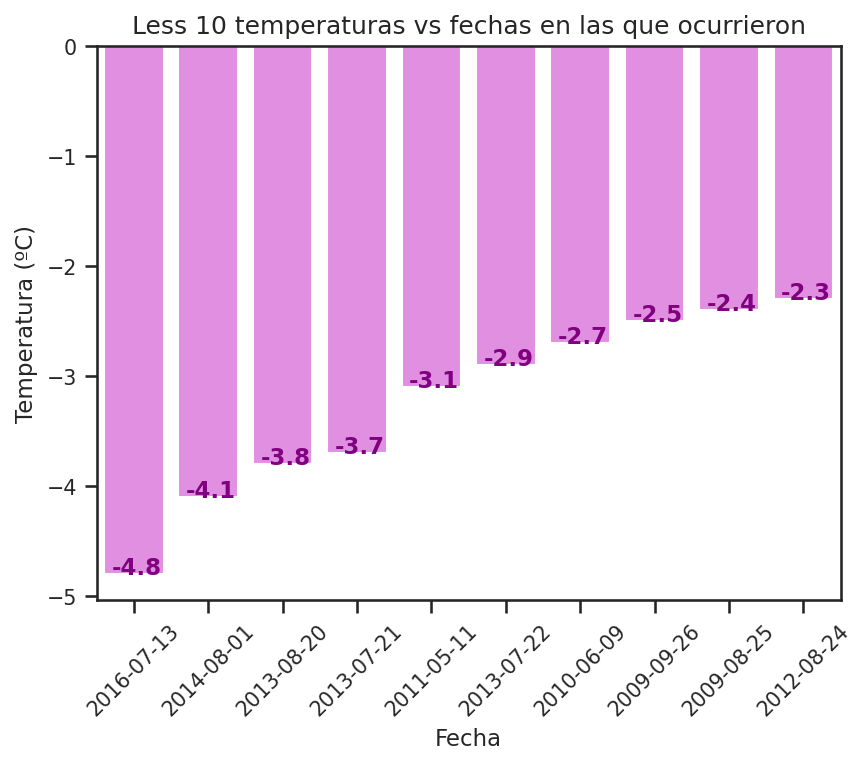

In [ ]:
labels = less_10_fechas['10 temperaturas más bajas'].tolist()
labels1 = less_10_fechas['Fecha'].to_list()
ax = sns.barplot(x="Fecha", y="10 temperaturas más bajas", data=less_10_fechas, color='violet')

for i, v in enumerate(labels):
    ax.text(i-.3, v, str(v), color='purple', fontweight='bold', fontsize=11)

ax.set_xlabel("Fecha", fontsize = 11)
ax.set_ylabel("Temperatura (ºC)", fontsize = 11)
ax.set_xticklabels(labels=labels1, rotation=45)
no_texto = ax.set_title('Less 10 temperaturas vs fechas en las que ocurrieron', fontsize=12)

Las diez temperaturas más bajas se encontraron entre mayo y septiembre.

Las diez temperaturas más bajas se dieron en 2016-07-13, 2014-08-01, 2013-08-20, 2013-07-21, 2011-05-11, 2013-07-22, 2010-06-09, 2009-09-26, 2009-08-25 y 2012-08-24.

La mayoría de estas temperaturas bajas se dieron en el invierno o en fechas cercanas a esa estación, cosa que esperábamos.



---



¿Cúal es la distribución de temperaturas?

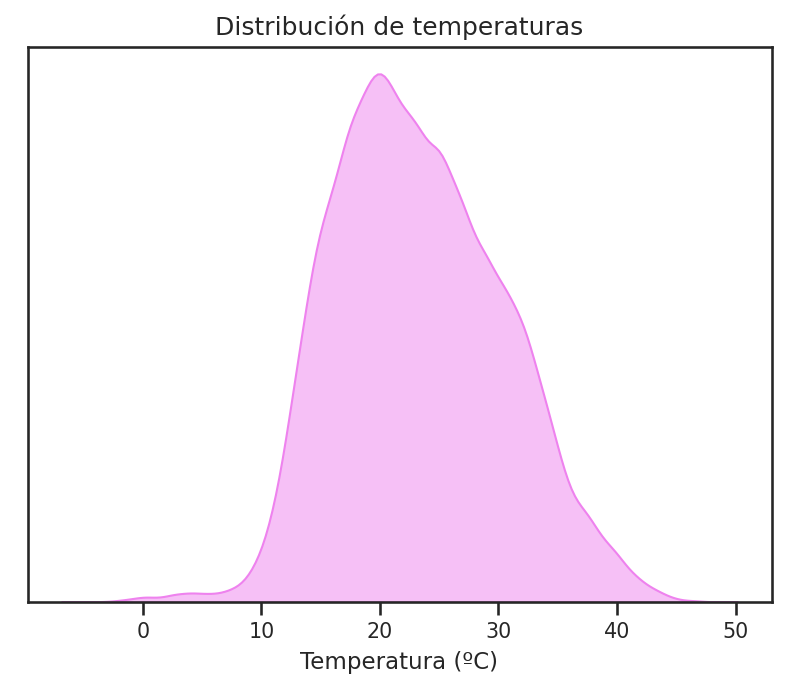

In [ ]:
ax = sns.kdeplot(x='temp_max', data=hamburguesas_values, color='violet', fill=True, alpha=0.5)
ax.set_xlabel("Temperatura (ºC)", fontsize = 11)
ax.get_yaxis().set_visible(False)
no_texto = ax.set_title('Distribución de temperaturas', fontsize=12)

La mayor cantidad de datos sobre la temperatura máxima se encuentra por encima de los 10 grados y por debajo de los 40 grados.

Las temperaturas máximas se distribuyen más que nada entre 10 a 40 grados, luego entre 0 a 10 grados, le sigue entre 40 a 50 grados y finalmente un poco menos de 0 grados.

Un breve análisis del gráfico es que rápidamente se ve cómo se distribuyen las temperaturas máximas y es entendible que la mayor cantidad de temperaturas registradas estén más cercanas a los 20 y 30 grados pues en Buenos Aires hay un clima templado húmedo.

Ver: http://www.estadistica.ec.gba.gov.ar/dpe/Estadistica/DPEANU2020/GENERALIDADES/1.2.%20Clima/definiciones.html

##### Temperatura mínima

¿Cuáles son las 10 temperaturas máximas registradas dentro de las temperaturas mínimas? 

In [ ]:
top_10 = hamburguesas_values['temp_min'].nlargest(10)
top_10_df = top_10.to_frame('10 temperaturas más altas')
top_10_df = top_10_df.reset_index()
top_10_df.rename(columns={'index':'Ranking'}, inplace=True)
top_10_df['Ranking'] = df_aux['Cantidad']

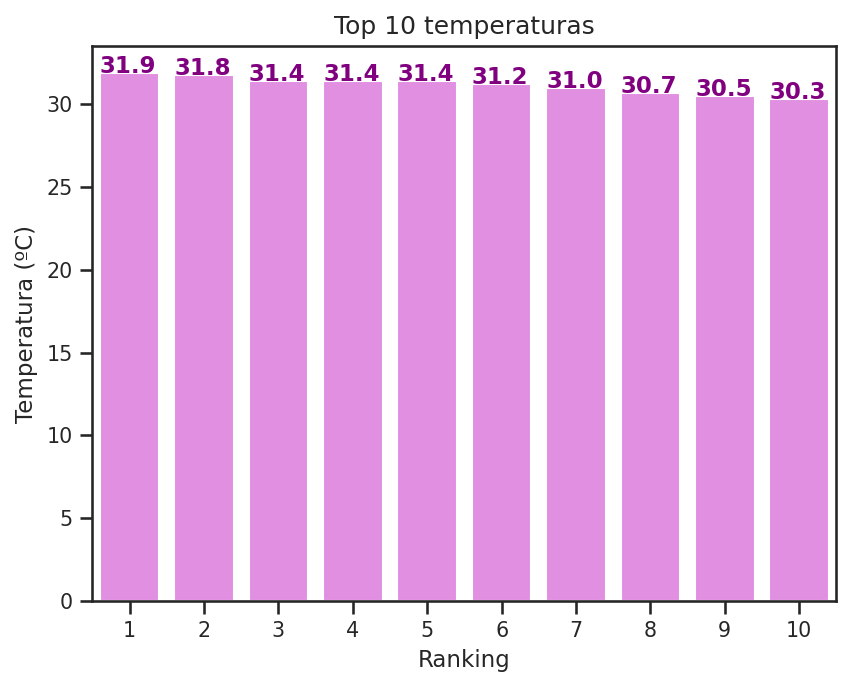

In [ ]:
labels = top_10_df['10 temperaturas más altas'].tolist()
ax = sns.barplot(x="Ranking", y="10 temperaturas más altas", data=top_10_df, color='violet')
for i, v in enumerate(labels):
    ax.text(i-.4, v, str(v), color='purple', fontweight='bold', fontsize=11)

ax.set_xlabel("Ranking", fontsize = 11)
ax.set_ylabel("Temperatura (ºC)", fontsize = 11)
no_texto = ax.set_title('Top 10 temperaturas', fontsize=12)

Vemos que las temperaturas mínimas más altas son elevadas.

Las diez temperaturas más altas son 31.9, 31.8, 31.4, 31.2, 31, 30.7, 30.5 y 30.3 grados.

Un análisis del gráfico es que las temperaturas máximas dentro de las mínimas son muy elevadas, lo cual puede decirnos que esos valores pueden estar mal medidos o ser erróneos.



---



¿En qué fechas se alcanzaron dichas temperaturas?

In [ ]:
hamburguesas_values_dia_temp_min = hamburguesas_values[['temp_min', 'dia']]
top_10_fechas = hamburguesas_values_dia_temp_min.nlargest(10, columns='temp_min')
top_10_fechas.rename(columns={'temp_min':'10 temperaturas más altas', 'dia':'Fecha'}, inplace=True)
top_10_fechas['Fecha'] = top_10_fechas.Fecha.dt.date

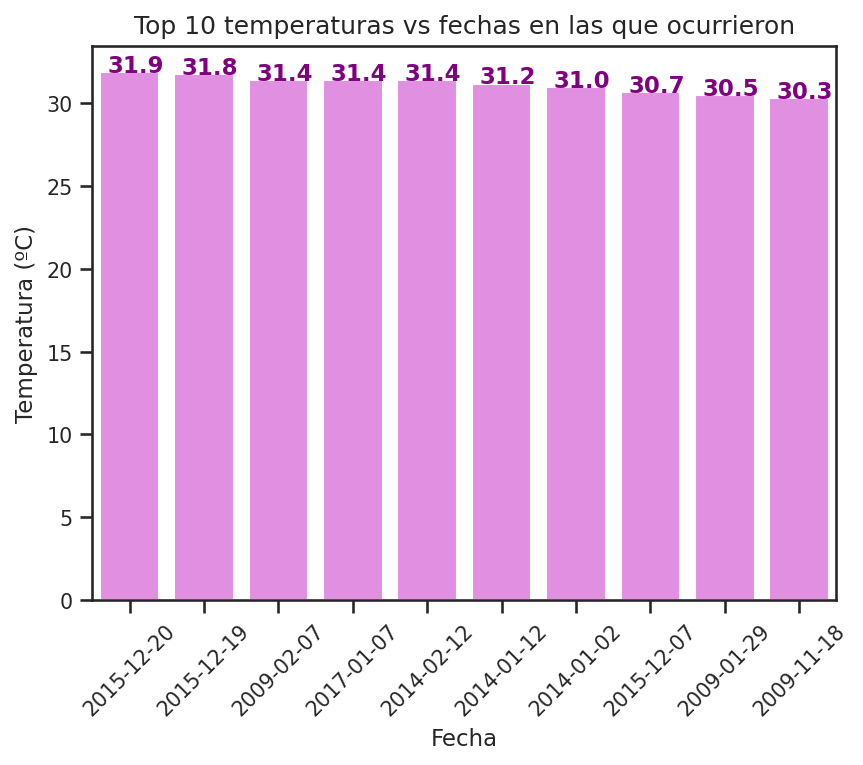

In [ ]:
labels = top_10_fechas['10 temperaturas más altas'].tolist()
labels1 = top_10_fechas['Fecha'].tolist()
ax = sns.barplot(x="Fecha", y="10 temperaturas más altas", data=top_10_fechas, color='violet')

for i, v in enumerate(labels):
    ax.text(i-.3, v, str(v), color='purple', fontweight='bold', fontsize=11)

ax.set_xlabel("Fecha", fontsize = 11)
ax.set_ylabel("Temperatura (ºC)", fontsize = 11)
ax.set_xticklabels(labels=labels1, rotation=45)
no_texto = ax.set_title('Top 10 temperaturas vs fechas en las que ocurrieron', fontsize=12)

Las diez temperaturas más altas se encontraron entre noviembre y febrero.

Las diez temperaturas más altas se dieron en 2015-12-20, 2015-12-19, 2009-02-07, 2017-01-07, 2014-02-12, 2014-01-12, 2014-01-02, 2015-12-07, 2009-01-29 y 2009-11-18.

A partir del gráfico, las diez temperaturas más altas se dieron en el verano o cerca de dicha estación y son temperaturas muy elevadas por ser un registro de temperaturas mínimas. Uno puede suponer, si las temperaturas mínimas para las fechas mostradas son las exhibidas en el gráfico, que las diez temperaturas máximas analizadas anteriormente para el registro de las temperaturas máximas fuesen el mismo día. Esa suposición solo se da para una de esas fechas, la 2009-02-07.



---



¿Cuáles son las 10 temperaturas más bajas dentro de las temperaturas mínimas?

In [ ]:
less_10 = hamburguesas_values['temp_min'].nsmallest(10)
less_10_df = less_10.to_frame('10 temperaturas más bajas')
less_10_df = less_10_df.reset_index()
less_10_df.rename(columns={'index':'Ranking'}, inplace=True)
less_10_df['Ranking'] = df_aux['Cantidad']

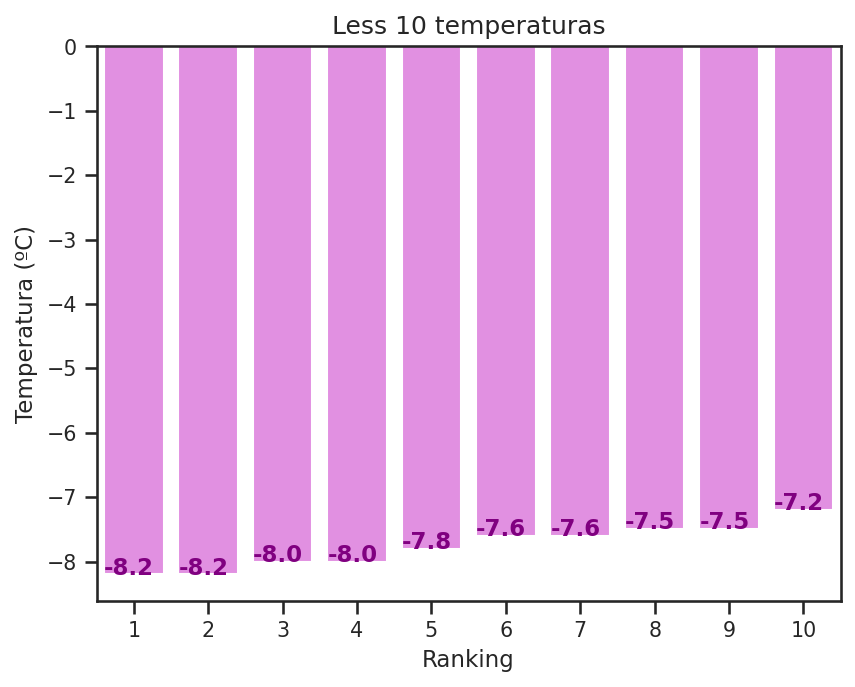

In [ ]:
labels = less_10_df['10 temperaturas más bajas'].tolist()
ax = sns.barplot(x="Ranking", y="10 temperaturas más bajas", data=less_10_df, color='violet')
for i, v in enumerate(labels):
    ax.text(i-.4, v, str(v), color='purple', fontweight='bold', fontsize=11)

ax.set_xlabel("Ranking", fontsize = 11)
ax.set_ylabel("Temperatura (ºC)", fontsize = 11)
no_texto = ax.set_title('Less 10 temperaturas', fontsize=12)

Vemos que las diez temperaturas mínimas más chicas son muy bajas.

Las diez temperaturas mínimas más chicas son -8.2, -8, -7.8, -7.6, -7.5 y -7.2 grados.

Un análisis del gráfico es que las diez temperaturas mínimas más chicas dentro de las mínimas son muy bajas, lo cual puede decirnos que esos valores pueden estar mal medidos o ser erróneos. La temperatura mínima registrada en Capital Federal fue de -5.4 grados y en 1918 así que son sospechosos los valores registrados.

Ver: https://es.wikipedia.org/wiki/Clima_de_la_ciudad_de_Buenos_Aires



---



¿En qué fechas se alcanzaron dichas temperaturas?

In [ ]:
hamburguesas_values_dia_temp_min = hamburguesas_values[['temp_min', 'dia']]
less_10_fechas = hamburguesas_values_dia_temp_min.nsmallest(10, columns='temp_min')
less_10_fechas.rename(columns={'temp_min':'10 temperaturas más bajas', 'dia':'Fecha'}, inplace=True)
less_10_fechas['Fecha'] = less_10_fechas.Fecha.dt.date

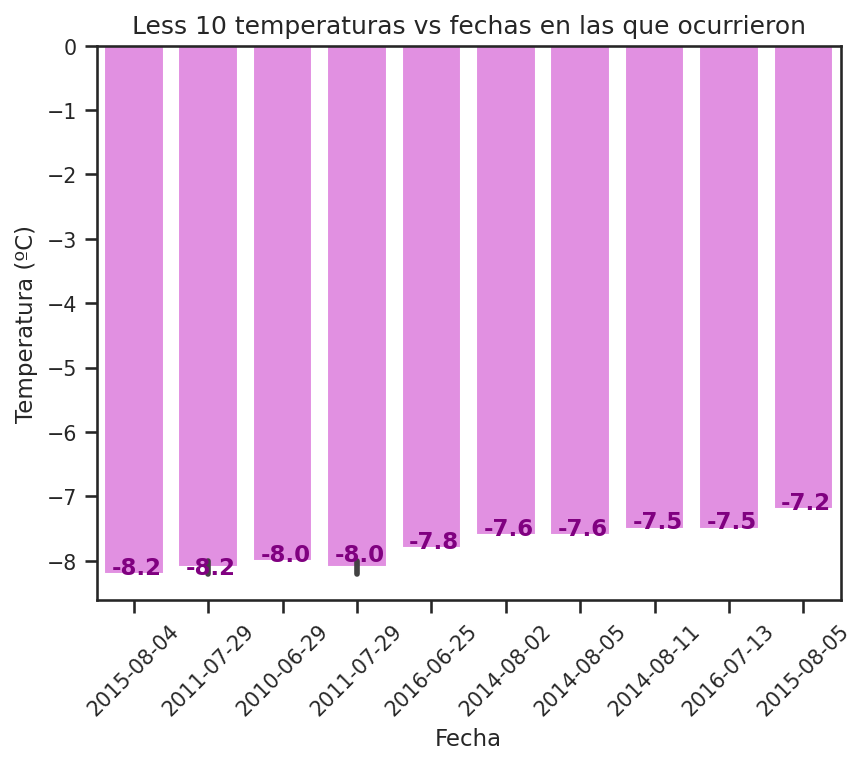

In [ ]:
labels = less_10_fechas['10 temperaturas más bajas'].tolist()
labels1 = less_10_fechas['Fecha'].to_list()
ax = sns.barplot(x="Fecha", y="10 temperaturas más bajas", data=less_10_fechas, color='violet', order=labels1)

for i, v in enumerate(labels):
    ax.text(i-.3, v, str(v), color='purple', fontweight='bold', fontsize=11)

ax.set_xlabel("Fecha", fontsize = 11)
ax.set_xticklabels(labels=labels1, rotation=45)
ax.set_ylabel("Temperatura (ºC)", fontsize = 11)
no_texto = ax.set_title('Less 10 temperaturas vs fechas en las que ocurrieron', fontsize=12)

Las diez temperaturas más bajas se encontraron entre junio y agosto.

Las fechas en las que se registraron las diez temperaturas más bajas son 2015-08-04, 2011-07-29, 2010-06-29, 2016-06-25, 2014-08-02, 2014-08-05, 2014-08-11, 2016-07-13 y 2015-08-05

Hay una fecha que se repite y tiene distinto valor de temperatura. Eso quiere decir que se pudieron haber medido en momentos del día diferentes.

A partir del gráfico, las diez temperaturas más bajas se dieron en el invierno. Uno puede suponer, si las temperaturas mínimas para las fechas mostradas son las exhibidas en el gráfico, que las diez temperaturas mínimas analizadas anteriormente para el registro de las temperaturas máximas fuesen el mismo día. Esa suposición solo se da para una de esas fechas, la 2016-07-13.



---



¿Cúal es la distribución de temperaturas?

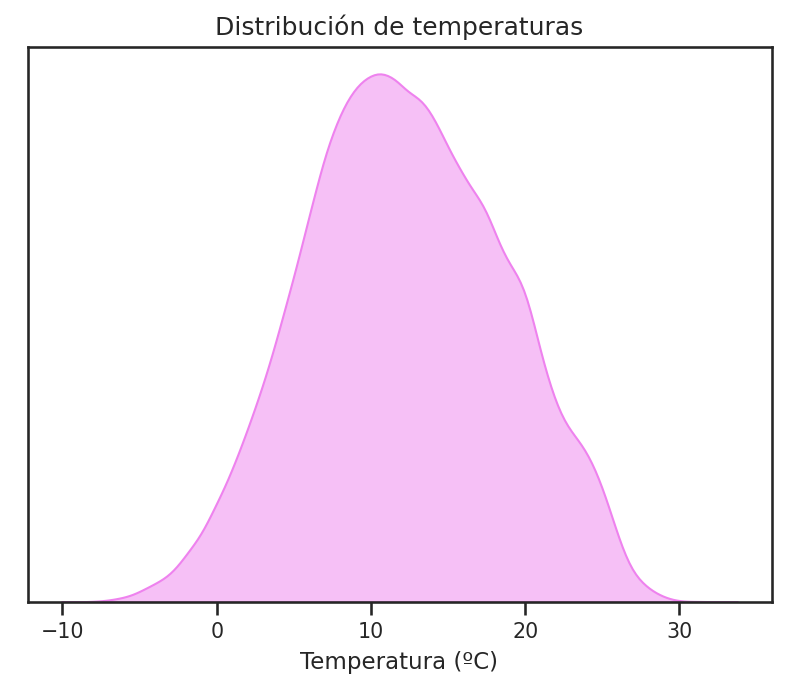

In [ ]:
ax = sns.kdeplot(x='temp_min', data=hamburguesas_values, color='violet', fill=True, alpha=0.5)
ax.set_xlabel("Temperatura (ºC)", fontsize = 11)
ax.get_yaxis().set_visible(False)
no_texto = ax.set_title('Distribución de temperaturas', fontsize=12)

La mayor cantidad de temperaturas se encuentra por encima de los 0 grados y por debajo de los 25 grados (aproximadamente, viendo la mitad del intervalo entre 20 y 30 grados).

Las temperaturas mínimas se distribuyen más que nada entre 0 a 25 grados, luego entre -10 a 0 grados y finalmente entre 25 y 30 grados.

Un breve análisis del gráfico es que rápidamente se ve cómo se distribuyen las temperaturas mínimas y es entendible que la mayor cantidad de temperaturas registradas estén más cercanas a los 10 grados pues en Buenos Aires hay un clima templado húmerdo.

Ver: http://www.estadistica.ec.gba.gov.ar/dpe/Estadistica/DPEANU2020/GENERALIDADES/1.2.%20Clima/definiciones.html

##### Temperatura temprano y tarde

¿Cuáles son las 10 temperaturas máximas registradas?

In [ ]:
top_10_temprano = hamburguesas_values['temperatura_temprano'].nlargest(10)
top_10_temprano_df = top_10_temprano.to_frame('10 temperaturas más altas')
top_10_temprano_df = top_10_temprano_df.reset_index()
top_10_temprano_df.rename(columns={'index':'Ranking'}, inplace=True)
top_10_temprano_df['Ranking'] = df_aux['Cantidad']

In [ ]:
top_10_tarde = hamburguesas_values['temperatura_tarde'].nlargest(10)
top_10_tarde_df = top_10_tarde.to_frame('10 temperaturas más altas')
top_10_tarde_df = top_10_tarde_df.reset_index()
top_10_tarde_df.rename(columns={'index':'Ranking'}, inplace=True)
top_10_tarde_df['Ranking'] = df_aux['Cantidad']

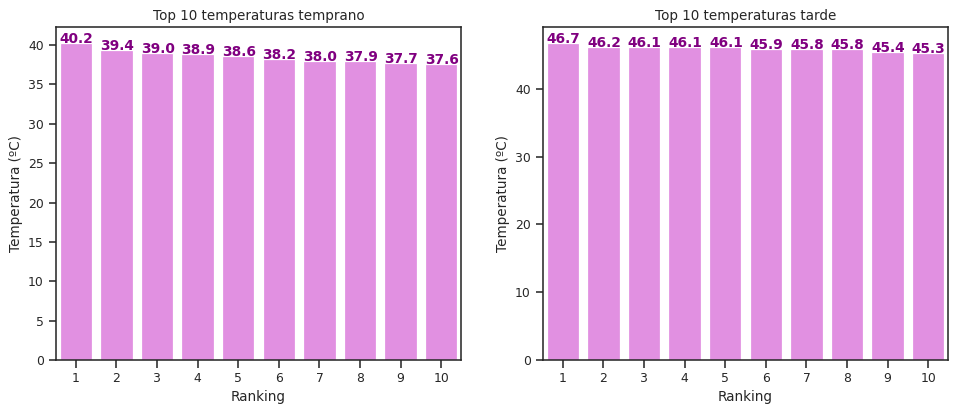

In [ ]:
labels_temprano = top_10_temprano_df['10 temperaturas más altas'].tolist()
labels_tarde = top_10_tarde_df['10 temperaturas más altas'].tolist()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=90)

ax1 = sns.barplot(x="Ranking", y="10 temperaturas más altas", data=top_10_temprano_df, color='violet', ax=axes[0])
axes[0].set_title('Top 10 temperaturas temprano')
axes[0].set_xlabel('Ranking')
axes[0].set_ylabel('Temperatura (ºC)')

for i, v in enumerate(labels_temprano):
    ax1.text(i-.4, v, str(v), color='purple', fontweight='bold', fontsize=11)

ax2 = sns.barplot(x="Ranking", y="10 temperaturas más altas", data=top_10_tarde_df, color='violet', ax=axes[1])
axes[1].set_title('Top 10 temperaturas tarde')
axes[1].set_xlabel('Ranking')
axes[1].set_ylabel('Temperatura (ºC)')

for i, v in enumerate(labels_tarde):
    ax2.text(i-.4, v, str(v), color='purple', fontweight='bold', fontsize=11)

plt.show()

Se puede ver que las diez temperaturas máximas tanto temprano como tarde son bastante altas.

Para las temperaturas registadas temprano, las diez temperaturas máximas son 40.2, 39,4, 39, 38.9, 38.6, 38.2, 38, 37.9, 37.7 y 37.6 grados.

Para las temperaturas registradas tarde, las diez temperaturas máximas son 47.6, 46.2, 46.1, 45.9, 45.8, 45.4 y 45.3 grados.

Podemos ver de los gráficos que las diez temperaturas más altas medidas a la mañana son menores que las medidas a la tardecita. Las diez temperaturas más altas medidadas a la tardecita son un poco más bajas que las diez temperaturas más altas analizadas en la sección **Temperatura máxima**.



---



¿En qué fechas se alcanzaron dichas temperaturas?

In [ ]:
hamburguesas_values_dia_temperatura_temprano = hamburguesas_values[['temperatura_temprano', 'dia']]
top_10_fechas_temprano = hamburguesas_values_dia_temperatura_temprano.nlargest(10, columns='temperatura_temprano')
top_10_fechas_temprano.rename(columns={'temperatura_temprano':'10 temperaturas más altas', 'dia':'Fecha'}, inplace=True)
top_10_fechas_temprano['Fecha'] = top_10_fechas_temprano.Fecha.dt.date

In [ ]:
hamburguesas_values_dia_temperatura_tarde = hamburguesas_values[['temperatura_tarde', 'dia']]
top_10_fechas_tarde = hamburguesas_values_dia_temperatura_tarde.nlargest(10, columns='temperatura_tarde')
top_10_fechas_tarde.rename(columns={'temperatura_tarde':'10 temperaturas más altas', 'dia':'Fecha'}, inplace=True)
top_10_fechas_tarde['Fecha'] = top_10_fechas_tarde.Fecha.dt.date

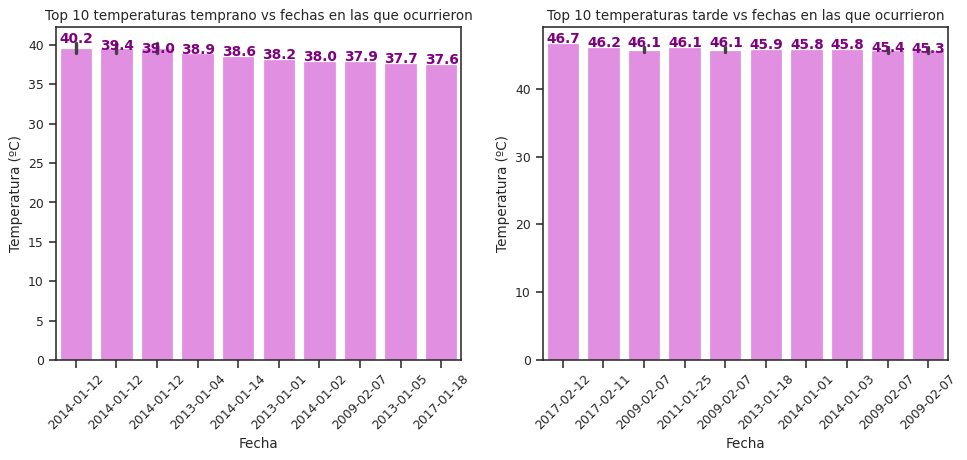

In [ ]:
labels_temprano = top_10_fechas_temprano['10 temperaturas más altas'].tolist()
labels_tarde = top_10_fechas_tarde['10 temperaturas más altas'].tolist()
labels1 = top_10_fechas_temprano['Fecha'].to_list()
labels2 = top_10_fechas_tarde['Fecha'].to_list()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=90)

ax1 = sns.barplot(x="Fecha", y="10 temperaturas más altas", data=top_10_fechas_temprano, color='violet', ax=axes[0], order=labels1)
axes[0].set_title('Top 10 temperaturas temprano vs fechas en las que ocurrieron')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Temperatura (ºC)')
axes[0].set_xticklabels(labels=labels1, rotation=45)

for i, v in enumerate(labels_temprano):
    ax1.text(i-.4, v, str(v), color='purple', fontweight='bold', fontsize=11)

ax2 = sns.barplot(x="Fecha", y="10 temperaturas más altas", data=top_10_fechas_tarde, color='violet', ax=axes[1], order=labels2)
axes[1].set_title('Top 10 temperaturas tarde vs fechas en las que ocurrieron')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Temperatura (ºC)')
axes[1].set_xticklabels(labels=labels2, rotation=45)

for i, v in enumerate(labels_tarde):
    ax2.text(i-.4, v, str(v), color='purple', fontweight='bold', fontsize=11)

plt.show()

Las diez temperaturas más altas se dieron entre enero y febrero, para ambos casos.

Para las temperaturas registradas temprano, las fechas son 2014-01-12, 2013-01-04, 2014-01-14, 2013-01-01, 2014-01-02, 2009-02-07, 2013-01-05 y 2017-01-18.

Para las temperaturas registradas por la tarde, las fechas son 2017-02-12, 2017-02-11, 2009-02-07, 2011-01-25, 2013-01-18, 2014-01-01, 2014-01-03 y 2009-02-07.

En ambos casos, hay algunas fechas que se repiten y no se midió el mismo valor de la temperaura en esas fechas. Además, lás diez temperaturas más altas se dieron en el verano.



---



¿Cuáles son las 10 temperaturas mínimas registradas?

In [ ]:
less_10_temprano = hamburguesas_values['temperatura_temprano'].nsmallest(10)
less_10_temprano_df = less_10_temprano.to_frame('10 temperaturas más bajas')
less_10_temprano_df = less_10_temprano_df.reset_index()
less_10_temprano_df.rename(columns={'index':'Ranking'}, inplace=True)
less_10_temprano_df['Ranking'] = df_aux['Cantidad']

In [ ]:
less_10_tarde = hamburguesas_values['temperatura_tarde'].nsmallest(10)
less_10_tarde_df = less_10_tarde.to_frame('10 temperaturas más bajas')
less_10_tarde_df = less_10_tarde_df.reset_index()
less_10_tarde_df.rename(columns={'index':'Ranking'}, inplace=True)
less_10_tarde_df['Ranking'] = df_aux['Cantidad']

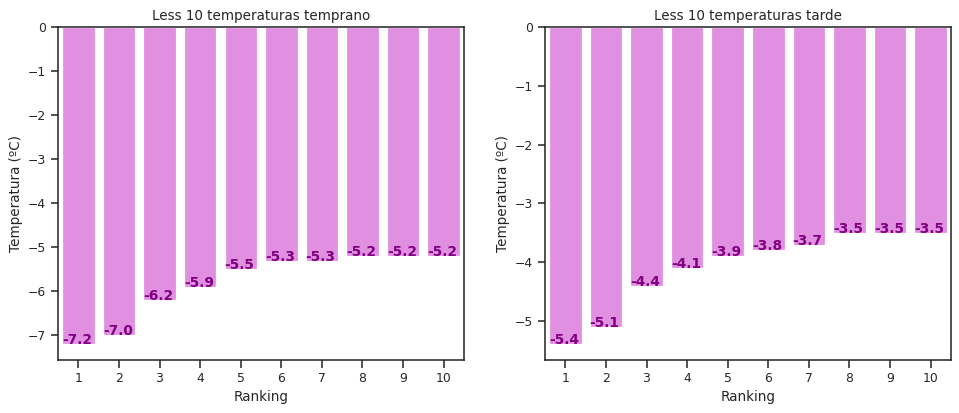

In [ ]:
labels_temprano = less_10_temprano_df['10 temperaturas más bajas'].tolist()
labels_tarde = less_10_tarde_df['10 temperaturas más bajas'].tolist()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=90)

ax1 = sns.barplot(x="Ranking", y="10 temperaturas más bajas", data=less_10_temprano_df, color='violet', ax=axes[0])
axes[0].set_title('Less 10 temperaturas temprano')
axes[0].set_xlabel('Ranking')
axes[0].set_ylabel('Temperatura (ºC)')

for i, v in enumerate(labels_temprano):
    ax1.text(i-.4, v, str(v), color='purple', fontweight='bold', fontsize=11)

ax2 = sns.barplot(x="Ranking", y="10 temperaturas más bajas", data=less_10_tarde_df, color='violet', ax=axes[1])
axes[1].set_title('Less 10 temperaturas tarde')
axes[1].set_xlabel('Ranking')
axes[1].set_ylabel('Temperatura (ºC)')

for i, v in enumerate(labels_tarde):
    ax2.text(i-.4, v, str(v), color='purple', fontweight='bold', fontsize=11)

plt.show()

Se puede ver que en ambos casos, las diez temperaturas más bajas son muy bajas.

Las diez temperaturas más bajas medidas temprano son -7.2, -7, -6.2, -5.9, -5.5, -5.3 y -5.2 grados.

Las diez temperaturas más bajas medidas por la tarde son -5.4, -5.1, -4.4, -4.1, -3.9, -3.8, -3.7 y -3.5 grados.

Es entendible que la temperatura por la mañana sea menor que por la tarde pero, para Capital Federal, las diez temperaturas más bajas medidadas temprano y por la tarde son muy bajas. 



---



¿En qué fechas se alcanzaron dichas temperaturas?

In [ ]:
hamburguesas_values_dia_temperatura_temprano = hamburguesas_values[['temperatura_temprano', 'dia']]
less_10_fechas_temprano = hamburguesas_values_dia_temperatura_temprano.nsmallest(10, columns='temperatura_temprano')
less_10_fechas_temprano.rename(columns={'temperatura_temprano':'10 temperaturas más bajas', 'dia':'Fecha'}, inplace=True)
less_10_fechas_temprano['Fecha'] = less_10_fechas_temprano.Fecha.dt.date

In [ ]:
hamburguesas_values_dia_temperatura_tarde = hamburguesas_values[['temperatura_tarde', 'dia']]
less_10_fechas_tarde = hamburguesas_values_dia_temperatura_tarde.nsmallest(10, columns='temperatura_tarde')
less_10_fechas_tarde.rename(columns={'temperatura_tarde':'10 temperaturas más bajas', 'dia':'Fecha'}, inplace=True)
less_10_fechas_tarde['Fecha'] = less_10_fechas_tarde.Fecha.dt.date

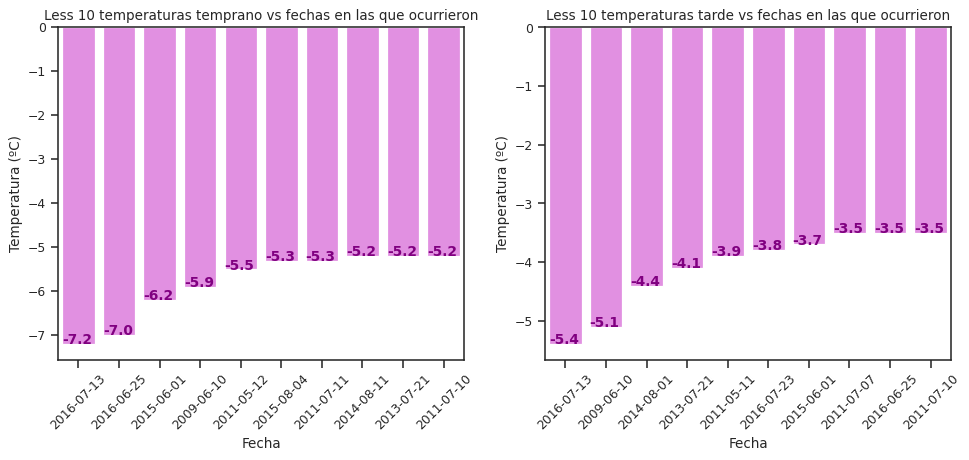

In [ ]:
labels_temprano = less_10_fechas_temprano['10 temperaturas más bajas'].tolist()
labels_tarde = less_10_fechas_tarde['10 temperaturas más bajas'].tolist()
labels1 = less_10_fechas_temprano['Fecha'].to_list()
labels2 = less_10_fechas_tarde['Fecha'].to_list()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=90)

ax1 = sns.barplot(x="Fecha", y="10 temperaturas más bajas", data=less_10_fechas_temprano, color='violet', ax=axes[0])
axes[0].set_title('Less 10 temperaturas temprano vs fechas en las que ocurrieron')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Temperatura (ºC)')
axes[0].set_xticklabels(labels=labels1, rotation=45)

for i, v in enumerate(labels_temprano):
    ax1.text(i-.4, v, str(v), color='purple', fontweight='bold', fontsize=11)

ax2 = sns.barplot(x="Fecha", y="10 temperaturas más bajas", data=less_10_fechas_tarde, color='violet', ax=axes[1])
axes[1].set_title('Less 10 temperaturas tarde vs fechas en las que ocurrieron')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Temperatura (ºC)')
axes[1].set_xticklabels(labels=labels2, rotation=45)

for i, v in enumerate(labels_tarde):
    ax2.text(i-.4, v, str(v), color='purple', fontweight='bold', fontsize=11)

plt.show()

Las diez temperaturas más bajas se dieron entre mayo y agosto, para ambos casos.

Las fechas en las que se midieron dichas temperaturas por la mañana son 2016-07-13, 2016-06-25, 2015-06-01, 2011-05-12, 2015-08-04, 2011-07-11, 2014-08-11, 2013-07-21 y 2011-07-10.

Las fechas en las que ocurrieron dichas temperaturas por la tarde son 2016-07-13, 2009-06-10, 2014-08-01, 2013-07-21, 2011-05-11, 2016-07-23, 2015-06-01, 2011-07-07, 2016-06-25 y 2011-07-10.

De los gráficos podemos analizar que, para ambos casos, las diez temperaturas más bajas se dieron en el invierno o en fechas cercanas a dicha estación.



---



¿Cúal es la distribución de temperaturas?

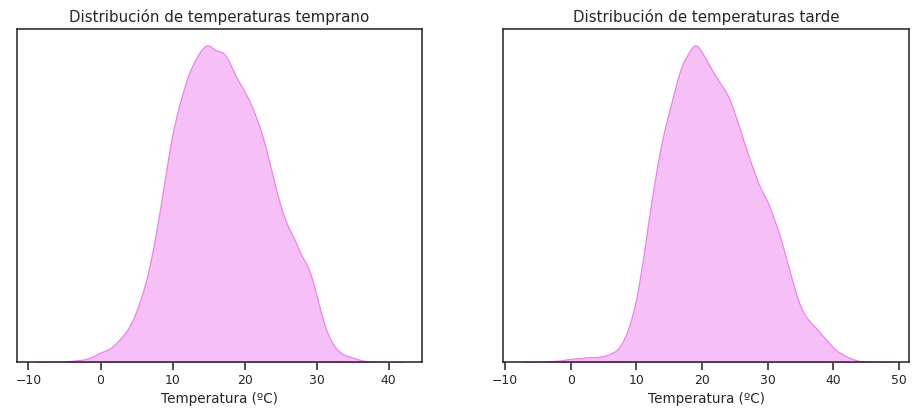

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=90)

ax1 = sns.kdeplot(data=hamburguesas_values, x='temperatura_temprano', fill=True, color='violet', ax=axes[0], alpha=.5)
axes[0].set_title('Distribución de temperaturas temprano', fontsize=12)
axes[0].set_xlabel('Temperatura (ºC)')
axes[0].get_yaxis().set_visible(False)

ax2 = sns.kdeplot(data=hamburguesas_values, x='temperatura_tarde', fill=True, color='violet', ax=axes[1], alpha=.5)
axes[1].set_title('Distribución de temperaturas tarde', fontsize=12)
axes[1].set_xlabel('Temperatura (ºC)')
axes[1].get_yaxis().set_visible(False)

plt.show()

La mayor cantidad de temperaturas se encuentra entre 10 y 25 grados (aproximadamente), para el caso de la distribución de temperaturas tomadas por la mañana. Para el otro caso, la mayor cantidad de temperaturas se encuentra entre los 15 y 30 grados (aproximadamente).

Las temperaturas tomadas por la mañana se distribuyen más que nada entre 5 y 30 grados, luego entre un poco menos de 0 a 5 grados y finalmente de 30 a 35 grados (aproximadamente).

Las temperaturas tomadas por la tarde se distribuyen más que nada entre 10 a 35 grados, luego entre 35 a 40 grados y finalmente entre un poco menos de 0 a 10 grados.

Un breve análisis de los gráficos es que se puede ver rápidamente como se comporta la temperatura a la mañana y a la tarde y que la distribución de las temperaturas medidas a la mañana no tiene un pico tan abrupto como el de las medidas por la tarde.

### Viento

##### Velocidad ráfagas de viento máximas

¿Cuáles son las 10 velocidades más altas registradas?

In [ ]:
top_10 = hamburguesas_values['rafaga_viento_max_velocidad'].nlargest(10)
top_10_df = top_10.to_frame('10 velocidades más altas')
top_10_df = top_10_df.reset_index()
top_10_df.rename(columns={'index':'Ranking'}, inplace=True)
top_10_df['Ranking'] = df_aux['Cantidad']

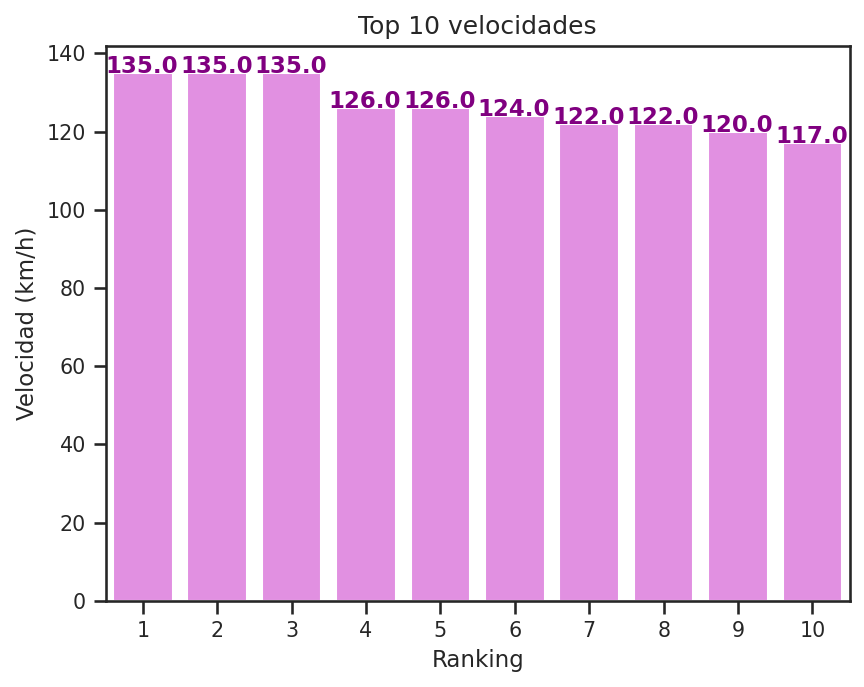

In [ ]:
labels = top_10_df['10 velocidades más altas'].tolist()
ax = sns.barplot(x="Ranking", y="10 velocidades más altas", data=top_10_df, color='violet')
for i, v in enumerate(labels):
    ax.text(i-.5, v, str(v), color='purple', fontweight='bold', fontsize=11)

ax.set_xlabel("Ranking", fontsize = 11)
ax.set_ylabel("Velocidad (km/h)", fontsize = 11)
no_texto = ax.set_title('Top 10 velocidades', fontsize=12)

Las diez velocidades máximas son bastante elevadas.

Las diez velocidades más altas son 135, 126, 124, 122, 120 y 117 km/h.

El gráfico nos muestra que las diez velocidades máximas no son muy parejas.



---



¿En qué fechas se dieron esas velocidades?

In [ ]:
hamburguesas_values_dia_velocidad_viento = hamburguesas_values[['rafaga_viento_max_velocidad', 'dia']]
top_10_fechas = hamburguesas_values_dia_velocidad_viento.nlargest(10, columns='rafaga_viento_max_velocidad')
top_10_fechas.rename(columns={'rafaga_viento_max_velocidad':'10 velocidades más altas', 'dia':'Fecha'}, inplace=True)
top_10_fechas['Fecha'] = top_10_fechas.Fecha.dt.date

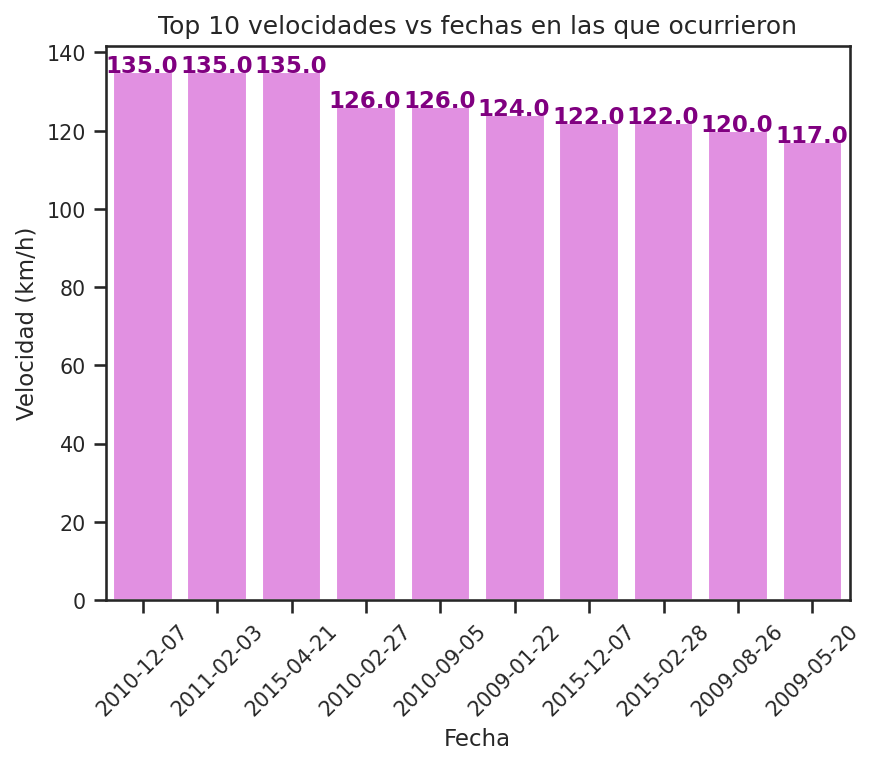

In [ ]:
labels = top_10_fechas['10 velocidades más altas'].tolist()
labels1 = top_10_fechas['Fecha'].tolist()
ax = sns.barplot(x="Fecha", y="10 velocidades más altas", data=top_10_fechas, color='violet')

for i, v in enumerate(labels):
    ax.text(i-.5, v, str(v), color='purple', fontweight='bold', fontsize=11)

ax.set_xlabel("Fecha", fontsize = 11)
ax.set_ylabel("Velocidad (km/h)", fontsize = 11)
ax.set_xticklabels(labels=labels1, rotation=45)
no_texto = ax.set_title('Top 10 velocidades vs fechas en las que ocurrieron', fontsize=12)

Las fechas en las que currieron dichas velocidades no siguen nungún patrón.

Las fechas en las que ocurrieron las diez velocidades más altas son 2010-12-07, 2011-02-03, 2015-04-21, 2010-02-27, 2010-09-05, 2009-01-22, 2015-12-07, 2015-02-28, 2009-08-26 y 2009-05-20.

Un análisis del gráfico es que en 2009, 2010 y 2015 ocurrieron las diez velocidades más altas registradas.



---



¿Cuáles son las 10 velocidades más bajas registradas?

In [ ]:
less_10 = hamburguesas_values['rafaga_viento_max_velocidad'].nsmallest(10)
less_10_df = less_10.to_frame('10 velocidades más bajas')
less_10_df = less_10_df.reset_index()
less_10_df.rename(columns={'index':'Ranking'}, inplace=True)
less_10_df['Ranking'] = df_aux['Cantidad']

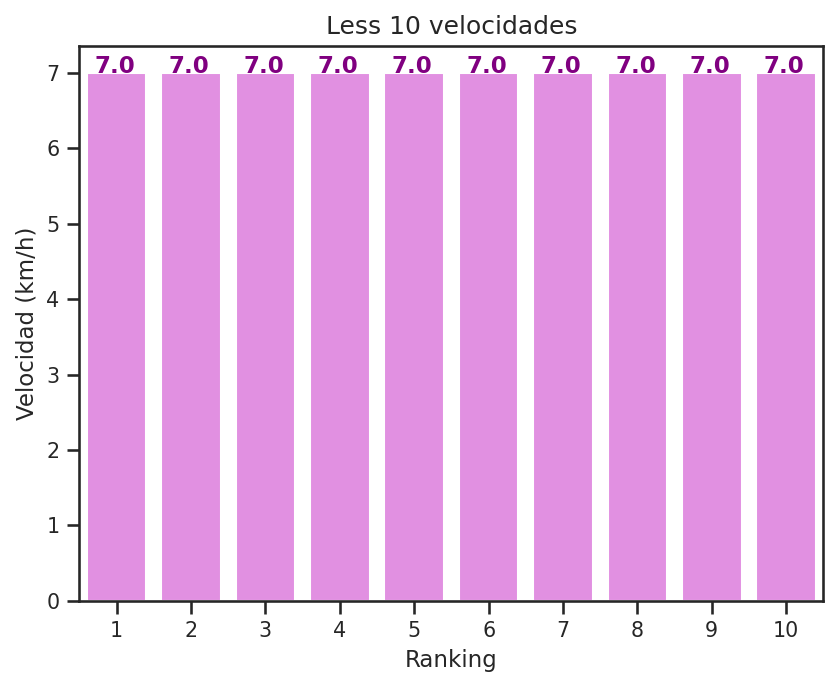

In [ ]:
labels = less_10_df['10 velocidades más bajas'].tolist()
ax = sns.barplot(x="Ranking", y="10 velocidades más bajas", data=less_10_df, color='violet')
for i, v in enumerate(labels):
    ax.text(i-.3, v, str(v), color='purple', fontweight='bold', fontsize=11)

ax.set_xlabel("Ranking", fontsize = 11)
ax.set_ylabel("Velocidad (km/h)", fontsize = 11)
no_texto = ax.set_title('Less 10 velocidades', fontsize=12)

Las diez velocidades más bajas son iguales.

Las diez velocidades de viento más bajas, que en este caso es una sola que se repite en los diez registros mostrados, son 7 km/h.

El gráfico nos mustra que los diez registros que contienen la velocidad más baja tienen la misma velocidad.



---



¿En qué fechas se dieron esas velocidades?



In [ ]:
hamburguesas_values_dia_velocidad_viento = hamburguesas_values[['rafaga_viento_max_velocidad', 'dia']]
less_10_fechas = hamburguesas_values_dia_velocidad_viento.nsmallest(10, columns='rafaga_viento_max_velocidad')
less_10_fechas.rename(columns={'rafaga_viento_max_velocidad':'10 velocidades más bajas', 'dia':'Fecha'}, inplace=True)
less_10_fechas['Fecha'] = less_10_fechas.Fecha.dt.date

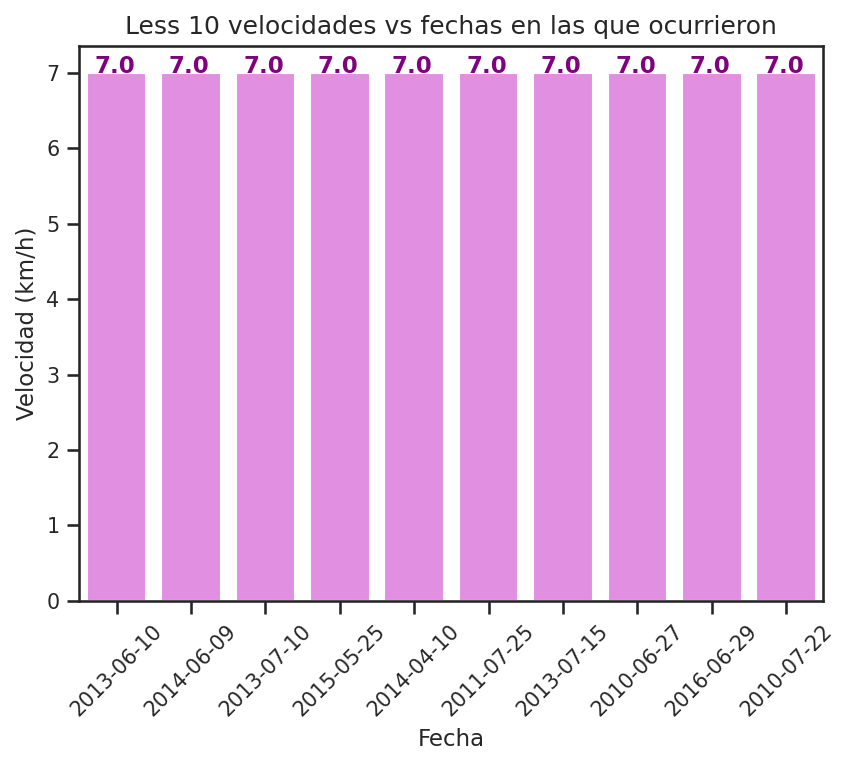

In [ ]:
labels = less_10_fechas['10 velocidades más bajas'].tolist()
labels1 = less_10_fechas['Fecha'].tolist()
ax = sns.barplot(x="Fecha", y="10 velocidades más bajas", data=less_10_fechas, color='violet')

for i, v in enumerate(labels):
    ax.text(i-.3, v, str(v), color='purple', fontweight='bold', fontsize=11)

ax.set_xlabel("Fecha", fontsize = 11)
ax.set_ylabel("Velocidad (km/h)", fontsize = 11)
ax.set_xticklabels(labels=labels1, rotation=45)
no_texto = ax.set_title('Less 10 velocidades vs fechas en las que ocurrieron', fontsize=12)

Las fechas en las que ocurrieron tienen la particularidad que se dieron en el otoño o el invierno.

Las fechas en las que ocurrieron son 2013-06-10, 2014-06-09, 2013-07-10, 2015-05-25, 2014-04-10, 2011-07-25, 2013-07-15, 2010-07-15, 2010-06-27, 2016-06-29 y 2010-07-22.

Un breve análisis del gráfico es que en el otoño o el invierno se dieron las velocidades de los vientos más bajas. 



---



¿Cómo se distribuye la velocidad entre intervalos de a 20 km/h?

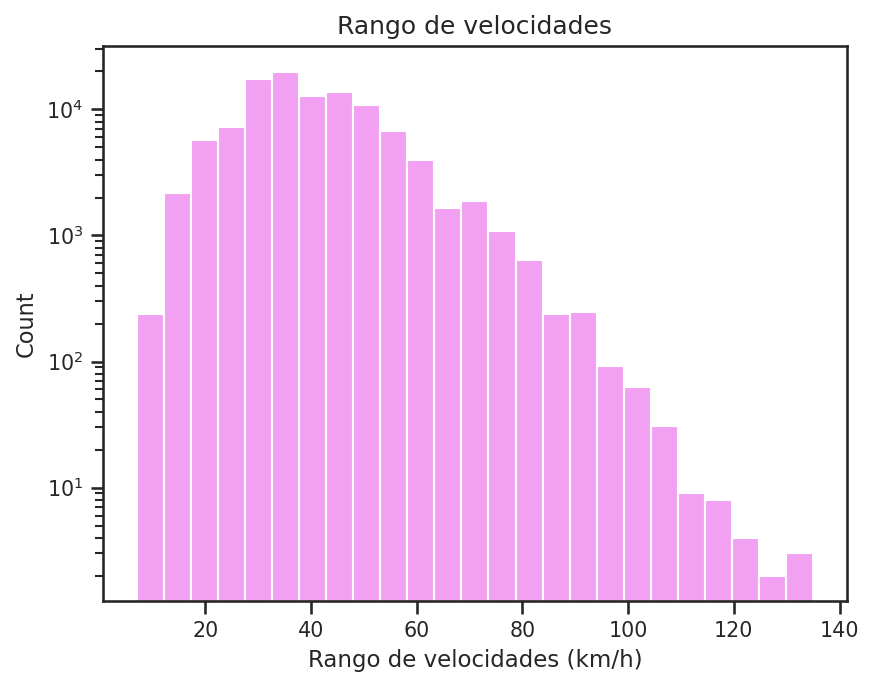

In [ ]:
#colores = ['blueviolet', 'indigo', 'purple', 'darkviolet', 'darkorchid', 'mediumorchid', 'violet']
#ax = sns.barplot(x="Rangos", y="Cantidad de velocidades", data=df, palette=colores, color='Violet')
#ax.set_yscale("log")
#ax.set_xlabel("Rango de velocidades (km/h)", fontsize = 11)
#ax.get_yaxis().set_visible(False)
#no_texto = ax.set_title('Rango de velocidades', fontsize=12)

ax = sns.histplot(data=hamburguesas_values['rafaga_viento_max_velocidad'], color='Violet', bins=25)
ax.set_yscale("log")
ax.set_xlabel("Rango de velocidades (km/h)", fontsize = 11)
no_texto = ax.set_title('Rango de velocidades', fontsize=12)

#hamburguesas_values['rafaga_viento_max_velocidad'].hist()

La velocidad de la mayoría de los vientos registrados fue de entre 20 y 60 km/h.

La velocidad se distribuye en su mayoría entre los intervalos de 20 a 60 km/h le siguen los intervalos 60 a 80 km/h, 0 a 20 km/h, 80 a 100 km/h, 100 a 120 km/h (en ese orden) y por último el intervalo 120 a 140 km/h.

El gráfico se tuvo que hacer en una escala logarítmica porque si no no se mostraba correctamente lo que se quería mostrar. La intensidad del color purpura refleja la cantidad de registros de vientos en cada intervalo (más oscuro, más registros; más claro, menos registros).

##### Dirección ráfagas de viento máximas

¿Cuál es el porcentaje de direcciones de viento?

In [ ]:
df = hamburguesas_values['rafaga_viento_max_direccion'].value_counts(normalize=True).to_frame('Porcentaje')
df.reset_index(inplace=True)
df.rename(columns={'index':'Direcciones de viento'}, inplace=True)

for i in range(len(df)):
  df.iloc[i, 1] = df.iloc[i, 1] * 100

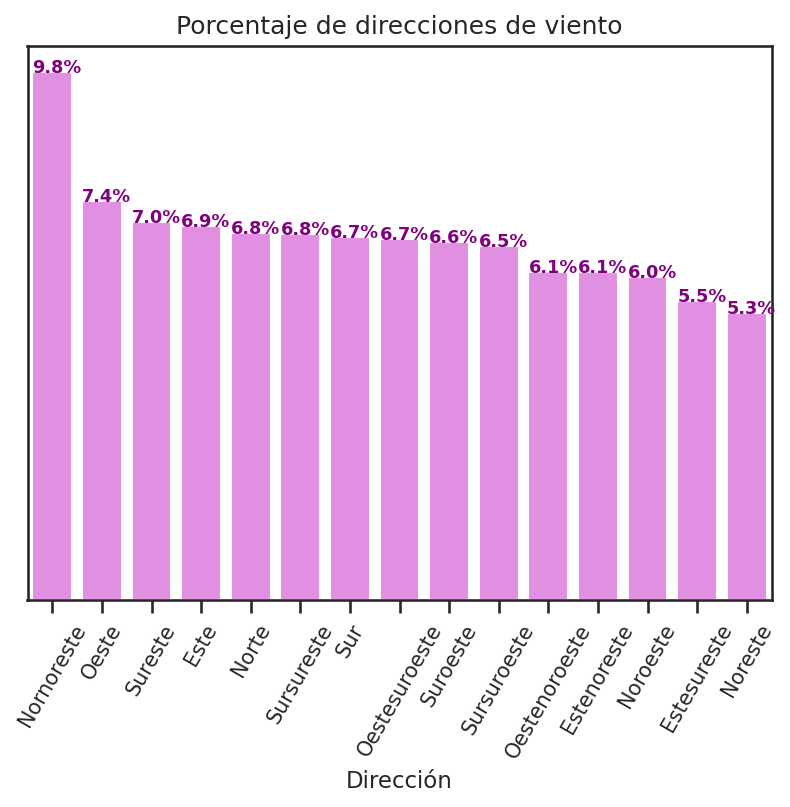

In [ ]:
labels1 = df['Direcciones de viento'].tolist()
labels = df['Porcentaje'].tolist()
ax = sns.barplot(x='Direcciones de viento', y='Porcentaje', data=df, color='violet')
#ax = sns.barplot(x='Direcciones de viento', y='Cantidad de registros', data=df, palette=sns.diverging_palette(240, 10, n=15))

for i, v in enumerate(labels):
    ax.text(i-.4, v, str(round(v, 1)) + '%', color='purple', fontweight='bold', fontsize=8.5)

ax.set_xticklabels(labels=labels1, rotation=60)
ax.set_xlabel("Dirección", fontsize = 11)
ax.get_yaxis().set_visible(False)
no_texto = ax.set_title('Porcentaje de direcciones de viento', fontsize=12)

La dirección de viento más frecuente es la Nornoreste.

El porcentaje de las direcciones de viento es 9.8% para Nornoreste, 7.4% para Oeste, 7% para Sureste, 6.9% para Este, 6.8% para Norte y Sursureste, 6.7% para Sur y Oestesuroeste, 6.6% para Suroeste, 6.5% para Sursuroeste, 6.1% para Oestenoroeste y Estenoreste, 6% para Noreste, 5.5% para Estesureste y 5.3% para Noreste.

Un breve análisis del gráfico es que la mayoría de las direcciones tiene un porcentaje de entre el 7% y 6.5%, las direcciones más comunes son Nornoreste y Oeste y las menos comunes son Estesuroeste y Noreste.

##### Velocidad viento temprano y tarde

¿Cuál es la mayor velocidad registrada a la mañana?

In [ ]:
hamburguesas_values['velocidad_viendo_temprano'].max()

130.0

¿Cuál es la menor velocidad registrada a la mañana?

In [ ]:
hamburguesas_values['velocidad_viendo_temprano'].min()

0.0

¿Cuál es la mayor velocidad registrada a la tarde?

In [ ]:
hamburguesas_values['velocidad_viendo_tarde'].max()

87.0

¿Cuál es la menor velocidad registrada a la tarde?

In [ ]:
hamburguesas_values['velocidad_viendo_tarde'].min()

0.0

¿Cuáles son las 10 mayores velocidades y cuándo se dieron?

In [ ]:
hamburguesas_values_dia_velocidad_viento_tempra = hamburguesas_values[hamburguesas_values['velocidad_viendo_temprano'] > 0][['velocidad_viendo_temprano', 'dia']]
top_10_fechas_temprano = hamburguesas_values_dia_velocidad_viento_tempra.nlargest(10, columns='velocidad_viendo_temprano')
top_10_fechas_temprano.rename(columns={'velocidad_viendo_temprano':'10 velocidades más altas', 'dia':'Fecha'}, inplace=True)
top_10_fechas_temprano['Fecha'] = top_10_fechas_temprano.Fecha.dt.date

hamburguesas_values_dia_velocidad_viento_tarde = hamburguesas_values[hamburguesas_values['velocidad_viendo_tarde'] > 0][['velocidad_viendo_tarde', 'dia']]
top_10_fechas_tarde = hamburguesas_values_dia_velocidad_viento_tarde.nlargest(10, columns='velocidad_viendo_tarde')
top_10_fechas_tarde.rename(columns={'velocidad_viendo_tarde':'10 velocidades más altas', 'dia':'Fecha'}, inplace=True)
top_10_fechas_tarde['Fecha'] = top_10_fechas_tarde.Fecha.dt.date

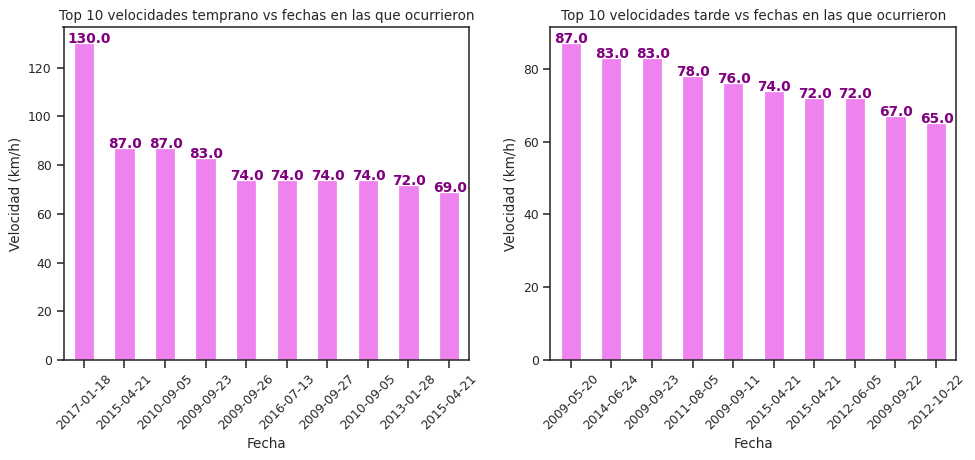

In [ ]:
labels_temprano = top_10_fechas_temprano['10 velocidades más altas'].tolist()
labels_tarde = top_10_fechas_tarde['10 velocidades más altas'].tolist()
labels1 = top_10_fechas_temprano['Fecha'].to_list()
labels2 = top_10_fechas_tarde['Fecha'].to_list()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=90)

#ax1 = sns.barplot(x="Fecha", y="10 velocidades más altas", data=top_10_fechas_temprano, color='violet', ax=axes[0], order=labels1)
ax1 = top_10_fechas_temprano.plot(x='Fecha', y='10 velocidades más altas', kind='bar', ax=axes[0], color='violet', legend=False)
axes[0].set_title('Top 10 velocidades temprano vs fechas en las que ocurrieron')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Velocidad (km/h)')
axes[0].set_xticklabels(labels=labels1, rotation=45)

for i, v in enumerate(labels_temprano):
    ax1.text(i-.4, v, str(v), color='purple', fontweight='bold', fontsize=11)

#ax2 = sns.barplot(x="Fecha", y="10 velocidades más altas", data=top_10_fechas_tarde, color='violet', ax=axes[1], order=labels2)
ax2 = top_10_fechas_tarde.plot(x='Fecha', y='10 velocidades más altas', kind='bar', ax=axes[1], color='violet', legend=False)
axes[1].set_title('Top 10 velocidades tarde vs fechas en las que ocurrieron')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Velocidad (km/h)')
axes[1].set_xticklabels(labels=labels2, rotation=45)

for i, v in enumerate(labels_tarde):
    ax2.text(i-.4, v, str(v), color='purple', fontweight='bold', fontsize=11)

plt.show()

En el caso de las velocidades registradas en la mañana, las diez velocidades del viento más altas son bastante altas y ocurrieron bastante en el mes de septiembre.

En el caso de las velocidades registradas en la tardecita, las diez velocidades del viento más altas son un poco menos altas que las registradas en la mañana y septiembre volvió a ser el mes donde más ocurrieron estas velociades.

Las diez velocidades más altas registradas por la mañana son 130, 87, 83, 74, 72 y 69 km/h y se dieron en las siguientas fechas: 2017-01-18, 2015-04-21, 2010-09-05, 2009-09-23, 2009-09-26, 2016-07-13, 2009-09-27, 2010-09-05 y 2013-01-28.

Las diez velocidades más altas registradas en la tardecita son 87, 83, 78, 76, 74, 72, 67 y 65 km/h y se dieron en las siguientes fechas: 2009-05-20, 2014-06-24, 2009-09-23, 2011-08-05, 2009-09-11, 2015-04-21, 2012-06-05, 2009-09-22 y 2012-10-22.

Un breve análisis de los gráficos es que las velocidades registradas por la mañana son un poco más elevadas que las registradas por la tardecita y que el mes en el que ocurrieron muchos de estos registros es septiembre.



---



¿Cuáles son las 10 velocidades más chicas (mayores a cero) y cuándo se registraron?

In [ ]:
less_10_fechas_temprano = hamburguesas_values_dia_velocidad_viento_tempra.nsmallest(10, columns='velocidad_viendo_temprano')
less_10_fechas_temprano.rename(columns={'velocidad_viendo_temprano':'10 velocidades más bajas', 'dia':'Fecha'}, inplace=True)
less_10_fechas_temprano['Fecha'] = less_10_fechas_temprano.Fecha.dt.date

In [ ]:
less_10_fechas_tarde = hamburguesas_values_dia_velocidad_viento_tarde.nsmallest(10, columns='velocidad_viendo_tarde')
less_10_fechas_tarde.rename(columns={'velocidad_viendo_tarde':'10 velocidades más bajas', 'dia':'Fecha'}, inplace=True)
less_10_fechas_tarde['Fecha'] = less_10_fechas_tarde.Fecha.dt.date

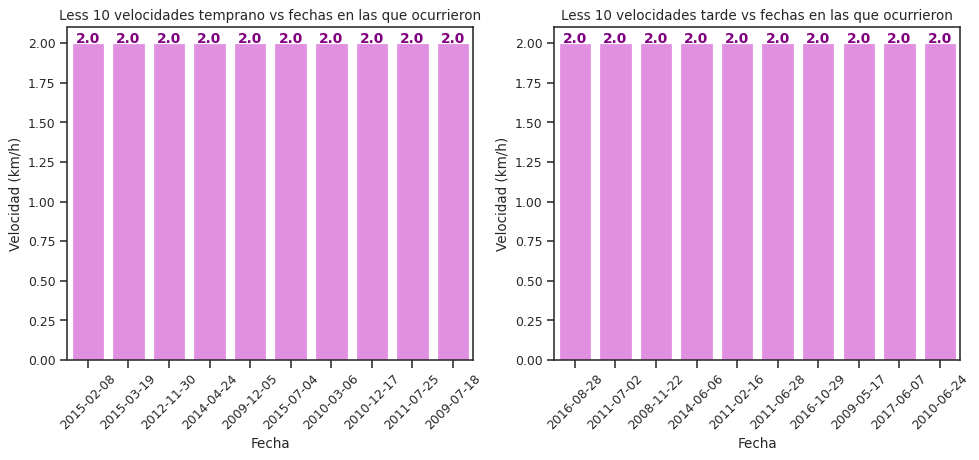

In [ ]:
labels_temprano = less_10_fechas_temprano['10 velocidades más bajas'].tolist()
labels_tarde = less_10_fechas_tarde['10 velocidades más bajas'].tolist()
labels1 = less_10_fechas_temprano['Fecha'].to_list()
labels2 = less_10_fechas_tarde['Fecha'].to_list()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=90)

ax1 = sns.barplot(x="Fecha", y="10 velocidades más bajas", data=less_10_fechas_temprano, color='violet', ax=axes[0])
axes[0].set_title('Less 10 velocidades temprano vs fechas en las que ocurrieron')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Velocidad (km/h)')
axes[0].set_xticklabels(labels=labels1, rotation=45)

for i, v in enumerate(labels_temprano):
    ax1.text(i-.3, v, str(v), color='purple', fontweight='bold', fontsize=11)

ax2 = sns.barplot(x="Fecha", y="10 velocidades más bajas", data=less_10_fechas_tarde, color='violet', ax=axes[1])
axes[1].set_title('Less 10 velocidades tarde vs fechas en las que ocurrieron')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Velocidad (km/h)')
axes[1].set_xticklabels(labels=labels2, rotation=45)

for i, v in enumerate(labels_tarde):
    ax2.text(i-.3, v, str(v), color='purple', fontweight='bold', fontsize=11)

plt.show()

Las deiz velocidades más bajas registradas a la mañana y en la tardecita tienen el mismo valor, 2 km/h y el mes en el que suele ocurrir esas velociades es julio (para el caso de los registros obtenidos por la mañana) y junio (en el caso de los registros obtenidos por la tardecita). 

En este caso, tanto por la mañana y en la tardecita, se registró la misma velocidad más baja: 2 km/h. En el caso de los registros obtenidos por la mañana, ocurrió en las siguientes fechas: 2015-02-08, 2015-03-19, 2012-11-30, 2012-11-30, 2014-04-24, 2009-12-05, 2015-07-04, 2010-06-06, 2011-07-25 y 2009-07-18.

En el caso de los registros obtenidos en la tardecita: 2016-08-28, 2011-07-02, 2008-11-22, 2014-06-06, 2011-02-16, 2011-06-28, 2016-10-29, 2009-05-17, 2017-06-07 y 2010-06-24.

Un breve análisis de los gráficos es que las diez velocidades más bajas obtenidas por la mañana y en la tardecita es que se obtuvo la misma velocidad para esos registros y que los meses donde más suelen ocurrir son julio y diciembre (caso velocidades registradas en la mañana) y junio (caso velocidades registradas por la tardecita).



---



¿Cómo estan distribuidas las velocidades de nuestro dataset?

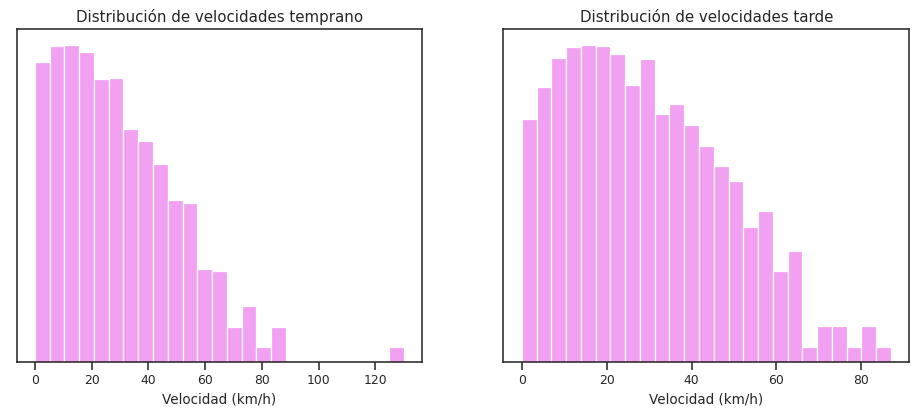

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=90)

ax1 = sns.histplot(data=hamburguesas_values, x='velocidad_viendo_temprano', color='violet', ax=axes[0], bins=25)
axes[0].set_title('Distribución de velocidades temprano', fontsize=12)
axes[0].set_xlabel('Velocidad (km/h)')
axes[0].set_yscale("log")
axes[0].get_yaxis().set_visible(False)

ax2 = sns.histplot(data=hamburguesas_values, x='velocidad_viendo_tarde', color='violet', ax=axes[1], bins=25)
axes[1].set_title('Distribución de velocidades tarde', fontsize=12)
axes[1].set_xlabel('Velocidad (km/h)')
axes[1].set_yscale("log")
axes[1].get_yaxis().set_visible(False)

plt.show()

La distribución de las velociades obtenidas en la mañana está más concentrada entre 0 y 30 km/h (aproximadamente) y la distribución de las velocidades obtenidas en la tardecita está más concetrada entre 0 y 40 km/h.

La distribución de las velocidades obtenidas por la mañana se da más que nada entre 0 a 40 km/h y luego de dicha velocidad las velocidades que se encuentran por encima de dicho valor no aportan mucho a la distribución.

La distribución de las velocidades obtenidas en la tardecita se da más que nada entre 0 a 50 km/h (aproximadamente) y luego de dicha velocidad las velocidades que se encuentran por encima de dicho valor no aportan mucho a la distribución.

Un breve análisis de los gráficos es que las distribuciones no son parecidas ya que la distribución de las velocidades obtenidas por la mañana comienza a crecer y luego decrece decrece hasta no verse más "barritas", mientras que la de las velocidades obtenidas en la tardecita comienza a crecer, luego decrece, después crece, luego decrece, después crece y finalmente decrece hasta no verse más "barritas".

##### Dirección viento temprano y tarde

¿Cuál es el porcentaje de cada dirección a la mañana y a la tardecita?

In [ ]:
direcciones_temprano = hamburguesas_values['direccion_viento_temprano']

direcciones_temprano_df = direcciones_temprano.value_counts().div(direcciones_temprano.pipe(len)).mul(100).to_frame("Porcentaje")
direcciones_temprano_df.reset_index(inplace=True)
direcciones_temprano_df.rename(columns={'index':'Direcciones de viento'}, inplace=True)

In [ ]:
direcciones_tarde = hamburguesas_values['direccion_viento_tarde']

direcciones_tarde_df = direcciones_tarde.value_counts().div(direcciones_tarde.pipe(len)).mul(100).to_frame("Porcentaje")
direcciones_tarde_df.reset_index(inplace=True)
direcciones_tarde_df.rename(columns={'index':'Direcciones de viento'}, inplace=True)

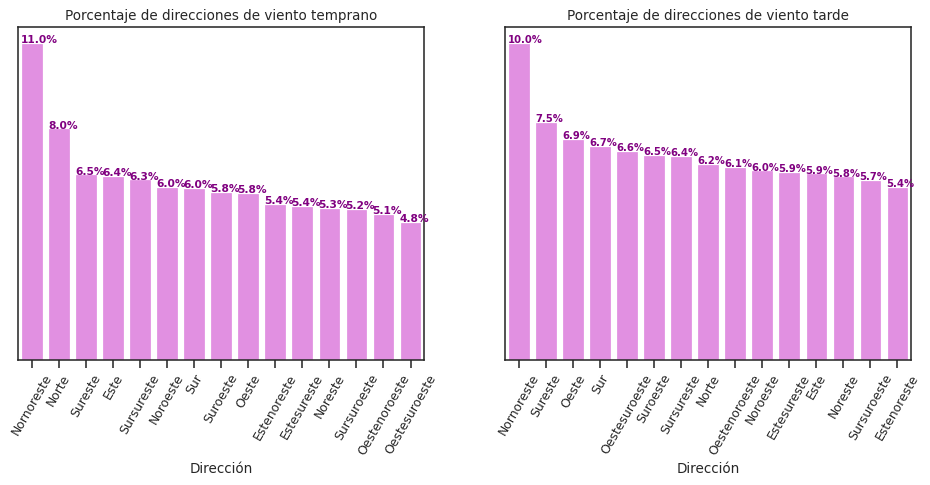

In [ ]:
labels_temprano = direcciones_temprano_df['Porcentaje'].tolist()
labels_tarde = direcciones_tarde_df['Porcentaje'].tolist()
labels1 = direcciones_temprano_df['Direcciones de viento'].to_list()
labels2 = direcciones_tarde_df['Direcciones de viento'].to_list()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=90)

ax1 = sns.barplot(x='Direcciones de viento', y='Porcentaje', data=direcciones_temprano_df, color='violet', ax=axes[0])
axes[0].set_title('Porcentaje de direcciones de viento temprano')
axes[0].set_xlabel('Dirección')
axes[0].set_ylabel('Velocidad (km/h)')
axes[0].set_xticklabels(labels=labels1, rotation=60)
axes[0].get_yaxis().set_visible(False)

for i, v in enumerate(labels_temprano):
    ax1.text(i-.4, v, str(round(v, 1)) + '%', color='purple', fontweight='bold', fontsize=8.5)

ax2 = sns.barplot(x='Direcciones de viento', y='Porcentaje', data=direcciones_tarde_df, color='violet', ax=axes[1])
axes[1].set_title('Porcentaje de direcciones de viento tarde')
axes[1].set_xlabel('Dirección')
axes[1].set_ylabel('Velocidad (km/h)')
axes[1].set_xticklabels(labels=labels2, rotation=60)
axes[1].get_yaxis().set_visible(False)

for i, v in enumerate(labels_tarde):
    ax2.text(i-.4, v, str(round(v, 1)) + '%', color='purple', fontweight='bold', fontsize=8)

plt.show()

En el caso del porcentaje de las direcciones de viento para los registros obtenidos por la mañana, se ve muy marcado el porcentaje que ocupan las direcciones Nornoreste y Norte, luego van decreciendo paulatinamente los porcentajes de las otras direcciones; y en el caso del porcentaje de las direcciones de viento para los registros obtenidos en la tardecita se ve muy marcado el porcentaje que ocupa la dirección Noroeste y luego van decreciendo paulatinamente los porcentajes de las otras direcciones.

El porcentaje de las direcciones de viento de los registros obtenidos en la mañana es: 11% para Nornoreste, 8% para Norte, 6.5% para Sureste, 6.4% para Este, 6.3% para Sursureste, 6% para Noroeste y Sur, 5.8% para Suroeste y Oeste, 5.4% para Estenoreste y Estesureste, 5.3% para Noreste, 5.2% para Sursuroeste, 5.1% para Oestenoroeste y 4.8% para Oestesuroeste.

El porcentaje de las direcciones de viento de los registros obtenidos en la mañana es: 10% para Nornoreste, 7.5% para Sureste, 6.9% para Oeste, 6.7% para Sur, 6.6% para Oestesuroeste, 6.5% para Suroeste, 6.4% para Sursureste, 6.2% para Norte, 6.1% para Oestenoreste, 6% para Noroeste, 5.9% para Estesureste y Este, 5.8% para Noreste, 5.7% para Sursuroeste y 5.4% para Estenoreste.

Un breve análisis de los gráficos es que está muy marcada la diferencia de porcentaje que ocupan las primeras dos direcciones en ambos gráficos respecto de las demás y que el resto de las direcciones van disminuyendo paulatinamente hasta llegar al valor mínimo del porcentaje de la dirección y que el porcentaje que ocupa cada dirección (salvo el porcentaje Nornoreste que está primero) varía en un gráfico y en otro.

### Nubosidad

¿Cuál es el porcentaje de los tipos de nubosidad del cielo?

In [24]:
nubosidad_temprano_df = hamburguesas_values['nubosidad_temprano'].value_counts(normalize=True).to_frame('Porcentaje')
nubosidad_temprano_df.reset_index(inplace=True)
nubosidad_temprano_df.rename(columns={'index':'Tipos de nubosidad'}, inplace=True)

for i in range(len(nubosidad_temprano_df)):
  nubosidad_temprano_df.iloc[i, 1] = nubosidad_temprano_df.iloc[i, 1] * 100

nubosidad_temprano_df.sort_values('Tipos de nubosidad', inplace=True)

In [25]:
nubosidad_tarde_df = hamburguesas_values['nubosidad_tarde'].value_counts(normalize=True).to_frame('Porcentaje')
nubosidad_tarde_df.reset_index(inplace=True)
nubosidad_tarde_df.rename(columns={'index':'Tipos de nubosidad'}, inplace=True)

for i in range(len(nubosidad_tarde_df)):
  nubosidad_tarde_df.iloc[i, 1] = nubosidad_tarde_df.iloc[i, 1] * 100

nubosidad_tarde_df.sort_values('Tipos de nubosidad', inplace=True)

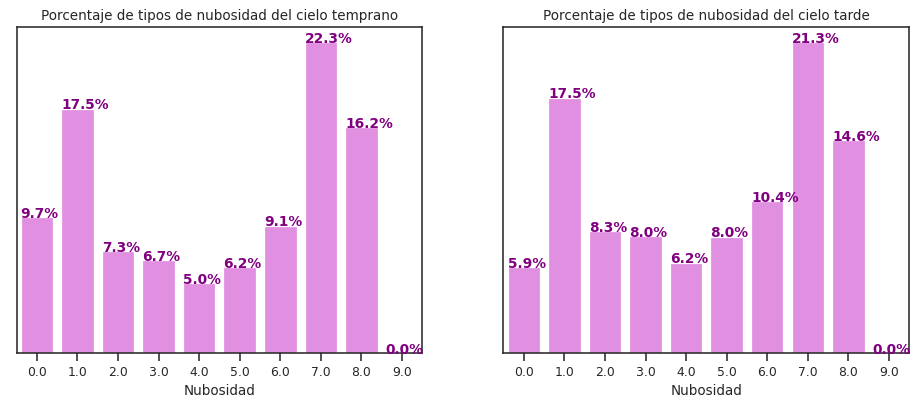

In [26]:
labels_temprano = nubosidad_temprano_df['Porcentaje'].tolist()
labels_tarde = nubosidad_tarde_df['Porcentaje'].tolist()
labels1 = nubosidad_temprano_df['Tipos de nubosidad'].tolist()
labels2 = nubosidad_tarde_df['Tipos de nubosidad'].tolist()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=90)

ax1 = sns.barplot(x="Tipos de nubosidad", y="Porcentaje", data=nubosidad_temprano_df, color='violet', ax=axes[0], order=labels1)
axes[0].set_title('Porcentaje de tipos de nubosidad del cielo temprano')
axes[0].set_xlabel('Nubosidad')
axes[0].get_yaxis().set_visible(False)

for i, v in enumerate(labels_temprano):
    ax1.text(i-.4, v, str(round(v, 1)) + '%', color='purple', fontweight='bold', fontsize=11)

ax2 = sns.barplot(x="Tipos de nubosidad", y="Porcentaje", data=nubosidad_tarde_df, color='violet', ax=axes[1], order=labels2)
axes[1].set_title('Porcentaje de tipos de nubosidad del cielo tarde')
axes[1].set_xlabel('Nubosidad')
axes[1].get_yaxis().set_visible(False)

for i, v in enumerate(labels_tarde):
    ax2.text(i-.4, v, str(round(v, 1)) + '%', color='purple', fontweight='bold', fontsize=11)

plt.show()
#ax = sns.barplot(x='Direcciones de viento', y='Cantidad de registros', data=df, palette=sns.diverging_palette(240, 10, n=15))

Vemos que el porcentaje de los tipos de nubosidad varía si comparamos ambos gráficos.

El porcentaje de los tipos de nubosidad del cielo de los registros obtenidos en la mañana es: 22.3% para 7, 17.5% para 1, 16.2% para 8, 9.7% para 0, 9.1% para 6, 7.3% para 2, 6.7% para 3, 6.2% para 5, 5% para 4 y 0% para 9.

El porcentaje de los tipos de nubosidad del cielo de los registros obtenidos en la tardecita es: 21.3% para 7, 17.5% para 1, 14.6% para 8, 10.4% para 6, 8.3% para 2, 8% para 3 y 5, 6.2% para 4, 5.9% para 0 y 0% para 9.

Un breve análisis de los gráficos es que los tipos de nubosidad del cielo 7, 1, y 8 se mantienen primeros en porcentaje en ambos gráficos pero en el gráfico de los registros obtenidos en la tardecita baja un poco el porcentaje de 7 y 8, pero sube el porcentaje de 6, 2, 3, 5 y 4 y, además, baja mucho el porcentaje de 0.



---



¿Cómo se distribuye la nubosidad?

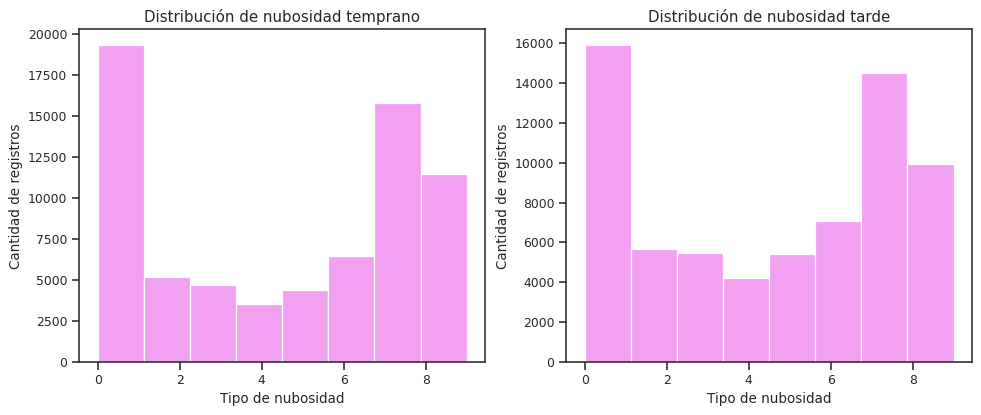

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=90)

ax1 = sns.histplot(x='nubosidad_temprano', data=hamburguesas_values, color='violet', ax=axes[0], bins=8)
axes[0].set_title('Distribución de nubosidad temprano', fontsize=12)
axes[0].set_xlabel("Tipo de nubosidad")
axes[0].set_ylabel("Cantidad de registros")

ax2 = sns.histplot(x='nubosidad_tarde', data=hamburguesas_values, color='violet', ax=axes[1], bins=8)
axes[1].set_title('Distribución de nubosidad tarde', fontsize=12)
axes[1].set_xlabel("Tipo de nubosidad")
axes[1].set_ylabel("Cantidad de registros")

plt.show()

Lo que se puede ver es que baja la cantidad de registros de los días con cielo despejado o con pocas nubes y cubierto o con niebla, pero suben los de cielo con nubes dispersas y nuboso, si comparamos el gráfico de **Rango de nubosidad temprano** y **Rango de nubosidad tarde**.

En el caso de la distribución de nubosidad para los registros obtenidos en la mañana y en la tardecita, vemos que la mayoría de los registros son de días con cielo despejado o con pocas nubes, luego de días con cielo nuboso, después de días con cielo cubierto o con niebla, siguen los días con cielo mayormente despejado y finalmente de días con cielo con nubes dispersas.

Un breve análisis de los gráficos es que las octas de nubosidad que tienen la mayor cantidad de registros en **Distribución de nubosidad temprano** baja en **Distribución de nubosidad tarde**, pero en este último gráfico siguen siendo las octas con mayor cantidad de registros. Esto sucede pues el resto de las octas ganan cantidad de registros, pero no lo suficiente como para pasar a las octas con mayor cantidad de registros.

Ver: 
* https://www.divulgameteo.es/ampliab/5/17/La-cobertura-nubosa.html
* https://www.eoas.ubc.ca/courses/atsc113/flying/met_concepts/01-met_concepts/01c-cloud_coverage/index.html
* https://es.wikipedia.org/wiki/Octa

### Día

¿Cuántas fechas distintas hay?

In [ ]:
len(list(hamburguesas_values['dia'].unique()))

3405

¿Cuál es la fecha más reciente de las registradas? 

In [ ]:
print(hamburguesas_values['dia'].nlargest(1).dt.date.iloc[0].strftime("%Y/%m/%d"))

2017/06/25


¿Cuál es la fecha más antigua de las registradas? 

In [ ]:
print(hamburguesas_values['dia'].nsmallest(1).dt.date.iloc[0].strftime("%Y/%m/%d"))

2007/11/01


¿Cuál es la cantidad de registros por año?

In [ ]:
dic_anios = {}
for i in range(len(hamburguesas_values)):
  anio = hamburguesas_values.iloc[i, 1].year
  dic_anios[anio] = dic_anios.get(anio, 0) + 1
  
lista_anios = list(dic_anios.keys())
lista_cantidad = list(dic_anios.values())
df_aux = pd.DataFrame({'Cantidad de datos':lista_cantidad,
                       'Años':lista_anios})

df_aux.sort_values('Cantidad de datos', ascending=False, inplace=True)

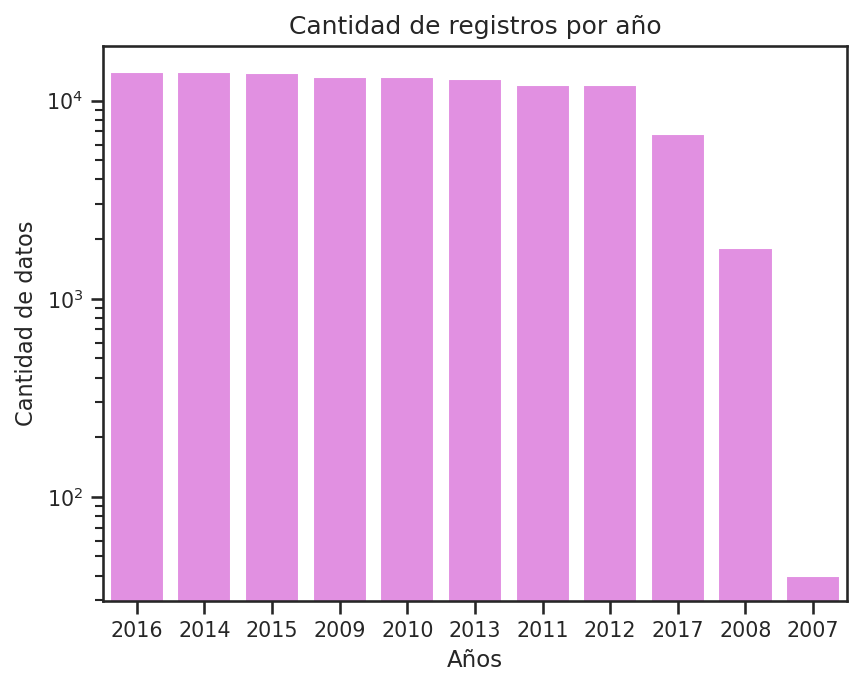

In [ ]:
orden = df_aux['Años'].to_list()
#color = sns.cubehelix_palette(n_colors=11, start=3.0, rot=0.4, gamma=0.9, hue=1.0, light=0.7, dark=0.2, reverse=True, as_cmap=False)
ax = sns.barplot(x='Años', y='Cantidad de datos', data=df_aux, color='violet', order=orden)
ax.set_xlabel("Años", fontsize = 11)
ax.set_yscale("log")
no_texto = ax.set_title('Cantidad de registros por año', fontsize=12)

Se ve que el año que más registros tiene es 2016 y el que menos tiene es 2007.

Lo que se ve es que está muy pareja la cantidad de registros hasta el 2017. A partir de ese año empieza a bajar la cantidad de registros. 

Un breve análisis del gráfico es que cada año tiene una cantidad de registros parecida pero en el año 2017, 2008 y 2007 no se registraron muchos datos respecto de los otros años, por lo que tuvimos que hacer un gráfico de escala logarítmica ya que si no, no se apreciaba ningún registro para el 2007.

### Presión Atmosférica

¿Cuáles son los valores máximos y mínimos de presión atmosférica tanto a la tarde como a la mañana?

In [ ]:
print("Presión atmosférica a la mañana:")
print(f"El valor máximo es: {hamburguesas_values['presion_atmosferica_temprano'].max()}")
print(f"El valor mínimo es: {hamburguesas_values['presion_atmosferica_temprano'].min()}")

Presión atmosférica a la mañana:
El valor máximo es: 1041.0
El valor mínimo es: 982.0


In [ ]:
print("Presión atmosférica a la tarde:")
print(f"El valor máximo es: {hamburguesas_values['presion_atmosferica_tarde'].max()}")
print(f"El valor mínimo es: {hamburguesas_values['presion_atmosferica_tarde'].min()}")

Presión atmosférica a la tarde:
El valor máximo es: 1039.6
El valor mínimo es: 977.1


Analizando esta información podemos ver que el mínimo valor de presión que podemos obtener es de **977.1 hPa** y el máximo es de **1041.1 hPa**



---



¿Cómo se distribuyen los datos de presión atmosférica? ¿Hay valores que se encuentren pocas veces en el dataset?

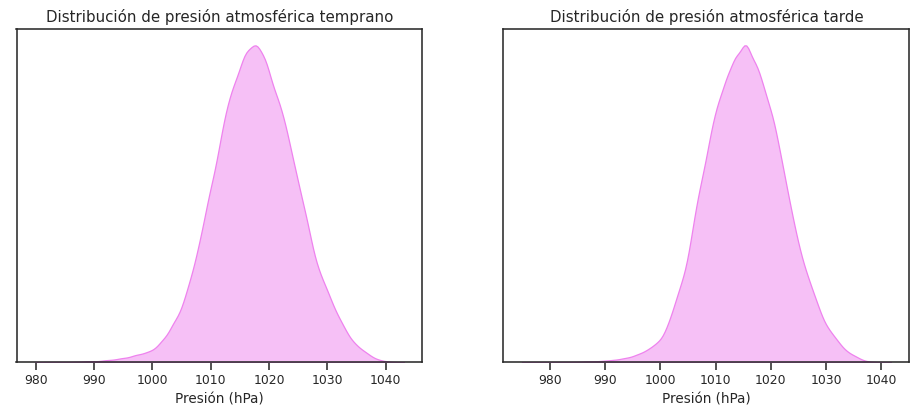

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=90)

ax1 = sns.kdeplot(data=hamburguesas_values, x='presion_atmosferica_temprano', fill=True, color='violet', ax=axes[0], alpha=.5)
axes[0].set_title('Distribución de presión atmosférica temprano', fontsize=12)
axes[0].set_xlabel('Presión (hPa)')
axes[0].get_yaxis().set_visible(False)

ax2 = sns.kdeplot(data=hamburguesas_values, x='presion_atmosferica_tarde', fill=True, color='violet', ax=axes[1], alpha=.5)
axes[1].set_title('Distribución de presión atmosférica tarde', fontsize=12)
axes[1].set_xlabel('Presión (hPa)')
axes[1].get_yaxis().set_visible(False)

plt.show()

Las distribuciones de presión atmosférica a la mañana y a la tarde son parecidas. 

La distribución de presión atmosférica temprano se da entre 990 hPa y 1040 hPa, por lo que algunos valores quedan afuera de este distribución por lo visto anteriormente.

La distribución de presión atmosférica tarde se da entre 990 hPa y un poco menos de 1040 hPa, por lo que algunos valores quedan afuera de este distribución por lo visto anteriormente.

A partir de estos graficos, podemos observar que  solo a la mañana existen presiones mayores a **1040hPa** mientras que solo a la tarde existen presiones menores a **990hPa** 

### Humedad

¿Cuáles son los valores máximos y mínimos de la humedad tanto a la tarde como a la mañana?

In [ ]:
print("Humedad a la mañana:")
print(f"El valor máximo es: {hamburguesas_values['humedad_temprano'].max()}")
print(f"El valor mínimo es: {hamburguesas_values['humedad_temprano'].min()}")

Humedad a la mañana:
El valor máximo es: 100.0
El valor mínimo es: 0.0


In [ ]:
print("Humedad a la tarde:")
print(f"El valor máximo es: {hamburguesas_values['humedad_tarde'].max()}")
print(f"El valor mínimo es: {hamburguesas_values['humedad_tarde'].min()}")

Humedad a la tarde:
El valor máximo es: 100.0
El valor mínimo es: 0.0


Bien, podemos asegurarnos que los valores de humedad estan comprendidos entre **0 y 100** ya que son porcentajes



---



¿Cómo se distribuyen los valores más típicos de humedad tanto a la mañana como a la tarde?

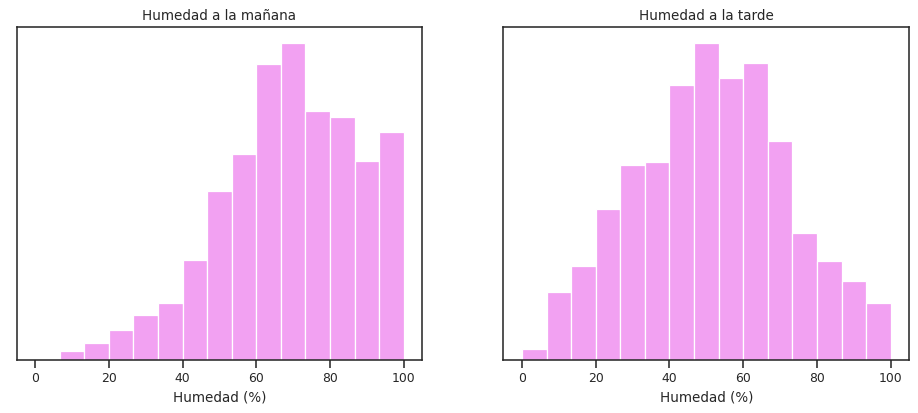

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=90)

sns.histplot(data=hamburguesas_values, x='humedad_temprano', bins=15, color='violet', ax=axes[0])
axes[0].set_title('Humedad a la mañana')
axes[0].get_yaxis().set_visible(False)
axes[0].set_xlabel('Humedad (%)')

sns.histplot(data=hamburguesas_values, x='humedad_tarde', bins=15, color='violet', ax=axes[1])
axes[1].set_title('Humedad a la tarde')
axes[1].get_yaxis().set_visible(False)
axes[1].set_xlabel('Humedad (%)')

plt.show()

Podemos observar que durante la mañana tiende a haber un porcentaje de humedad mucho más alta que durante la tarde. Encontrar humedades dentro del rango de 80% y 100% es muchísimo más común a la mañana que a la tarde. 

Los valores de la humedad se distribuyen a la mañana principalmente entre el 60 al 100% de humedad, mientras que a la tarde se distribuyen entre el 30 y el 70% de humedad.

Un breve análisis de los gráficos es que a la mañana suele haber más humedad que a la tarde.

### Milímetros de lluvia

¿Cuánto es lo máximo que llovio?

In [ ]:
print(f"El valor máximo es: {hamburguesas_values['mm_lluvia_dia'].max()}")

El valor máximo es: 367.6




---



En proporción, ¿Hubo mas días de lluvia?

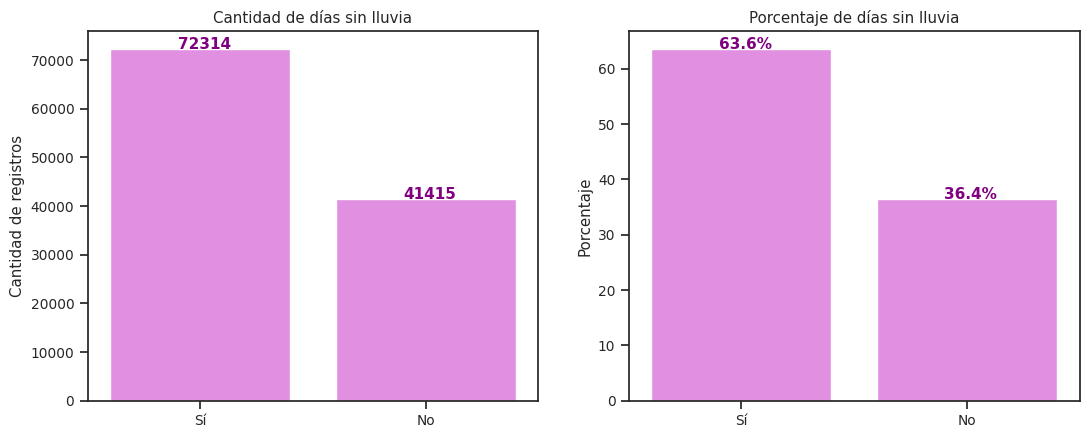

In [ ]:
hamburguesas_values_no_cayeron_mm = hamburguesas_values['mm_lluvia_dia'] == 0
labels = ['Sí', 'No']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

serie1 = hamburguesas_values_no_cayeron_mm.value_counts()
ax1 = sns.barplot(x=labels,y=list(serie1.values), color='violet', ax=axes[0])
axes[0].set_title("Cantidad de días sin lluvia")
axes[0].set_ylabel("Cantidad de registros")
axes[0].tick_params(labelrotation=0)

for i, v in enumerate(list(serie1.values)):
    ax1.text(i-.1, v, str(v), color='purple', fontweight='bold', fontsize=11)

serie2 = hamburguesas_values_no_cayeron_mm.value_counts().div(hamburguesas_values_no_cayeron_mm.pipe(len)).mul(100)
ax2 = sns.barplot(x=labels,y=list(serie2.values), color='violet', ax=axes[1])
axes[1].set_title("Porcentaje de días sin lluvia")
axes[1].set_ylabel("Porcentaje")
axes[1].tick_params(labelrotation=0)

for i, v in enumerate(list(serie2.values)):
    ax2.text(i-.1, v, str(round(v, 1)) + '%', color='purple', fontweight='bold', fontsize=11)

plt.show()

Podemos ver observar que segun nuestras mediciones es mucho más común que no llueva.

En proporción, hubieron menos días de lluvia. Solo un 36.4% de nuestros registros.

Un breve análisis de los gráficos es que se ve claramente que tanto el porcentaje de días sin lluvia como la cantidad de registros que tenemos, muestran que hubieron más días sin lluvia que días con lluvia.



---



Segun [AMET](http://www.aemet.es/es/eltiempo/prediccion/provincias/ayuda) podemos clasificar las lluvias en 5 grupos:
*   Débiles	≤ 2mm
*   Moderadas	> 2mm y ≤ 15mm
*   Fuertes	> 15mm y ≤ 30mm
*   Muy fuertes	> 30mm y ≤ 60mm
*   Torrenciales > 60mm

Segun estas clasificaciones, ¿Cómo estan distribuidas las lluvias en nuestro dataset?

In [ ]:
df_dias_con_lluvia = hamburguesas_values[hamburguesas_values['mm_lluvia_dia'] > 0]['mm_lluvia_dia']

min_value = df_dias_con_lluvia.min()
max_value = df_dias_con_lluvia.max()

bins=[min_value, 2, 15, 30, 60, max_value]
labels=['Débiles', 'Moderadas', 'Fuertes', 'Muy Fuertes', 'Torrenciales']

lst = df_dias_con_lluvia.tolist()
df_clasificacion_lluvias = pd.cut(lst, bins=bins, include_lowest=True, labels=labels).value_counts().to_frame()

df_clasificacion_lluvias_aux = df_clasificacion_lluvias.copy()
df_clasificacion_lluvias_aux.reset_index(inplace=True)
df_clasificacion_lluvias_aux.rename(columns={'index':'Clasificacion', 0: 'Cantidad ocurrencias'}, inplace=True)

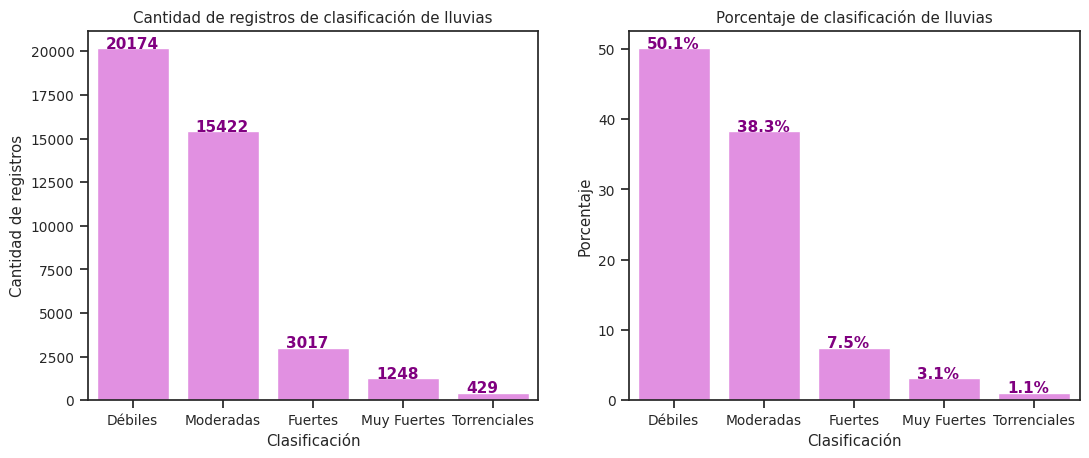

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

serie1 = df_clasificacion_lluvias[0]
ax1 = sns.barplot(x=list(serie1.index), y=list(serie1.values), ax=axes[0], color='violet')
axes[0].set_title("Cantidad de registros de clasificación de lluvias")
axes[0].set_ylabel("Cantidad de registros")
axes[0].tick_params(labelrotation=0)
axes[0].set_xlabel("Clasificación")

for i, v in enumerate(list(serie1.values)):
    ax1.text(i-.3, v, str(v), color='purple', fontweight='bold', fontsize=11)

serie2 = df_clasificacion_lluvias[0].div(df_clasificacion_lluvias[0].pipe(sum)).mul(100)
ax2 = sns.barplot(x=list(serie2.index), y=list(serie2.values), ax=axes[1], color='violet')
axes[1].set_title("Porcentaje de clasificación de lluvias")
axes[1].set_ylabel("Porcentaje")
axes[1].tick_params(labelrotation=0)
axes[1].set_xlabel("Clasificación")

for i, v in enumerate(list(serie2.values)):
    ax2.text(i-.3, v, str(round(v, 1)) + '%', color='purple', fontweight='bold', fontsize=11)

plt.show()

Se ve que en nuestros registros predominan las lluvias que estan clasificadas como "Débiles". En el otro extremo tenemos las "Torrenciales" que a pesar de ser bastante extrañas, en nuestros registros pudimos encontrar algunas.

Las lluvias están distribuidas en su mayoría como débiles, luego le siguen las moderadas, después le siguen las fuertes, más tarde le siguen las muy fuertes y finalmente le siguen las torrenciales.

Un breve análisis de los gráficos puede ser que la mayor cantidad de registros que tenemos indican que lo más probable es que llueva débil o moderadamente y lo menos probable es que llueva fuerte, muy fuerte o torrencialmente.

## Milímetros evaporados de agua

¿Cuánto es lo máximo y mínimo evaporado?

In [ ]:
print(f"El valor máximo es: {hamburguesas_values['mm_evaporados_agua'].max()}")
print(f"El valor mínimo es: {hamburguesas_values['mm_evaporados_agua'].min()}")

El valor máximo es: 86.2
El valor mínimo es: 0.0




---



¿Cuándo y cuáles fueron las mayores evaporaciones de agua?

In [ ]:
hamburguesas_values_dia_mm_evaporados_agua_max = hamburguesas_values[['mm_evaporados_agua', 'dia']]
top_10_fechas = hamburguesas_values_dia_mm_evaporados_agua_max.nlargest(10, columns='mm_evaporados_agua')
top_10_fechas.rename(columns={'mm_evaporados_agua':'10 días en los que mas se evaporo agua', 'dia':'Fecha'}, inplace=True)

top_10_fechas['Fecha'] = top_10_fechas.Fecha.dt.date
top_10_fechas = top_10_fechas.set_index('Fecha')

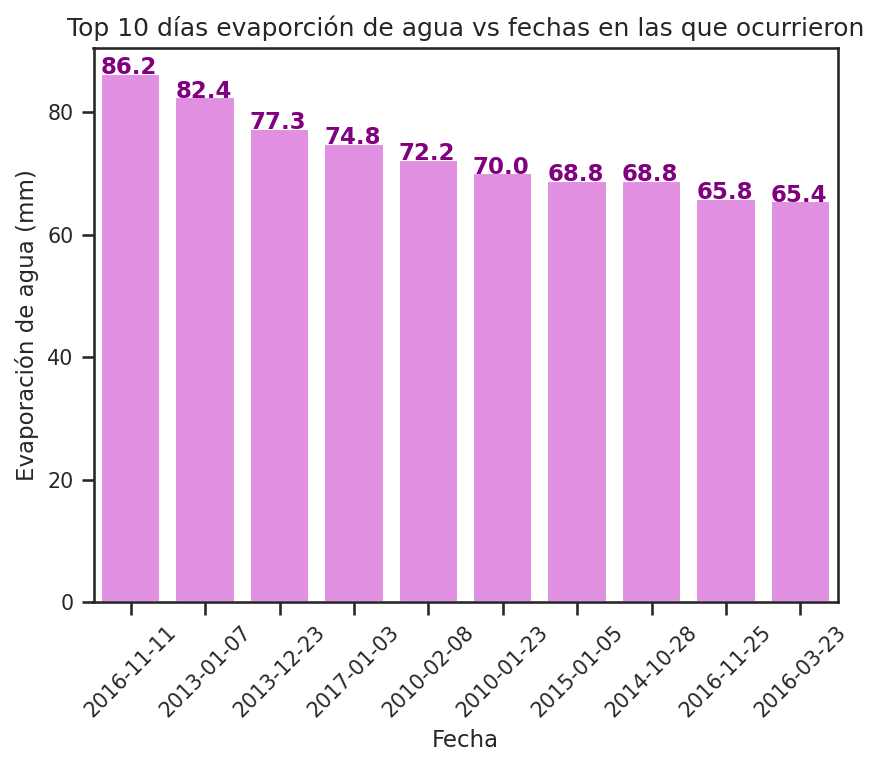

In [ ]:
labels = top_10_fechas['10 días en los que mas se evaporo agua'].tolist()
labels1 = list(top_10_fechas.index)
ax = sns.barplot(x=labels1, y=labels, color='violet')

for i, v in enumerate(labels):
    ax.text(i-.4, v, str(v), color='purple', fontweight='bold', fontsize=11)

ax.set_xlabel("Fecha", fontsize = 11)
ax.set_xticklabels(labels=labels1, rotation=45)
ax.set_ylabel("Evaporación de agua (mm)", fontsize = 11)
no_texto = ax.set_title('Top 10 días evaporción de agua vs fechas en las que ocurrieron', fontsize=12)

Los meses en los que hubo más evaporación de agua fueron desde octubre hasta marzo.

Las fechas en donde hubo mayor evaporación de agua fueron: 2016-11-11, 2013-01-07, 2013-12-23, 2017-01-03, 2010-02-08, 2010-01-23, 2015-01-05, 2014-10-28, 2016-11-25y 2016-03-23.

Las mayores evaporaciones de agua fueron de: 86.2, 82.4, 77.3, 74.8, 72.2, 70, 68.8, 65.8 y 65.4 mm.

Un breve análisis del gráfico es que los meses donde más se evaporó agua tiene que ver con los meses en donde hace más calor y hay mayor radiación UV.



---



¿En cuántas ocasiones se evaporo agua?

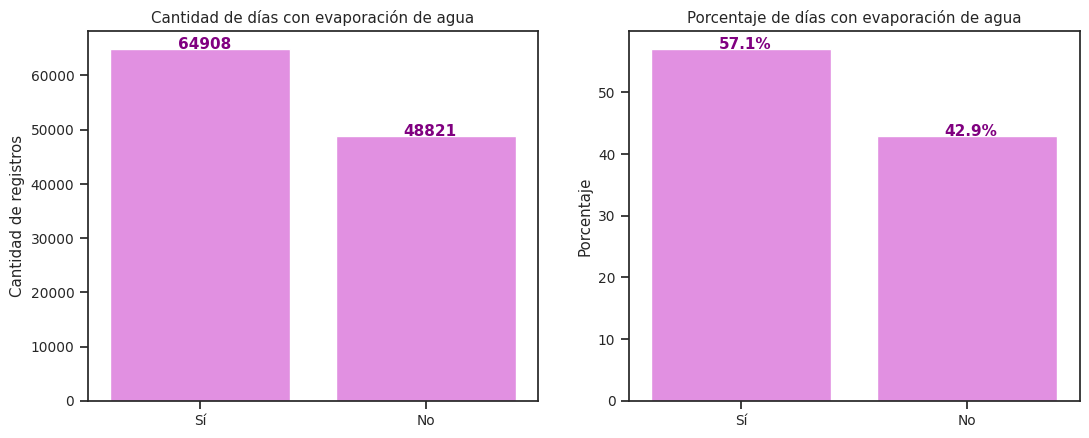

In [ ]:
hamburguesas_values_se_evaporo_agua = hamburguesas_values['mm_evaporados_agua'] > 0
labels = ['Sí', 'No']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

serie1 = hamburguesas_values_se_evaporo_agua.value_counts()
ax1 = sns.barplot(x=labels,y=list(serie1.values), color='violet', ax=axes[0])
axes[0].set_title("Cantidad de días con evaporación de agua")
axes[0].set_ylabel("Cantidad de registros")
axes[0].tick_params(labelrotation=0)

for i, v in enumerate(list(serie1.values)):
    ax1.text(i-.1, v, str(v), color='purple', fontweight='bold', fontsize=11)

serie2 = hamburguesas_values_se_evaporo_agua.value_counts().div(hamburguesas_values_se_evaporo_agua.pipe(len)).mul(100)
ax2 = sns.barplot(x=labels,y=list(serie2.values), color='violet', ax=axes[1])
axes[1].set_title("Porcentaje de días con evaporación de agua")
axes[1].set_ylabel("Porcentaje")
axes[1].tick_params(labelrotation=0)

for i, v in enumerate(list(serie2.values)):
    ax2.text(i-.1, v, str(round(v, 1)) + '%', color='purple', fontweight='bold', fontsize=11)

plt.show()

Aquí pudimos observar que según nuestros registros hubieron más días con evaporación de agua.

Se evaporó el agua en 64904 ocasiones, un 42.9% de los registros totales.

Un breve análisis de los gráficos es que se ve claramente que tanto el porcentaje de días con evaporación de agua como la cantidad de registros que tenemos, muestran que hubieron más días en los que el agua se evaporó que días sin evaporación de agua.



---



¿Cómo se distribuyen los valores de milímetros evaporados de agua en intervalos de 10 mm?

Text(0.5, 0, 'Milímetros evaporados de agua')

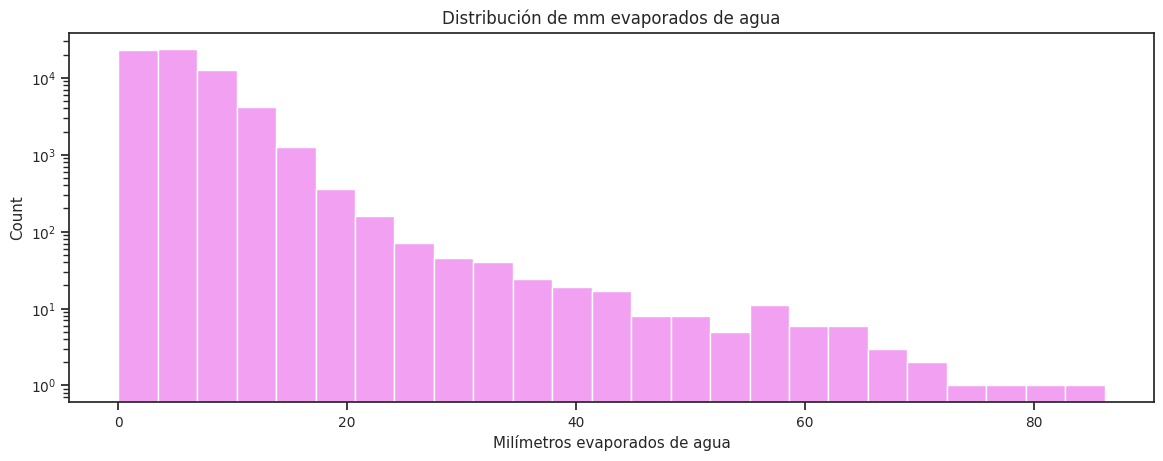

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[7 * 2, 4.8], dpi=100)

ax = sns.histplot(data=hamburguesas_values, x='mm_evaporados_agua', color='violet', bins=25)
ax.set_yscale("log")
ax.set_title('Distribución de mm evaporados de agua', fontsize=12)
ax.set_xlabel('Milímetros evaporados de agua')

Vemos que lo más probable es que se evapore poca agua y lo menos probable es que se evapore mucha agua. Los valores mas comunes de evaporación se encuentran entre los valores que van desde 0 a 20mm

## Llovieron hamburguesas hoy

¿En cuántas ocasiones llovieron hamburguesas el día de la medición?

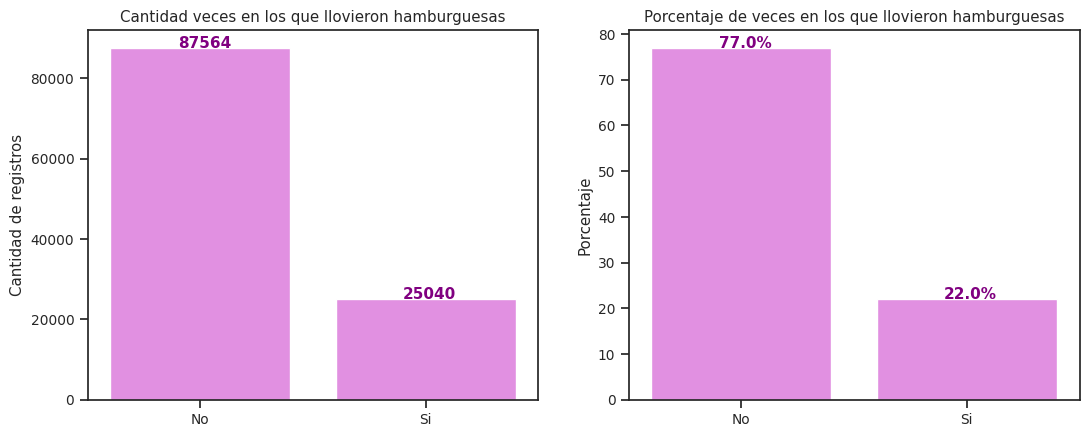

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

serie1 = hamburguesas_values['llovieron_hamburguesas_hoy'].value_counts()
ax1 = sns.barplot(x=list(serie1.index),y=list(serie1.values), color='violet', ax=axes[0])
axes[0].set_title("Cantidad veces en los que llovieron hamburguesas")
axes[0].set_ylabel("Cantidad de registros")
axes[0].tick_params(labelrotation=0)

for i, v in enumerate(list(serie1.values)):
    ax1.text(i-.1, v, str(v), color='purple', fontweight='bold', fontsize=11)

serie2 = hamburguesas_values['llovieron_hamburguesas_hoy'].value_counts().div(hamburguesas_values['llovieron_hamburguesas_hoy'].pipe(len)).mul(100)
ax2 = sns.barplot(x=list(serie1.index),y=list(serie2.values), color='violet', ax=axes[1])
axes[1].set_title("Porcentaje de veces en los que llovieron hamburguesas")
axes[1].set_ylabel("Porcentaje")
axes[1].tick_params(labelrotation=0)

for i, v in enumerate(list(serie2.values)):
    ax2.text(i-.1, v, str(round(v, 1)) + '%', color='purple', fontweight='bold', fontsize=11)

plt.show()

Aquí pudimos observar que según nuestros registros hubieron más días sin lluvia de hamburguesas.

Llovieron hamburguesas el día de la medición 25040 veces, un 22% de los registros totales.

Un breve análisis de los gráficos es que se ve claramente que tanto el porcentaje de días en los que llovieron hamburguesas el día de la medición como la cantidad de registros que tenemos, muestran que hubieron más días en los que no llovieron hamburguesas que días con lluvia de hamburguesas.

# Relaciones entre features

Separamos el dataset en dos ya que estas dos partes posiblemente las reutilicemos en varias secciones. Un dataset contiene las mediciones en las que se registro lluvia de hamburguesas al día siguiente y el otro no.

In [ ]:
df_llovieron_hamburguesas_al_dia_siguiente = hamburguesas_values[hamburguesas_values.llovieron_hamburguesas_al_dia_siguiente == 'Si']
df_no_llovieron_hamburguesas_al_dia_siguiente = hamburguesas_values[hamburguesas_values.llovieron_hamburguesas_al_dia_siguiente == 'No']

In [ ]:
registros_totales = len(hamburguesas_values)

## Presión atmosférica vs Lluvia de hamburguesas al día siguiente

Para las mediciones durante la mañana ¿Cuáles fueron los valores de presión en los que en proporción se midio más lluvia de hamburguesas al día siguiente?

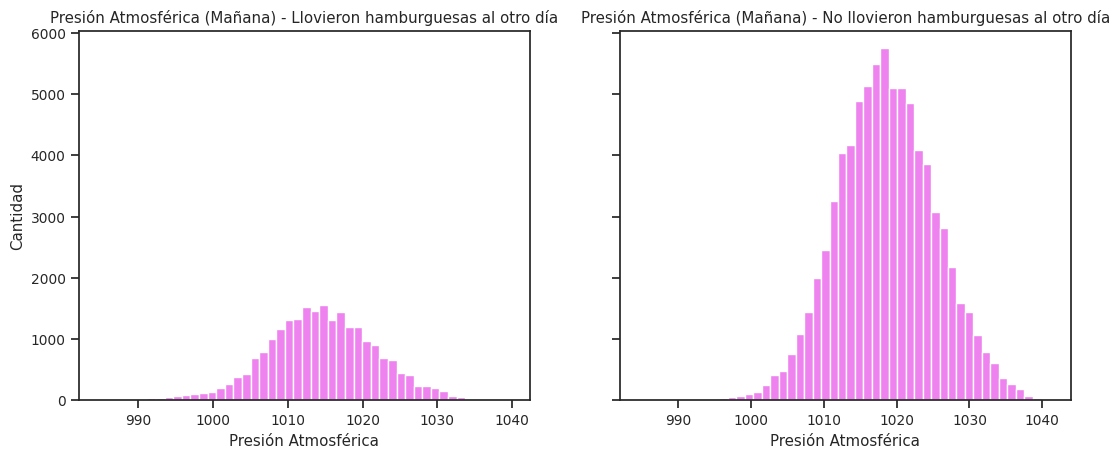

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100, sharey=True)

df_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_temprano.plot(
    kind='hist', ax=axes[0], xlim=hamburguesas_values.presion_atmosferica_temprano.min(), bins=50, color='violet'
)
axes[0].set_title("Presión Atmosférica (Mañana) - Llovieron hamburguesas al otro día")
axes[0].set_ylabel("Cantidad")
axes[0].set_xlabel("Presión Atmosférica")

df_no_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_temprano.plot(
    kind='hist', ax=axes[1], xlim=hamburguesas_values.presion_atmosferica_temprano.min(), bins=50, color='violet'
)
axes[1].set_title("Presión Atmosférica (Mañana) - No llovieron hamburguesas al otro día")
axes[1].set_ylabel("Cantidad")
axes[1].set_xlabel("Presión Atmosférica")

plt.show()

En el centro del histograma es evidente que mucho mas frecuente que no llueva hamburguesas, pero hagamos "zoom" en los extremos.
Sabemos por el análisis hecho sobre las presiones que nuestro mínimo y máximo valor eran 977.1hPa y 1041hPa respectivamente.

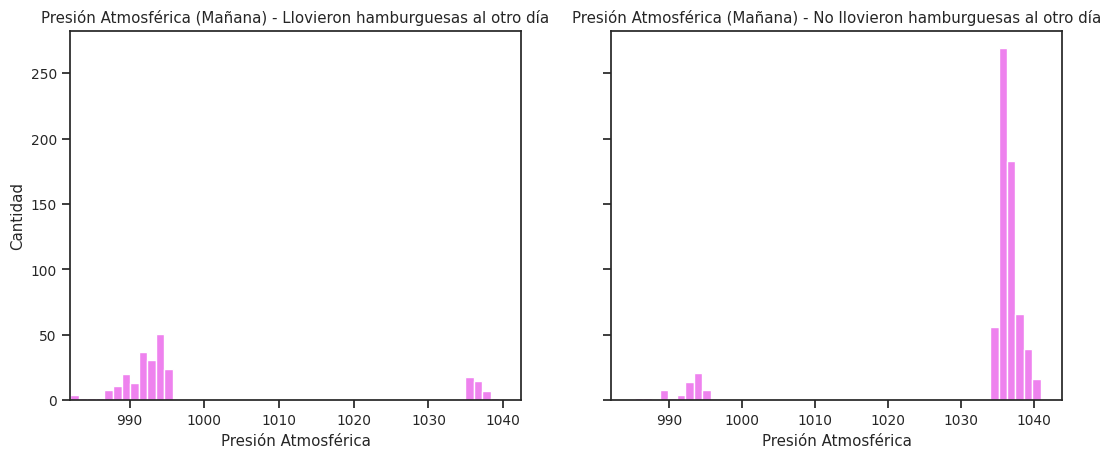

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100, sharey=True)

df_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_temprano[
  (df_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_temprano <= 995) |
  (df_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_temprano >= 1035)
].plot(
    kind='hist', ax=axes[0], xlim=hamburguesas_values.presion_atmosferica_temprano.min(), bins=50, color='violet'
)
axes[0].set_title("Presión Atmosférica (Mañana) - Llovieron hamburguesas al otro día")
axes[0].set_ylabel("Cantidad")
axes[0].set_xlabel("Presión Atmosférica")

df_no_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_temprano[
  (df_no_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_temprano <= 995) |
  (df_no_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_temprano >= 1035)
].plot(
    kind='hist', ax=axes[1], xlim=hamburguesas_values.presion_atmosferica_temprano.min(), bins=50, color='violet'
)
axes[1].set_title("Presión Atmosférica (Mañana) - No llovieron hamburguesas al otro día")
axes[1].set_ylabel("Cantidad")
axes[1].set_xlabel("Presión Atmosférica")

plt.show()

In [ ]:
si_llueve = len(df_llovieron_hamburguesas_al_dia_siguiente[
  df_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_temprano <= 995
])

no_llueve = len(df_no_llovieron_hamburguesas_al_dia_siguiente[
  df_no_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_temprano <= 995
])

porc_llueve = (si_llueve/(si_llueve + no_llueve)) * 100
porc_no_llueve = (no_llueve/(si_llueve + no_llueve)) * 100
laplace = (si_llueve/registros_totales) * 100

print(f"La proporción de casos que llueve es {porc_llueve}%.")
print(f"La proporción de casos que no llueve es {porc_no_llueve}%.")
print(f"La cantidad de casos que llueve (que tiene presión menor a 995 hPa) sobre el total es {laplace}%.")

La proporción de casos que llueve es 76.2081784386617%.
La proporción de casos que no llueve es 23.79182156133829%.
La cantidad de casos que llueve (que tiene presión menor a 995 hPa) sobre el total es 0.18025305770735695%.


Podemos observar que para presiones menores a *995 hPa* es más probable que sí lluevan hamburguesas al día siguiente **ya que la proporcion de casos que sí llueve es 76.21% y de que no llueve es 23.79%, la cantidad de casos sobre el total que tiene presión menor a 995 hPa es 0.18%**, mientras que para presiones mayores a 1035 hPa es casi seguro que **no van a llover hamburguesas al día siguiente**.



---



Para las mediciones durante la tarde ¿Cuáles fueron los valores de presión en los que en proporción se midio más lluvia de hamburguesas al día siguiente?

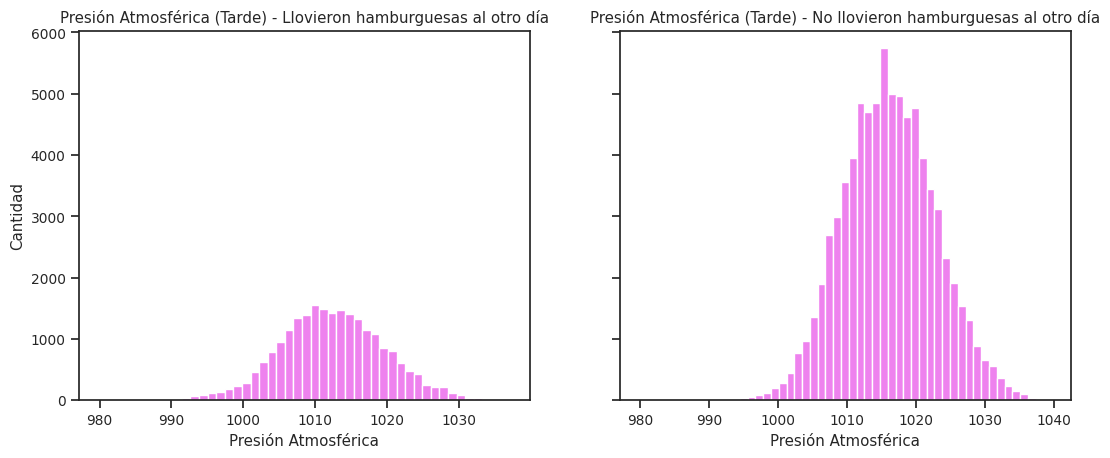

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100, sharey=True)

df_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_tarde.plot(
    kind='hist', ax=axes[0], xlim=hamburguesas_values.presion_atmosferica_tarde.min(), bins=50, color='violet'
)
axes[0].set_title("Presión Atmosférica (Tarde) - Llovieron hamburguesas al otro día")
axes[0].set_ylabel("Cantidad")
axes[0].set_xlabel("Presión Atmosférica")

df_no_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_tarde.plot(
    kind='hist', ax=axes[1], xlim=hamburguesas_values.presion_atmosferica_tarde.min(), bins=50, color='violet'
)
axes[1].set_title("Presión Atmosférica (Tarde) - No llovieron hamburguesas al otro día")
axes[1].set_ylabel("Cantidad")
axes[1].set_xlabel("Presión Atmosférica")

plt.show()

Repitamos el paso que hicimos para el caso anterior de mirar los extremos, ya que el centro del histograma es claro diciendo que no hay lluvia de hamburguesas en esas presiones

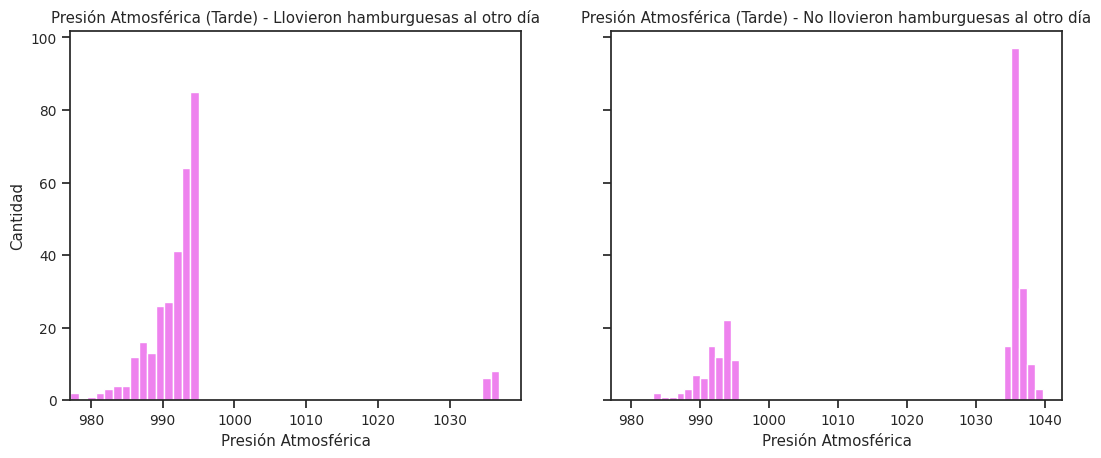

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100, sharey=True)

df_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_tarde[
  (df_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_tarde <= 995) |
  (df_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_tarde >= 1035)
].plot(
    kind='hist', ax=axes[0], xlim=hamburguesas_values.presion_atmosferica_tarde.min(), bins=50, color='violet'
)
axes[0].set_title("Presión Atmosférica (Tarde) - Llovieron hamburguesas al otro día")
axes[0].set_ylabel("Cantidad")
axes[0].set_xlabel("Presión Atmosférica")

df_no_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_tarde[
  (df_no_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_tarde <= 995) |
  (df_no_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_tarde >= 1035)
].plot(
    kind='hist', ax=axes[1], xlim=hamburguesas_values.presion_atmosferica_tarde.min(), bins=50, color='violet'
)
axes[1].set_title("Presión Atmosférica (Tarde) - No llovieron hamburguesas al otro día")
axes[1].set_ylabel("Cantidad")
axes[1].set_xlabel("Presión Atmosférica")

plt.show()

In [ ]:
si_llueve = len(df_llovieron_hamburguesas_al_dia_siguiente[
  df_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_tarde <= 995
])

no_llueve = len(df_no_llovieron_hamburguesas_al_dia_siguiente[
  df_no_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_tarde <= 995
])

porc_llueve = (si_llueve/(si_llueve + no_llueve)) * 100
porc_no_llueve = (no_llueve/(si_llueve + no_llueve)) * 100
laplace = (si_llueve/registros_totales) * 100

print(f"La proporción de casos que llueve es {porc_llueve}%.")
print(f"La proporción de casos que no llueve es {porc_no_llueve}%.")
print(f"La cantidad de casos que llueve (que tiene presión menor a 995 hPa) sobre el total es {laplace}%.")

La proporción de casos que llueve es 78.53403141361257%.
La proporción de casos que no llueve es 21.465968586387437%.
La cantidad de casos que llueve (que tiene presión menor a 995 hPa) sobre el total es 0.26378496249857114%.


Podemos observar que para presiones menores a *995 hPa* es más probable que sí lluevan hamburguesas al día siguiente **ya que la proporcion de casos que sí llueve es 78.53% y de que no llueve es 21.47%, la cantidad de casos sobre el total que tiene presión menor a 995 hPa es 0.26%**, mientras que para presiones mayores a 1035 hPa es casi seguro que **no van a llover hamburguesas al día siguiente**.

En conclusión:
*   Durante la mañana, para presiones menores a 995 hPa es probable que haya una lluvia de hamburguesas al otro día.
*   Durante la tarde, para presiones menores a 995 hPa es muy probable que haya una lluvia de hamburguesas al otro día.

## Humedad vs Lluvia de hamburguesas al día siguiente

Para las mediciones durante la mañana ¿Cuáles fueron los valores de humedad en los que en proporción se midio más lluvia de hamburguesas al día siguiente?

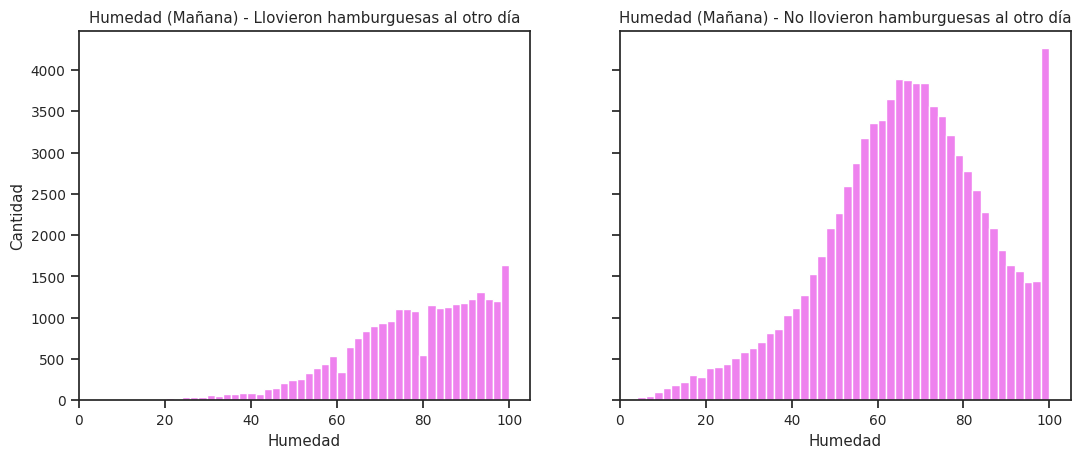

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100, sharey=True)

df_llovieron_hamburguesas_al_dia_siguiente.humedad_temprano.plot(
    kind='hist', ax=axes[0], xlim=hamburguesas_values.humedad_temprano.min(), bins=50, color='violet'
)
axes[0].set_title("Humedad (Mañana) - Llovieron hamburguesas al otro día")
axes[0].set_ylabel("Cantidad")
axes[0].set_xlabel("Humedad")

df_no_llovieron_hamburguesas_al_dia_siguiente.humedad_temprano.plot(
    kind='hist', ax=axes[1], xlim=hamburguesas_values.humedad_temprano.min(), bins=50, color='violet'
)
axes[1].set_title("Humedad (Mañana) - No llovieron hamburguesas al otro día")
axes[1].set_ylabel("Cantidad")
axes[1].set_xlabel("Humedad")

plt.show()

Los graficos revelan que durante la mañana para cualquier valor de humedad es mucho mas probable que no lluevan hamburguesas al otro día



---



Para las mediciones durante la tarde ¿Cuáles fueron los valores de humedad en los que en proporción se midio más lluvia de hamburguesas al día siguiente?

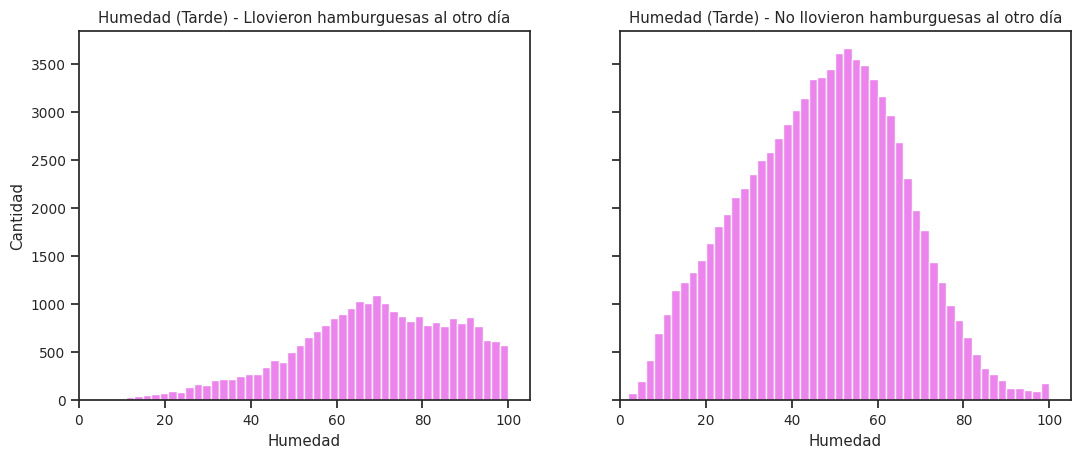

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100, sharey=True)

df_llovieron_hamburguesas_al_dia_siguiente.humedad_tarde.plot(
    kind='hist', ax=axes[0], xlim=hamburguesas_values.humedad_tarde.min(), bins=50, color='violet'
)
axes[0].set_title("Humedad (Tarde) - Llovieron hamburguesas al otro día")
axes[0].set_ylabel("Cantidad")
axes[0].set_xlabel("Humedad")

df_no_llovieron_hamburguesas_al_dia_siguiente.humedad_tarde.plot(
    kind='hist', ax=axes[1], xlim=hamburguesas_values.humedad_tarde.min(), bins=50, color='violet'
)
axes[1].set_title("Humedad (Tarde) - No llovieron hamburguesas al otro día")
axes[1].set_ylabel("Cantidad")
axes[1].set_xlabel("Humedad")

plt.show()

Aqui podemos observar algo interesante. Cuando la humedad es mayor al 82%, podemos ver que hay una considerable diferencia en las mediciones que indican una lluvia de hamburguesas al otro día respecto de las que no.

Hagamos "zoom" para humedades mayores al 82%

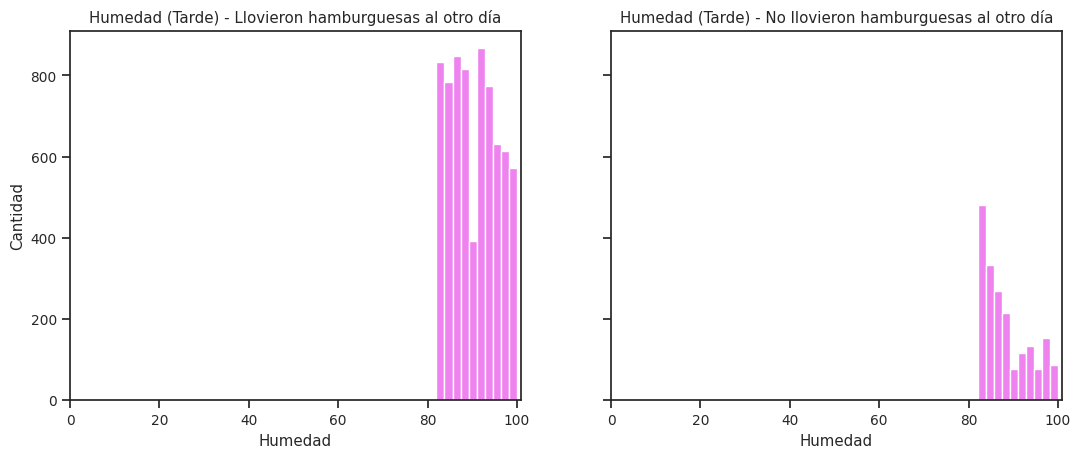

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100, sharey=True)

df_llovieron_hamburguesas_al_dia_siguiente.humedad_tarde[
  df_llovieron_hamburguesas_al_dia_siguiente.humedad_tarde >= 82                                                         
].plot(
    kind='hist', ax=axes[0], xlim=hamburguesas_values.humedad_tarde.min(), bins=10, color='violet'
)
axes[0].set_title("Humedad (Tarde) - Llovieron hamburguesas al otro día")
axes[0].set_ylabel("Cantidad")
axes[0].set_xlabel("Humedad")

df_no_llovieron_hamburguesas_al_dia_siguiente.humedad_tarde[
  df_no_llovieron_hamburguesas_al_dia_siguiente.humedad_tarde >= 82                                                           
].plot(
    kind='hist', ax=axes[1], xlim=hamburguesas_values.humedad_tarde.min(), bins=10, color='violet'
)
axes[1].set_title("Humedad (Tarde) - No llovieron hamburguesas al otro día")
axes[1].set_ylabel("Cantidad")
axes[1].set_xlabel("Humedad")

plt.show()

In [ ]:
si_llueve = len(df_llovieron_hamburguesas_al_dia_siguiente[
  df_llovieron_hamburguesas_al_dia_siguiente.humedad_tarde >= 82
])

no_llueve = len(df_no_llovieron_hamburguesas_al_dia_siguiente[
  df_no_llovieron_hamburguesas_al_dia_siguiente.humedad_tarde >= 82
])

porc_llueve = (si_llueve/(si_llueve + no_llueve)) * 100
porc_no_llueve = (no_llueve/(si_llueve + no_llueve)) * 100
laplace = (si_llueve/registros_totales) * 100

print(f"La proporción de casos que llueve es {porc_llueve}%.")
print(f"La proporción de casos que no llueve es {porc_no_llueve}%.")
print(f"La cantidad de casos que llueve (que tiene porcentaje de humedad mayor al 82%) sobre el total es {laplace}%.")

La proporción de casos que llueve es 78.60921313643377%.
La proporción de casos que no llueve es 21.390786863566234%.
La cantidad de casos que llueve (que tiene porcentaje de humedad mayor al 82%) sobre el total es 6.271927125007694%.


Podemos observar que para los porcentajes de humedad durante la tarde mayores al *82%* es más probable que sí lluevan hamburguesas al día siguiente **ya que la proporcion de casos que sí llueve es 78.61% y de que no llueve es 21.39%, la cantidad de casos sobre el total que tiene porcentaje de humedad mayor al 82% es 6.27%**, mientras que para porcentajes de humedad menores al 82% es casi seguro que **no van a llover hamburguesas al día siguiente**.

En conclusión:
*   Las mediciones de la humedad durante la mañana no nos ayudan a predecir la variable target.
*   Si durante la tarde se midieron humedades mayores al 82% es muy probable que haya una lluvia de hamburguesas al otro día.

## Milímetros de lluvia vs Lluvia de hamburguesas al día siguiente

¿Cuando llueve x cantidad de milímetros implica una lluvia de hamburguesas al día siguiente?

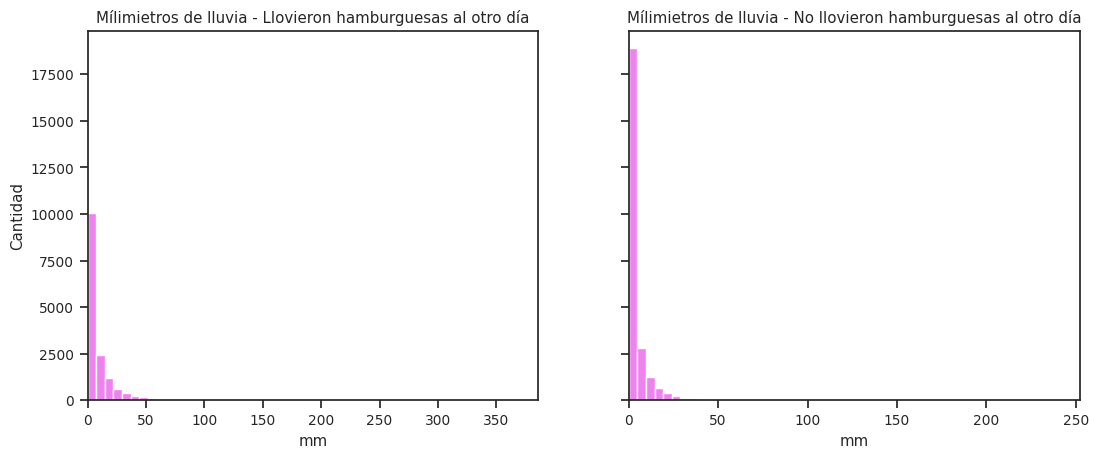

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100, sharey=True)

df_llovieron_hamburguesas_al_dia_siguiente.mm_lluvia_dia[
 df_llovieron_hamburguesas_al_dia_siguiente.mm_lluvia_dia > 0                                                        
].plot(
    kind='hist', ax=axes[0], xlim=hamburguesas_values.mm_lluvia_dia.min(), bins=50, color='violet'
)
axes[0].set_title("Mílimietros de lluvia - Llovieron hamburguesas al otro día")
axes[0].set_ylabel("Cantidad")
axes[0].set_xlabel("mm")

df_no_llovieron_hamburguesas_al_dia_siguiente.mm_lluvia_dia[
 df_no_llovieron_hamburguesas_al_dia_siguiente.mm_lluvia_dia > 0                                                        
].plot(
    kind='hist', ax=axes[1], xlim=hamburguesas_values.mm_lluvia_dia.min(), bins=50, color='violet'
)
axes[1].set_title("Mílimietros de lluvia - No llovieron hamburguesas al otro día")
axes[1].set_ylabel("Cantidad")
axes[1].set_xlabel("mm")

plt.show()

Para lluvias muy pequeñas, es mas difícil que al día siguiente llueva hamburguesas, pero miremos para lluvias mayores a 40mm.

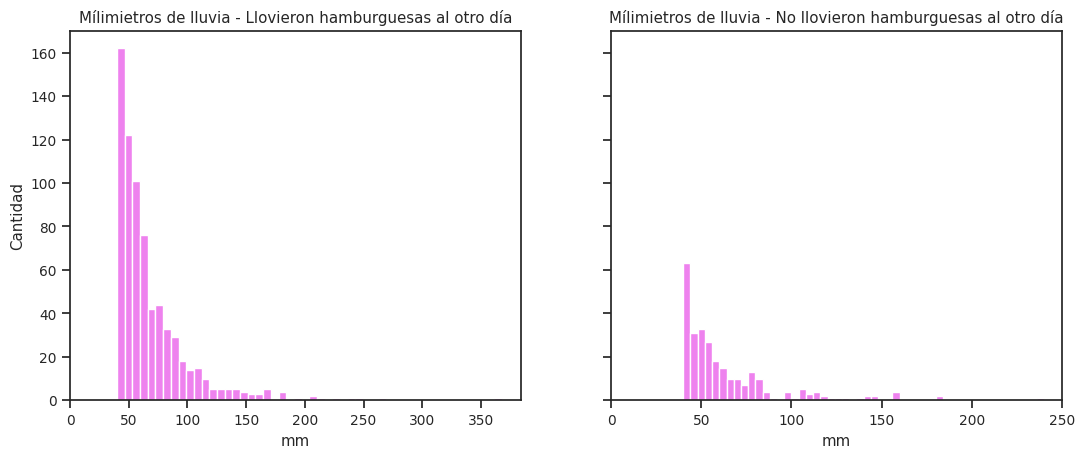

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100, sharey=True)

df_llovieron_hamburguesas_al_dia_siguiente.mm_lluvia_dia[
 df_llovieron_hamburguesas_al_dia_siguiente.mm_lluvia_dia >= 40                                                        
].plot(
    kind='hist', ax=axes[0], xlim=0, bins=50, color='violet'
)
axes[0].set_title("Mílimietros de lluvia - Llovieron hamburguesas al otro día")
axes[0].set_ylabel("Cantidad")
axes[0].set_xlabel("mm")

df_no_llovieron_hamburguesas_al_dia_siguiente.mm_lluvia_dia[
 df_no_llovieron_hamburguesas_al_dia_siguiente.mm_lluvia_dia >= 40                                                        
].plot(
    kind='hist', ax=axes[1], xlim=0, bins=50, color='violet'
)
axes[1].set_title("Mílimietros de lluvia - No llovieron hamburguesas al otro día")
axes[1].set_ylabel("Cantidad")
axes[1].set_xlabel("mm")

plt.show()

In [ ]:
si_llueve = len(df_llovieron_hamburguesas_al_dia_siguiente[
  df_llovieron_hamburguesas_al_dia_siguiente.mm_lluvia_dia >= 40
])

no_llueve = len(df_no_llovieron_hamburguesas_al_dia_siguiente[
  df_no_llovieron_hamburguesas_al_dia_siguiente.mm_lluvia_dia >= 40
])

porc_llueve = (si_llueve/(si_llueve + no_llueve)) * 100
porc_no_llueve = (no_llueve/(si_llueve + no_llueve)) * 100
laplace = (si_llueve/registros_totales) * 100

print(f"La proporción de casos que llueve es {porc_llueve}%.")
print(f"La proporción de casos que no llueve es {porc_no_llueve}%.")
print(f"La cantidad de casos que llueve (que tiene más de 40mm de lluvia) sobre el total es {laplace}%.")

La proporción de casos que llueve es 72.12121212121212%.
La proporción de casos que no llueve es 27.878787878787882%.
La cantidad de casos que llueve (que tiene más de 40mm de lluvia) sobre el total es 0.6278082107465993%.


Podemos observar que para las lluvias de más de *40mm* es más probable que sí lluevan hamburguesas al día siguiente **ya que la proporcion de casos que sí llueve es 72.12% y de que no llueve es 27.88%, la cantidad de casos sobre el total que tiene más de 40mm de lluvia es 0.63%**, mientras que para lluvias menores a 40mm es casi seguro que **no van a llover hamburguesas al día siguiente**.

En conclusión:
*   Las lluvias pequeñas no nos ayudan a predecir la variable target.
*   Para lluvias de mas de 40mm es muy probable que haya una lluvia de hamburguesas al otro día.

## Presión atmosférica y temperatura durante la mañana

¿Para que valores de presión y temperatura durante la mañana es mas probable ver una lluvia de hamburguesas al día siguiente?



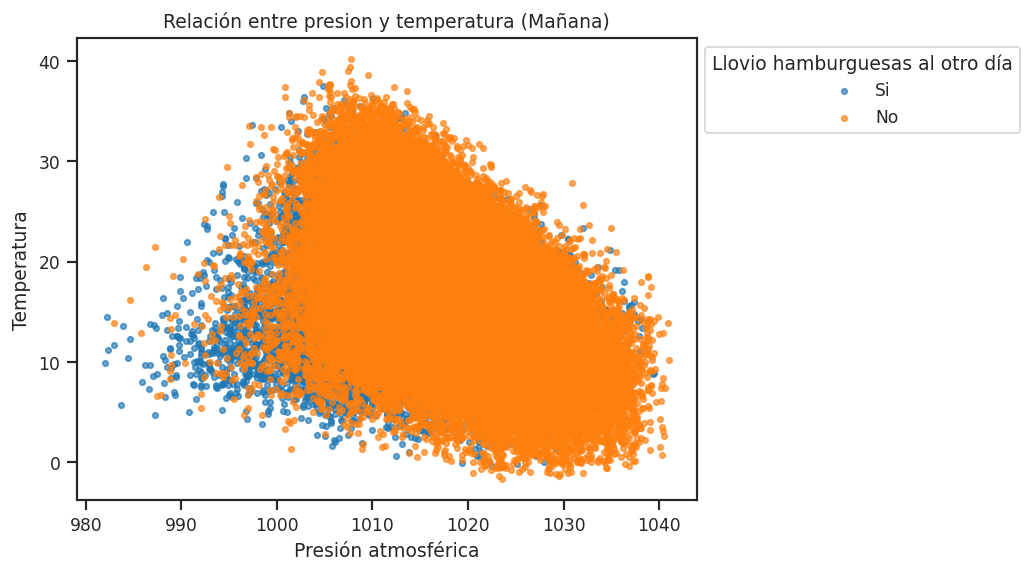

In [ ]:
fig, ax = plt.subplots(dpi=125)

ax.scatter(
    x=df_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_temprano,
    y=df_llovieron_hamburguesas_al_dia_siguiente.temperatura_temprano,
    s=10,
    label="Si",
    alpha=0.65,
)

ax.scatter(
    x=df_no_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_temprano,
    y=df_no_llovieron_hamburguesas_al_dia_siguiente.temperatura_temprano,
    s=10,
    label="No",
    alpha=0.65,
)

ax.legend(title="Llovio hamburguesas al otro día", bbox_to_anchor=(1.0, 1.0))
plt.ylabel("Temperatura")
plt.xlabel("Presión atmosférica")
plt.title('Relación entre presion y temperatura (Mañana)')
plt.show()

In [ ]:
si_llueve = len(df_llovieron_hamburguesas_al_dia_siguiente[
  (df_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_temprano <= 995) &
  (df_llovieron_hamburguesas_al_dia_siguiente.temperatura_temprano <= 12)
])

no_llueve = len(df_no_llovieron_hamburguesas_al_dia_siguiente[
  (df_no_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_temprano <= 995) &
  (df_no_llovieron_hamburguesas_al_dia_siguiente.temperatura_temprano <= 12)
])

porc_llueve = (si_llueve/(si_llueve + no_llueve)) * 100
porc_no_llueve = (no_llueve/(si_llueve + no_llueve)) * 100
laplace = (si_llueve/registros_totales) * 100

print(f"La proporción de casos que llueve es {porc_llueve}%.")
print(f"La proporción de casos que no llueve es {porc_no_llueve}%.")
print(f"La cantidad de casos que llueve (que tiene temperatura y presión menores a 12º y a 995 hPa) sobre el total es {laplace}%.")

La proporción de casos que llueve es 83.59375%.
La proporción de casos que no llueve es 16.40625%.
La cantidad de casos que llueve (que tiene temperatura y presión menores a 12º y a 995 hPa) sobre el total es 0.09408330329115705%.


Podemos observar que para temperaturas menores a *12º* y presiones menores a *995hPa* es más probable que sí lluevan hamburguesas al día siguiente **ya que la proporcion de casos que sí llueve es 83.59% y de que no llueve es 16.40%, la cantidad de casos sobre el total que tiene temperaturas menores a 12º y presiones menores a 995 hPa es 0.094%**, mientras que para temperaturas mayores a 12º y presiones mayores a 995 hPa es casi seguro que **no van a llover hamburguesas al día siguiente**.

## Presión atmosférica y temperatura durante la tarde

¿Para que valores de presión y temperatura durante la tarde es mas probable ver una lluvia de hamburguesas al día siguiente?

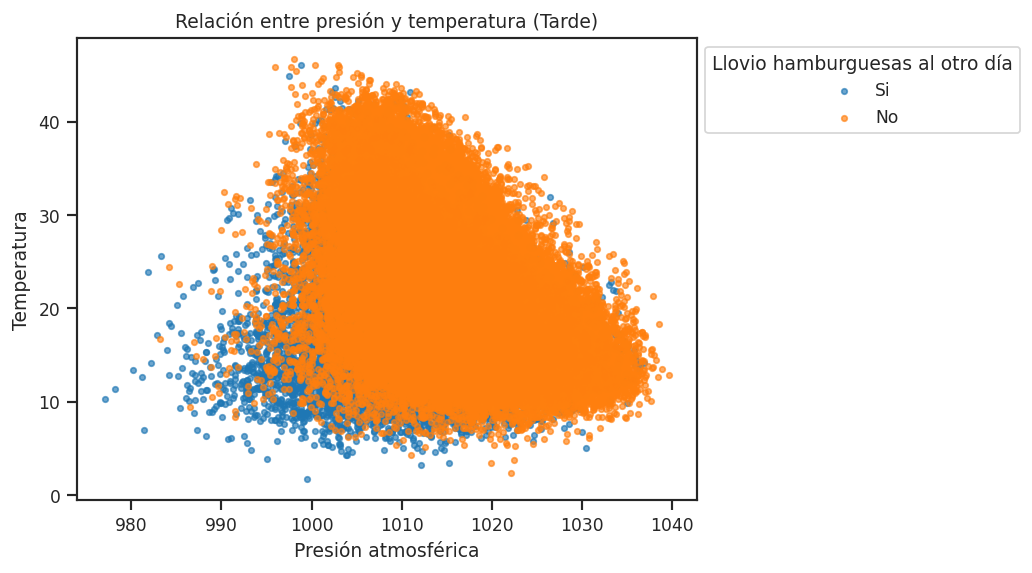

In [ ]:
fig, ax = plt.subplots(dpi=125)

ax.scatter(
    x=df_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_tarde,
    y=df_llovieron_hamburguesas_al_dia_siguiente.temperatura_tarde,
    s=10,
    label="Si",
    alpha=0.65,
)

ax.scatter(
    x=df_no_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_tarde,
    y=df_no_llovieron_hamburguesas_al_dia_siguiente.temperatura_tarde,
    s=10,
    label="No",
    alpha=0.65,
)

ax.legend(title="Llovio hamburguesas al otro día", bbox_to_anchor=(1.0, 1.0))
plt.ylabel("Temperatura")
plt.xlabel("Presión atmosférica")
plt.title('Relación entre presión y temperatura (Tarde)')
plt.show()

In [ ]:
si_llueve = len(df_llovieron_hamburguesas_al_dia_siguiente[
  (df_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_tarde <= 1000) &
  (df_llovieron_hamburguesas_al_dia_siguiente.temperatura_tarde <= 15)
])

no_llueve = len(df_no_llovieron_hamburguesas_al_dia_siguiente[
  (df_no_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_tarde <= 1000) &
  (df_no_llovieron_hamburguesas_al_dia_siguiente.temperatura_tarde <= 15)
])

porc_llueve = (si_llueve/(si_llueve + no_llueve)) * 100
porc_no_llueve = (no_llueve/(si_llueve + no_llueve)) * 100
laplace = (si_llueve/registros_totales) * 100

print(f"La proporción de casos que llueve es {porc_llueve}%.")
print(f"La proporción de casos que no llueve es {porc_no_llueve}%.")
print(f"La cantidad de casos que llueve (que tiene temperatura y presión menores 15º y a 1000 hPa) sobre el total es {laplace}%.")

La proporción de casos que llueve es 82.69581056466302%.
La proporción de casos que no llueve es 17.304189435336976%.
La cantidad de casos que llueve (que tiene temperatura y presión menores 15º y a 1000 hPa) sobre el total es 0.399194576581171%.


Podemos observar que para temperaturas menores a *15º* y presiones menores a *1000hPa* es más probable que sí lluevan hamburguesas al día siguiente **ya que la proporcion de casos que sí llueve es 82.70% y de que no llueve es 17.30%, la cantidad de casos sobre el total que tiene temperaturas menores a 15º y presiones menores a 1000 hPa es 0.40%**, mientras que para temperaturas mayores a 15º y presiones mayores a 1000 hPa es casi seguro que **no van a llover hamburguesas al día siguiente**.

## Presión atmosférica y humedad durante la mañana

¿Para que valores de presión y humedad durante la mañana es mas probable ver una lluvia de hamburguesas al día siguiente?

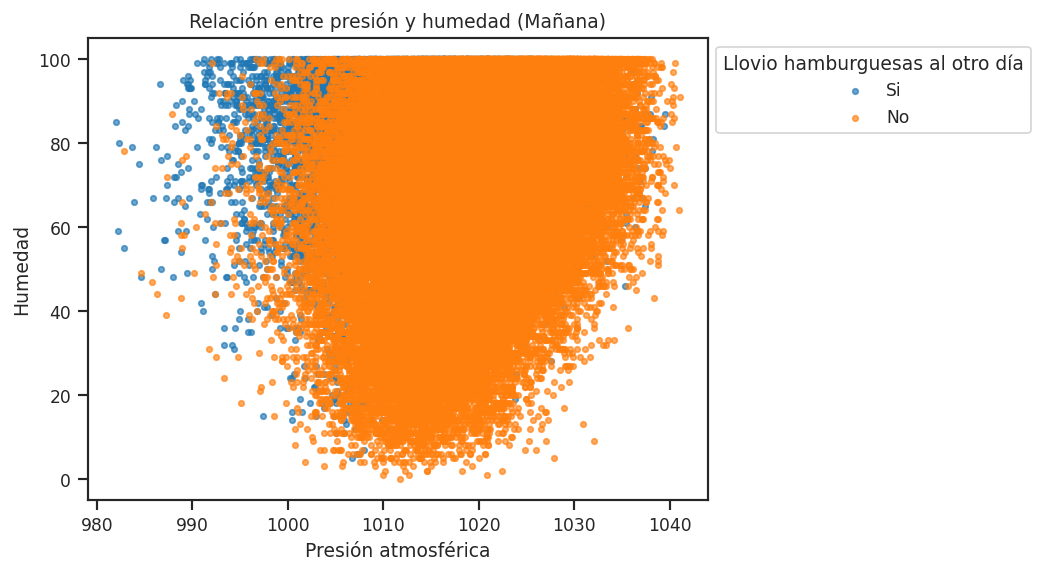

In [ ]:
fig, ax = plt.subplots(dpi=125)

ax.scatter(
    x=df_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_temprano,
    y=df_llovieron_hamburguesas_al_dia_siguiente.humedad_temprano,
    s=10,
    label="Si",
    alpha=0.65,
)

ax.scatter(
    x=df_no_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_temprano,
    y=df_no_llovieron_hamburguesas_al_dia_siguiente.humedad_temprano,
    s=10,
    label="No",
    alpha=0.65,
)

ax.legend(title="Llovio hamburguesas al otro día", bbox_to_anchor=(1.0, 1.0))
plt.ylabel("Humedad")
plt.xlabel("Presión atmosférica")
plt.title('Relación entre presión y humedad (Mañana)')
plt.show()

In [ ]:
si_llueve = len(df_llovieron_hamburguesas_al_dia_siguiente[
  (df_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_temprano <= 1000) &
  (df_llovieron_hamburguesas_al_dia_siguiente.humedad_temprano >= 82)
])

no_llueve = len(df_no_llovieron_hamburguesas_al_dia_siguiente[
  (df_no_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_temprano <= 1000) &
  (df_no_llovieron_hamburguesas_al_dia_siguiente.humedad_temprano >= 82)
])

porc_llueve = (si_llueve/(si_llueve + no_llueve)) * 100
porc_no_llueve = (no_llueve/(si_llueve + no_llueve)) * 100
laplace = (si_llueve/registros_totales) * 100

print(f"La proporción de casos que llueve es {porc_llueve}%.")
print(f"La proporción de casos que no llueve es {porc_no_llueve}%.")
print(f"La cantidad de casos que llueve (que tiene presión menor a 1000 hPa y porcentaje de humedad mayor al 82%) sobre el total es {laplace}%.")

La proporción de casos que llueve es 82.09718670076727%.
La proporción de casos que no llueve es 17.902813299232736%.
La cantidad de casos que llueve (que tiene presión menor a 1000 hPa y porcentaje de humedad mayor al 82%) sobre el total es 0.28224990987347115%.


Podemos observar que para presiones menores a *1000hPa* y porcentajes de humedad mayores al *82%* es más probable que sí lluevan hamburguesas al día siguiente **ya que la proporcion de casos que sí llueve es 82.10% y de que no llueve es 17.90%, la cantidad de casos sobre el total que tiene presiones menores a 1000 hPa y procentajes de humedad mayores al 82% es 0.28%**, mientras que para presiones mayores a 1000 hPa y procentajes de humedad menores al 82% es casi seguro que **no van a llover hamburguesas al día siguiente**.

## Presión atmosférica y humedad durante la tarde

¿Para que valores de presión y humedad durante la tarde es mas probable ver una lluvia de hamburguesas al día siguiente?

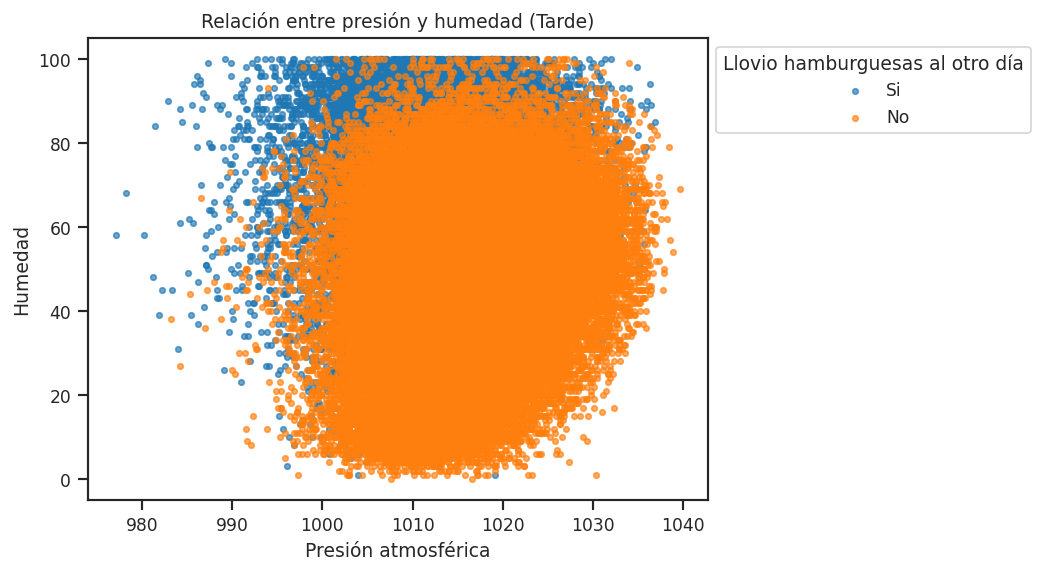

In [ ]:
fig, ax = plt.subplots(dpi=125)

ax.scatter(
    x=df_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_tarde,
    y=df_llovieron_hamburguesas_al_dia_siguiente.humedad_tarde,
    s=10,
    label="Si",
    alpha=0.65,
)

ax.scatter(
    x=df_no_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_tarde,
    y=df_no_llovieron_hamburguesas_al_dia_siguiente.humedad_tarde,
    s=10,
    label="No",
    alpha=0.65,
)

ax.legend(title="Llovio hamburguesas al otro día", bbox_to_anchor=(1.0, 1.0))
plt.ylabel("Humedad")
plt.xlabel("Presión atmosférica")
plt.title('Relación entre presión y humedad (Tarde)')
plt.show()

In [ ]:
si_llueve = len(df_llovieron_hamburguesas_al_dia_siguiente[
  (df_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_tarde <= 1000) &
  (df_llovieron_hamburguesas_al_dia_siguiente.humedad_tarde >= 80)
])

no_llueve = len(df_no_llovieron_hamburguesas_al_dia_siguiente[
  (df_no_llovieron_hamburguesas_al_dia_siguiente.presion_atmosferica_tarde <= 1000) &
  (df_no_llovieron_hamburguesas_al_dia_siguiente.humedad_tarde >= 80)
])

porc_llueve = (si_llueve/(si_llueve + no_llueve)) * 100
porc_no_llueve = (no_llueve/(si_llueve + no_llueve)) * 100
laplace = (si_llueve/registros_totales) * 100

print(f"La proporción de casos que llueve es {porc_llueve}%.")
print(f"La proporción de casos que no llueve es {porc_no_llueve}%.")
print(f"La cantidad de casos que llueve (que tiene presión menor a 1000 hPa y porcentaje de humedad mayor al 80%) sobre el total es {laplace}%.")

La proporción de casos que llueve es 95.83333333333334%.
La proporción de casos que no llueve es 4.166666666666666%.
La cantidad de casos que llueve (que tiene presión menor a 1000 hPa y porcentaje de humedad mayor al 80%) sobre el total es 0.30335270687335686%.


Podemos observar que para presiones menores a *1000hPa* y porcentajes de humedad mayores al *80%* es más probable que sí lluevan hamburguesas al día siguiente **ya que la proporcion de casos que sí llueve es 95.83% y de que no llueve es 4.17%, la cantidad de casos sobre el total que tiene presiones menores a 1000 hPa y procentajes de humedad mayores al 80% es 0.30%**, mientras que para presiones mayores a 1000 hPa y procentajes de humedad menores al 80% es casi seguro que **no van a llover hamburguesas al día siguiente**.

# Análisis final de los nulos de la variable target 

In [ ]:
casos_totales = len(nulos_variable_target_df)

In [ ]:
casos_favorables = len(nulos_variable_target_df[nulos_variable_target_df.presion_atmosferica_temprano <= 995])
porcentaje = (casos_favorables/casos_totales) * 100
porcentaje

0.11367942402425162

In [ ]:
casos_favorables = len(nulos_variable_target_df[nulos_variable_target_df.presion_atmosferica_tarde <= 995])
porcentaje = casos_favorables/casos_totales
porcentaje

0.0018946570670708603

In [ ]:
casos_favorables = len(nulos_variable_target_df[nulos_variable_target_df.humedad_tarde >= 82])
porcentaje = (casos_favorables/casos_totales) * 100
porcentaje

7.9196665403561965

In [ ]:
casos_favorables = len(nulos_variable_target_df[nulos_variable_target_df.mm_lluvia_dia >= 40])
porcentaje = (casos_favorables/casos_totales) * 100
porcentaje

0.5683971201212581

In [ ]:
casos_favorables = len(nulos_variable_target_df[(nulos_variable_target_df.temperatura_temprano <= 12) &
                             (nulos_variable_target_df.presion_atmosferica_temprano <= 995)])
porcentaje = casos_favorables/casos_totales
porcentaje

0.00037893141341417203

In [ ]:
casos_favorables = len(nulos_variable_target_df[(nulos_variable_target_df.temperatura_tarde <= 12) &
                             (nulos_variable_target_df.presion_atmosferica_tarde <= 995)])
porcentaje = (casos_favorables/casos_totales) * 100
porcentaje

0.0

In [ ]:
casos_favorables = len(nulos_variable_target_df[(nulos_variable_target_df.humedad_temprano >= 82.1) &
                             (nulos_variable_target_df.presion_atmosferica_temprano <= 1000)])
porcentaje = (casos_favorables/casos_totales) * 100
porcentaje

0.34103827207275483

In [ ]:
casos_favorables = len(nulos_variable_target_df[(nulos_variable_target_df.humedad_tarde >= 80) &
                             (nulos_variable_target_df.presion_atmosferica_tarde <= 1000)])
porcentaje = (casos_favorables/casos_totales) * 100
porcentaje

0.378931413414172

Como conclusión, vemos que no se pierde mucha información al no tener en cuenta las filas que borramos dado que el porcentaje de casos afirmativos para los datos que usamos en el baseline es muy bajo.

# Conclusiones

Los siguientes facotores son importantes para determinar si la máquina se va a activar al día siguiente:
* Humedad a la tarde del, por lo menos, 80%;
* Presión atmosférica por la mañana de, por lo menos, 1000 hPa y humedad por la mañana del, por lo menos, 82%;
* Presión atmosférica por la tarde de, por lo menos, 1000 hPa y ya sea la humedad por la tarde del, por lo menos, 82% o la temperatura por la tarde de, por lo menos, 15 ºC; y
* que lleuvan durante el día, por lo menos, 40 mm.


En el caso de que no se cumpla lo dicho arriba, no se va a activar la máquina al día siguiente.

# Baseline

In [33]:
#def _baseline(row):
#  lst_predicciones = []
#  if row['humedad_tarde'] >= 80:
#      lst_predicciones.append(1)
#
#  elif row['presion_atmosferica_temprano'] <= 1000 and row['humedad_temprano'] >= 82:
#      lst_predicciones.append(1)
#
#  elif row['presion_atmosferica_tarde'] <= 1000 and (row['humedad_tarde'] >= 80 or row['temperatura_tarde'] <= 15):
#      lst_predicciones.append(1)
#
#  elif row['mm_lluvia_dia'] >= 40:
#      lst_predicciones.append(1)
#  
#  else:
#      lst_predicciones.append(0)
#  
#  return lst_predicciones

In [38]:
def _baseline(row):
  
  if row['humedad_tarde'] >= 80:
      return 1

  if row['presion_atmosferica_temprano'] <= 1000 and row['humedad_temprano'] >= 82:
      return 1

  if row['presion_atmosferica_tarde'] <= 1000 and (row['humedad_tarde'] >= 80 or row['temperatura_tarde'] <= 15):
      return 1

  if row['mm_lluvia_dia'] >= 40:
      return 1
  
  return 0

In [39]:
def baseline(X):
  serie_apply = X.apply(lambda row: _baseline(row), axis=1)
  return serie_apply.tolist()

In [40]:
def _accuracy(row, lista_aux, lst):
  lst_index, total_acertados = lista_aux
  if ((row['llovieron_hamburguesas_al_dia_siguiente'] == "Si" and
       lst[lst_index] == 1) or 
      (row['llovieron_hamburguesas_al_dia_siguiente'] == "No" and
       lst[lst_index] == 0)):
      total_acertados += 1
      lista_aux[1] = total_acertados

  lst_index += 1
  lista_aux[0] = lst_index

Aplicamos nuestro dataset a la funcion baseline y comparamos con la variable target para ver la accuracy.

In [41]:
def accuracy(X):
  lst = baseline(X)

  total = len(X)
  lista_aux = [0, 0]

  X.apply(lambda row: _accuracy(row, lista_aux, lst), axis=1)

  total_acertados = lista_aux[1]
  print(f"De un total de {total} mediciones acertamos {total_acertados}")
  print(f"El accuracy es de {(total_acertados / total) * 100} %")

In [42]:
accuracy(hamburguesas_values)

De un total de 113729 mediciones acertamos 93877
El accuracy es de 82.54446974826122 %


In [ ]:
#resultado = baseline(hamburguesas_values)
#contador = 0
#
#for elemento in resultado:
#
#  if len(elemento) > 1:
#    contador += 1
#
#contador

**Comenatario:**

A partir de la función **_baseline(row)** que esta con "#", corrimos el código que también está con "#" (el que está justo arriba de "**Comentario**") para ver si alguna de las listas tenía más de un elemento y resultó ser que no, por lo que decidimos dejar como versión final la función **_baseline(row)** que está debajo de la otra función ya mencionada.